# Ïù¥ÏÑ±Ï≤†

# AARRR ÏßÄÌëú Ï§ë Acquisition ÌôïÏù∏
---


In [1]:
## 1.ÌïÑÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨ Ï†ïÎ¶¨ 
import numpy as np
import pandas as pd
from itertools import groupby
from collections import Counter
from datetime import timedelta

# object ÌòïÏãùÏúºÎ°ú Ï†ÄÏû•Îêú Î≥ÄÏàòÎ•º list ÌòïÏãùÏúºÎ°ú Î∞îÍæ∏Í∏∞ ÏúÑÌï¥ÏÑú
import ast

# GCS ÌååÏùº Í≤ΩÎ°úÏóêÏÑú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
from google.cloud import storage
from google.oauth2 import service_account

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import matplotlib.dates as mdates

from itertools import groupby
from collections import Counter
from sklearn.metrics import auc


In [2]:
# Ïù∏Ï¶ù
key_path = "/home/sungcheol/codeit_project/codeit_project/config/key.json"
credentials = service_account.Credentials.from_service_account_file(key_path)

# GCS ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ ÏÉùÏÑ±
client = storage.Client(credentials=credentials)
bucket = client.bucket("my-advanced-data-bucket")

# 'votes/' Í≤ΩÎ°úÏóê ÏûàÎäî .parquet ÌååÏùº Î¶¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
vote_blobs = bucket.list_blobs(prefix="votes/")
vote_file_list = [f"gs://my-advanced-data-bucket/{blob.name}" for blob in vote_blobs if blob.name.endswith(".parquet")]

# Í≤∞Í≥º ÌôïÏù∏
print("Votes files in GCS:")
print(vote_file_list)
print()

# # 'hackle/' Í≤ΩÎ°úÏóê ÏûàÎäî .parquet ÌååÏùº Î¶¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
# hackle_blobs = bucket.list_blobs(prefix="hackle/")
# hackle_file_list = [f"gs://my-advanced-data-bucket/{blob.name}" for blob in hackle_blobs if blob.name.endswith(".parquet")]

# # Í≤∞Í≥º ÌôïÏù∏
# print("Hackle files in GCS:")
# print(hackle_file_list)


Votes files in GCS:
['gs://my-advanced-data-bucket/votes/accounts_attendance.parquet', 'gs://my-advanced-data-bucket/votes/accounts_blockrecord.parquet', 'gs://my-advanced-data-bucket/votes/accounts_failpaymenthistory.parquet', 'gs://my-advanced-data-bucket/votes/accounts_friendrequest.parquet', 'gs://my-advanced-data-bucket/votes/accounts_group.parquet', 'gs://my-advanced-data-bucket/votes/accounts_nearbyschool.parquet', 'gs://my-advanced-data-bucket/votes/accounts_paymenthistory.parquet', 'gs://my-advanced-data-bucket/votes/accounts_pointhistory.parquet', 'gs://my-advanced-data-bucket/votes/accounts_school.parquet', 'gs://my-advanced-data-bucket/votes/accounts_timelinereport.parquet', 'gs://my-advanced-data-bucket/votes/accounts_user.parquet', 'gs://my-advanced-data-bucket/votes/accounts_user_contacts.parquet', 'gs://my-advanced-data-bucket/votes/accounts_userquestionrecord.parquet', 'gs://my-advanced-data-bucket/votes/accounts_userwithdraw.parquet', 'gs://my-advanced-data-bucket/vot

In [3]:
# Í≤∞Í≥º Ï†ÄÏû•Ïö© ÎîïÏÖîÎÑàÎ¶¨
df_dict = {}

# vote ÎÇ¥ Í∞Å ÌååÏùºÏùÑ Î∂àÎü¨ÏôÄÏÑú ÎîïÏÖîÎÑàÎ¶¨Ïóê Ï†ÄÏû•
for title in vote_file_list:
    gcs_path = title
    df_file_name = title.split('/')[-1].replace('.parquet', '')
    
    # Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
    df = pd.read_parquet(gcs_path, storage_options={"token": key_path})
    
    # ÎîïÏÖîÎÑàÎ¶¨Ïóê Ï†ÄÏû•
    df_dict[df_file_name] = df

    # Ï∂úÎ†•
    print(f"{df_file_name} Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÌôïÏù∏")
    print("="*50)
    print(df.head())
    print(f"{df_file_name} Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞ : {df.shape}")
    print()
    print(f"{df_file_name} Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏")
    df.info()
    print("\n" + "-"*70 + "\n")
    

accounts_attendance Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÌôïÏù∏
   id                               attendance_date_list  user_id
0   1  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1446852
1   2  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1359398
2   3  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1501542
3   4  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1507767
4   5  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1287453
accounts_attendance Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞ : (349637, 3)

accounts_attendance Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349637 entries, 0 to 349636
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    349637 non-null  int64 
 1   attendance_date_list  349637 non-null  object
 2   user_id               349637 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.0+ MB

--------------------------------------

## Vote Îç∞Ïù¥ÌÑ∞Î°ú ÌôïÏù∏
---
- created_atÏù¥ ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£åÌïú ÏãúÏ†êÏóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞ÏûÑÏùÑ ÌôïÏù∏
    - Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Îäî hackle_propertiesÏôÄ hackle_events Î≥ëÌï© Îç∞Ïù¥ÌÑ∞ÏôÄ accounts_user ÌÜµÌï¥ÏÑú ÌôïÏù∏(looking_for_AARRR ÌååÏùºÏóê Ï°¥Ïû¨)
- Í∑∏Î†áÍ∏∞ ÎïåÎ¨∏Ïóê accounts_userÏùò created_atÏùò Í∞íÏùÄ ÌöåÏõêÍ∞ÄÏûÖÏù¥ ÏôÑÎ£åÎêú ÏãúÏ†êÏúºÎ°ú ÌåêÎã®Ìï† Ïàò ÏûáÏùå


In [4]:
# Ï†ÑÎ∞òÏ†ÅÏù∏ ÌöåÏõêÍ∞ÄÏûÖ Ïú†Ï†ÄÎì§Ïùò ÌäπÏßïÏùÑ ÌÉêÏÉâÌï¥Î≥¥Îäî Í≤ÉÎèÑ?

id  is_superuser  is_staff gender  point  \
0  831956             1         1   None    600   
1  831962             0         0      F   2248   
2  832151             0         0      M   1519   
3  832340             0         0      F     57   
4  832520             0         0      M   1039   

                                      friend_id_list  is_push_on  \
0  [1292473, 913158, 1488461, 1064695, 1043565, 1...           0   
1  [833025, 832642, 982531, 879496, 838541, 83752...           1   
2  [838785, 982531, 882567, 879496, 838541, 83649...           0   
3  [841345, 982531, 838785, 963714, 882567, 83252...           1   
4  [874050, 849763, 874212, 844297, 838541, 84004...           0   

                  created_at block_user_id_list hide_user_id_list ban_status  \
0 2023-03-29 03:44:14.047130                 []                []          N   
1 2023-03-29 05:18:56.162368                 []                []          N   
2 2023-03-29 12:56:34.989468                 []                []          N   
3 2023-03-29 12:56:35.020790                 []                []          N   
4 2023-03-29 12:56:35.049311                 []                []          N   

   report_count  alarm_count  pending_chat  pending_votes  group_id  
0             0            0             0              0       NaN  
1           253        40878          5499            110      12.0  
2             0           37             0             47       1.0  
3             0           19             0             21       1.0  
4             0           29             0             15      12.0

accounts_user Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏
id                             int64
is_superuser                   int64
is_staff                       int64
gender                        object
point                          int64
friend_id_list                object
is_push_on                     int64
created_at            datetime64[ns]
block_user_id_list            object
hide_user_id_list             object
ban_status                    object
report_count                   int64
alarm_count                    int64
pending_chat                   int64
pending_votes                  int64
group_id                     float64
dtype: object


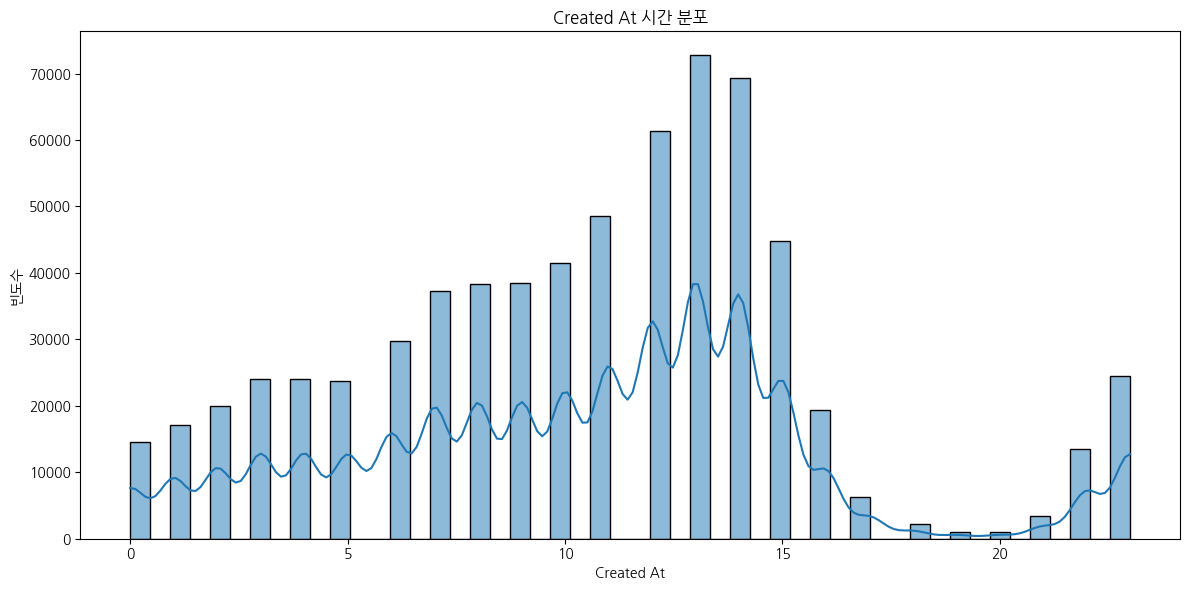

In [5]:
# Î≥µÏÇ¨Î≥∏ Ï†úÏûëÏùÑ ÏúÑÌï¥ÏÑú
accounts_user = df_dict["accounts_user"].copy()
display(accounts_user.head())

# Ïö∞ÏÑ† Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏
print("accounts_user Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏")
print(accounts_user.dtypes)

# created_at ÏãúÍ∞ÑÎåÄ Î∂ÑÌè¨ ÌôïÏù∏
plt.figure(figsize=(12, 6))
sns.histplot(accounts_user['created_at'].dt.hour, bins=50, kde=True)
plt.title('Created At ÏãúÍ∞Ñ Î∂ÑÌè¨')
plt.xlabel('Created At')
plt.ylabel('ÎπàÎèÑÏàò')
plt.tight_layout()
plt.show()

In [6]:
# Í∑∏Î†áÎã§Î©¥ hackle Îç∞Ïù¥ÌÑ∞ÏóêÏÑú event_keyÍ∞Ä "complete_signup"Ïù∏ Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂úÌï¥ÏÑú ÏãúÍ∞ÑÎåÄ Î∂ÑÌè¨ ÌôïÏù∏
# hackle Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

## GCSÏóêÏÑú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
final_hackle_df = pd.read_parquet(
    "gs://my-advanced-data-bucket/final_hackle/final.parquet",
    storage_options={"token": "/home/sungcheol/codeit_project/codeit_project/config/key.json"}
)

display(final_hackle_df.head())

event_id      event_datetime  \
0  00000533-3f1c-4b3b-81f1-0c8f35754b4e 2023-07-18 19:40:17   
1  00114c10-8321-4978-a73f-fd452162b9f2 2023-07-31 19:11:51   
2  01f136ac-3257-4cf9-b0a9-c0c37fe7e572 2023-07-31 19:14:34   
3  02cc364e-23ec-46cf-a02f-14cf60f97ec1 2023-07-31 19:13:18   
4  05d05a79-cdb3-43fe-b931-5cb0992a36a1 2023-07-31 19:12:50   

             event_key                    session_id  friend_count  \
0       $session_start  4OzYh3seq3VKytpSn5pvQkZNQii1           NaN   
1  click_notice_detail  4OzYh3seq3VKytpSn5pvQkZNQii1          51.0   
2  click_question_open  4OzYh3seq3VKytpSn5pvQkZNQii1          51.0   
3  click_question_open  4OzYh3seq3VKytpSn5pvQkZNQii1          51.0   
4  click_question_open  4OzYh3seq3VKytpSn5pvQkZNQii1          51.0   

   question_id  heart_balance      id  user_id  \
0          NaN            NaN  367093  1041414   
1          NaN         1719.0  367093  1041414   
2          NaN         1719.0  367093  1041414   
3          NaN         1719.0  367093  1041414   
4          NaN         1719.0  367093  1041414   

                              device_id osname osversion  
0  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74    iOS      16.0  
1  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74    iOS      16.0  
2  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74    iOS      16.0  
3  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74    iOS      16.0  
4  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74    iOS      16.0

In [7]:
# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏
print("final_hackle_df Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏")
print(final_hackle_df.dtypes)

# Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ ÌôïÏù∏
print("final_hackle_df Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ ÌôïÏù∏")
print(final_hackle_df.shape)

# event_keyÍ∞Ä "complete_signup"Ïù∏ Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
complete_signup_df = final_hackle_df[final_hackle_df['event_key'] == 'complete_signup'].copy()

# Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ ÌôïÏù∏
print("complete_signup_df Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ ÌôïÏù∏")
print(complete_signup_df.shape)

final_hackle_df Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏
event_id                  object
event_datetime    datetime64[ms]
event_key                 object
session_id                object
friend_count             float64
question_id              float64
heart_balance            float64
id                         int64
user_id                   object
device_id                 object
osname                    object
osversion                 object
dtype: object
final_hackle_df Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ ÌôïÏù∏
(11406944, 12)
complete_signup_df Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ ÌôïÏù∏
(974, 12)


event_id      event_datetime  \
13637  aef1aa85-4b53-4576-8a59-898c621bd8ea 2023-07-21 14:47:08   
31989  ddf14897-2a99-433d-bbe5-a5e32c83aefd 2023-07-18 11:26:59   
41705  9f57eccd-0be3-4256-bbd7-0aa5ea2f31cc 2023-07-18 15:54:53   
48087  64452779-9565-4d14-b173-c6458227f22e 2023-08-07 19:58:55   
48130  6a94e2be-7158-487f-b81f-cd04766a2a37 2023-07-19 01:06:22   

             event_key                            session_id  friend_count  \
13637  complete_signup  e118e264-5b37-4b29-9f65-737e614e6614           0.0   
31989  complete_signup  83147b91-46d9-4060-b803-d0acfc8750b7           0.0   
41705  complete_signup  CE0BB810-BE00-4C39-97AB-78F4E5D83285           0.0   
48087  complete_signup  B941F9F9-CF53-4DAE-A204-75E666B5D277           0.0   
48130  complete_signup  B941F9F9-CF53-4DAE-A204-75E666B5D277           0.0   

       question_id  heart_balance     id  user_id  \
13637          NaN          300.0     32  1579202   
31989          NaN          300.0     78  1578984   
41705          NaN          300.0    103  1579005   
48087          NaN          300.0  80166  1579831   
48130          NaN          300.0  80166  1579831   

                                  device_id   osname osversion  
13637  e118e264-5b37-4b29-9f65-737e614e6614  Android        13  
31989  83147b91-46d9-4060-b803-d0acfc8750b7  Android        13  
41705  CE0BB810-BE00-4C39-97AB-78F4E5D83285      iOS    16.5.1  
48087  B941F9F9-CF53-4DAE-A204-75E666B5D277      iOS      16.6  
48130  B941F9F9-CF53-4DAE-A204-75E666B5D277      iOS      16.6

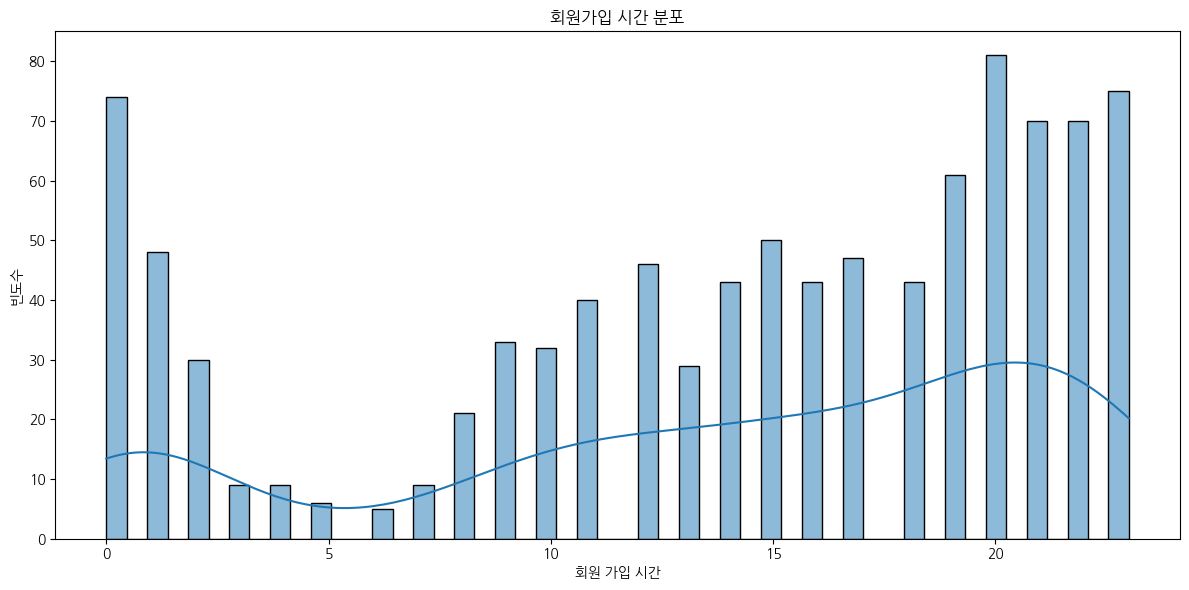

In [8]:
# ÌïÑÌÑ∞ÎßÅÌïú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
display(complete_signup_df.head())

# ÏãúÍ∞ÑÎåÄ Î∂ÑÌè¨ ÌôïÏù∏
plt.figure(figsize=(12, 6))
sns.histplot(complete_signup_df['event_datetime'].dt.hour, bins=50, kde=True)
plt.title('ÌöåÏõêÍ∞ÄÏûÖ ÏãúÍ∞Ñ Î∂ÑÌè¨')
plt.xlabel('ÌöåÏõê Í∞ÄÏûÖ ÏãúÍ∞Ñ')
plt.ylabel('ÎπàÎèÑÏàò')
plt.tight_layout()
plt.show()

- created_atÏóê 9ÏãúÍ∞ÑÏùÑ ÎçîÌï¥ÏïºÌïúÎã§Îäî Ïù¥Ïú†
    - hackle Îç∞Ïù¥ÌÑ∞ÏôÄ accounts_user Îç∞Ïù¥ÌÑ∞ ÏÇ¥Ìé¥Î≥¥Î©¥ 9ÏãúÍ∞Ñ Ï∞®Ïù¥Í∞Ä ÎÇ®
    - Í∑∏Î¶¨Í≥† Î¨ºÎ°† Ï†êÏã¨ ÏãúÍ∞ÑÏóê ÌöåÏõêÍ∞ÄÏûÖ? Í∞ÄÎä•ÌïòÎã§Í≥† ÏÉùÍ∞ÅÎê® ÌïòÏßÄÎßå ÏÉàÎ≤Ω ÏãúÍ∞ÑÎåÄÏóê Ïù¥Ïö©ÌïòÎäî Ïú†Ï†ÄÍ∞Ä ÏßÄÎÇòÏπòÍ≤å ÎßéÏïÑÏßê

In [9]:
# ÎßåÏïΩ account_user Îç∞Ïù¥ÌÑ∞Ïóê created_atÏóê 9ÏãúÍ∞ÑÏùÑ ÎçîÌïòÍ≤å ÎêòÎ©¥? ÏãúÍ∞ÑÎåÄ Î∂ÑÌè¨Îäî?
accounts_user["created_at_plus_9"] = accounts_user["created_at"] + pd.Timedelta(hours=9)

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
display(accounts_user.head())

id  is_superuser  is_staff gender  point  \
0  831956             1         1   None    600   
1  831962             0         0      F   2248   
2  832151             0         0      M   1519   
3  832340             0         0      F     57   
4  832520             0         0      M   1039   

                                      friend_id_list  is_push_on  \
0  [1292473, 913158, 1488461, 1064695, 1043565, 1...           0   
1  [833025, 832642, 982531, 879496, 838541, 83752...           1   
2  [838785, 982531, 882567, 879496, 838541, 83649...           0   
3  [841345, 982531, 838785, 963714, 882567, 83252...           1   
4  [874050, 849763, 874212, 844297, 838541, 84004...           0   

                  created_at block_user_id_list hide_user_id_list ban_status  \
0 2023-03-29 03:44:14.047130                 []                []          N   
1 2023-03-29 05:18:56.162368                 []                []          N   
2 2023-03-29 12:56:34.989468                 []                []          N   
3 2023-03-29 12:56:35.020790                 []                []          N   
4 2023-03-29 12:56:35.049311                 []                []          N   

   report_count  alarm_count  pending_chat  pending_votes  group_id  \
0             0            0             0              0       NaN   
1           253        40878          5499            110      12.0   
2             0           37             0             47       1.0   
3             0           19             0             21       1.0   
4             0           29             0             15      12.0   

           created_at_plus_9  
0 2023-03-29 12:44:14.047130  
1 2023-03-29 14:18:56.162368  
2 2023-03-29 21:56:34.989468  
3 2023-03-29 21:56:35.020790  
4 2023-03-29 21:56:35.049311

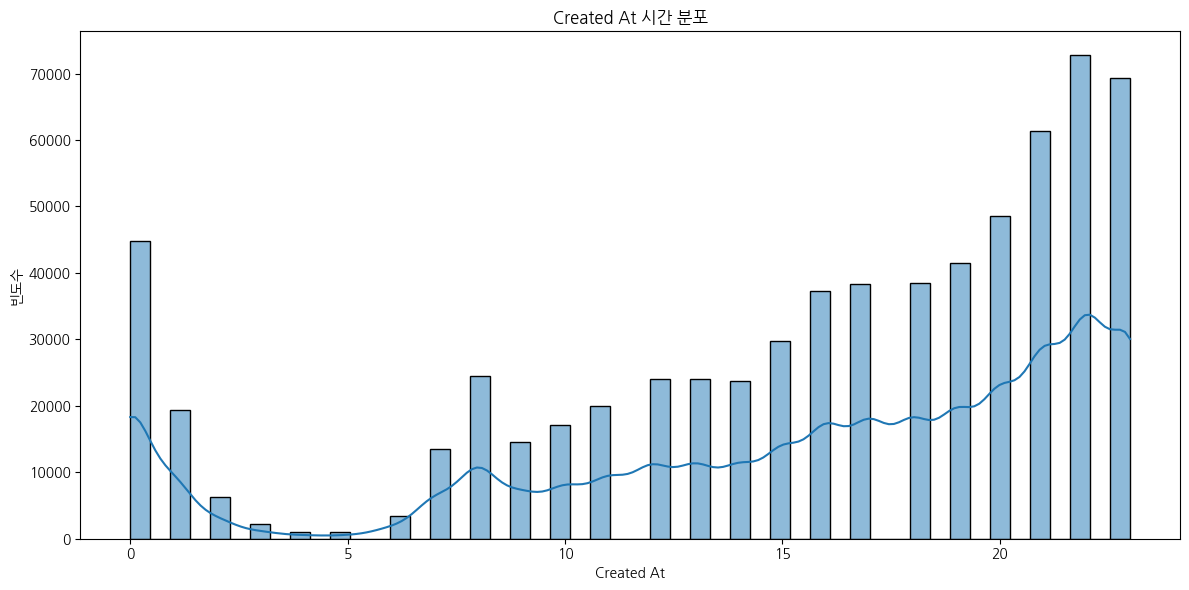

In [10]:
# 9ÏãúÍ∞ÑÏùÑ ÎçîÌïú Í≤∞Í≥ºÏóê ÎåÄÌï¥ÏÑú ÏãúÍ∞ÅÌôî ÏßÑÌñâ
# created_at ÏãúÍ∞ÑÎåÄ Î∂ÑÌè¨ ÌôïÏù∏
plt.figure(figsize=(12, 6))
sns.histplot(accounts_user['created_at_plus_9'].dt.hour, bins=50, kde=True)
plt.title('Created At ÏãúÍ∞Ñ Î∂ÑÌè¨')
plt.xlabel('Created At')
plt.ylabel('ÎπàÎèÑÏàò')
plt.tight_layout()
plt.show()

- ÏúÑ ÎÇ¥Ïö©ÏùÑ ÌÜµÌï¥ÏÑúÎäî Ïú†Ï†Ä ÌöçÎìùÏù¥ Ïò§ÌûàÎ†§ Î∞§Ïóê Ïù¥Î£®Ïñ¥ÏßÄÎäî Í≤ΩÏö∞Í∞Ä Ï°¥Ïû¨Ìï®
- Ï†ÄÎÖÅÏù¥ÎÇò Î∞§Ïóê ÌôúÎèôÏù¥ ÎßéÏùÄ Í≤ÉÏùÄ ÌôïÏù∏Ìï® Í∑∏Î†áÎã§Î©¥ Ï†êÏã¨Ïù¥ÎÇò Ïù¥Î•∏ ÏãúÍ∞ÑÎåÄÏóêÎäî?
    - Î∞©ÌïôÏù¥ÎÇò Ï£ºÎßêÏù∏ Í≤ΩÏö∞Ïóê Îã§Î•ºÍπå?

### vote Îç∞Ïù¥ÌÑ∞Î•º ÌÜµÌïú Ï†ÑÎ∞òÏ†ÅÏù∏ ÌöåÏõêÍ∞ÄÏûÖ Ïú†Ï†Ä ÌôïÏù∏
---

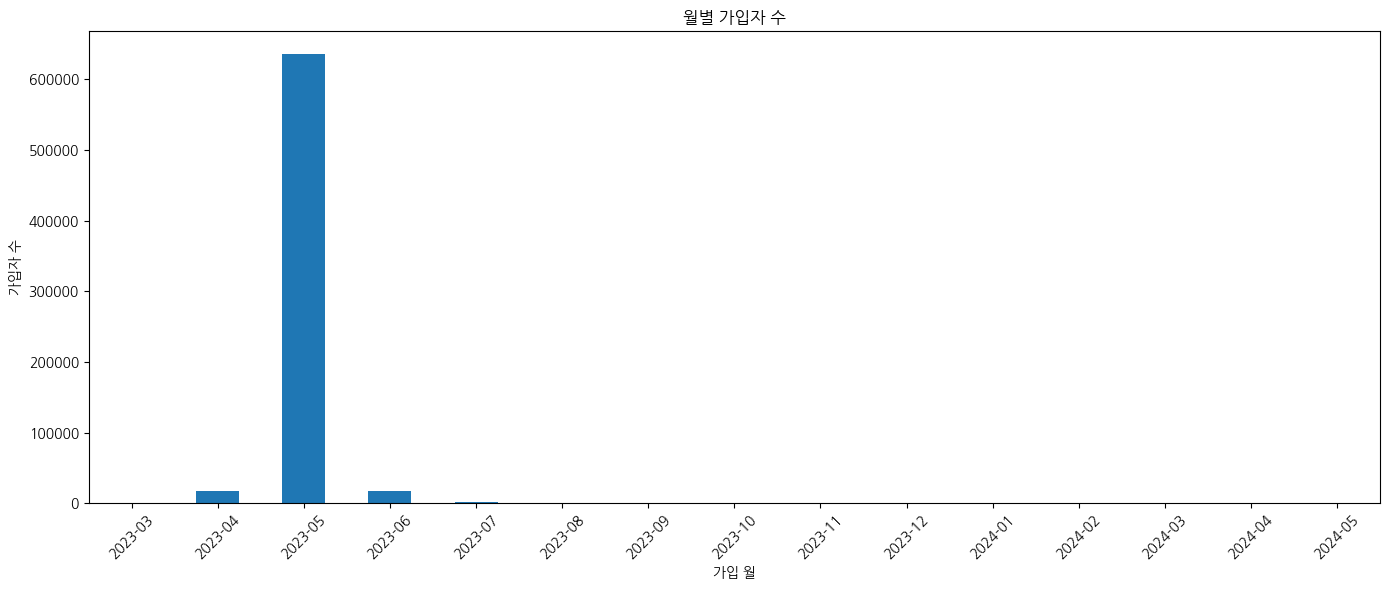

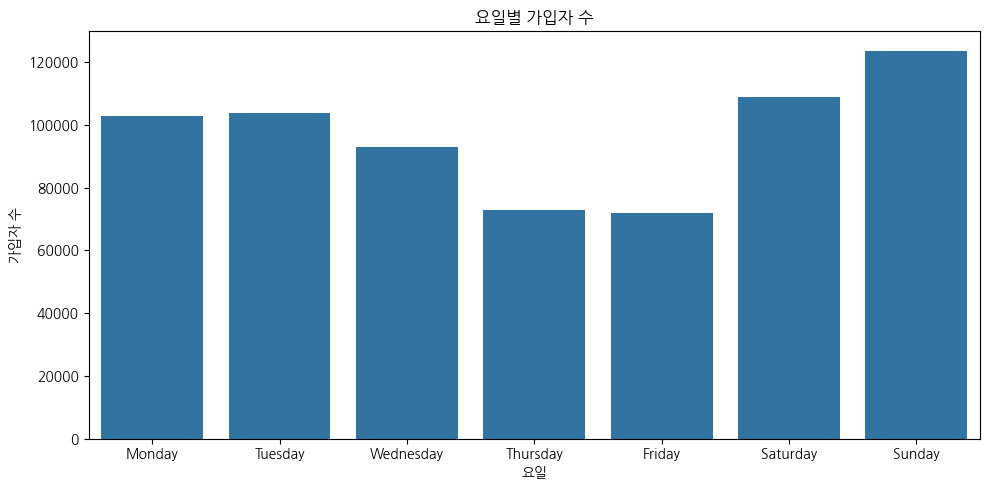

In [11]:
# ÏõîÎ≥Ñ Í∞ÄÏûÖÏûê Ïàò ÏßëÍ≥Ñ Î∞è ÏãúÍ∞ÅÌôî
accounts_user['month'] = accounts_user['created_at_plus_9'].dt.to_period('M')
monthly_counts = accounts_user.groupby('month').size()

plt.figure(figsize=(14, 6))
monthly_counts.plot(kind='bar')
plt.title('ÏõîÎ≥Ñ Í∞ÄÏûÖÏûê Ïàò')
plt.xlabel('Í∞ÄÏûÖ Ïõî')
plt.ylabel('Í∞ÄÏûÖÏûê Ïàò')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ÏöîÏùºÎ≥Ñ Í∞ÄÏûÖÏûê Ïàò ÏßëÍ≥Ñ Î∞è ÏãúÍ∞ÅÌôî
accounts_user['weekday'] = accounts_user['created_at_plus_9'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = accounts_user['weekday'].value_counts().reindex(weekday_order)

plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title('ÏöîÏùºÎ≥Ñ Í∞ÄÏûÖÏûê Ïàò')
plt.xlabel('ÏöîÏùº')
plt.ylabel('Í∞ÄÏûÖÏûê Ïàò')
plt.tight_layout()
plt.show()

/tmp/ipykernel_203008/148434679.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=user_df, x='gender', palette='Set2')


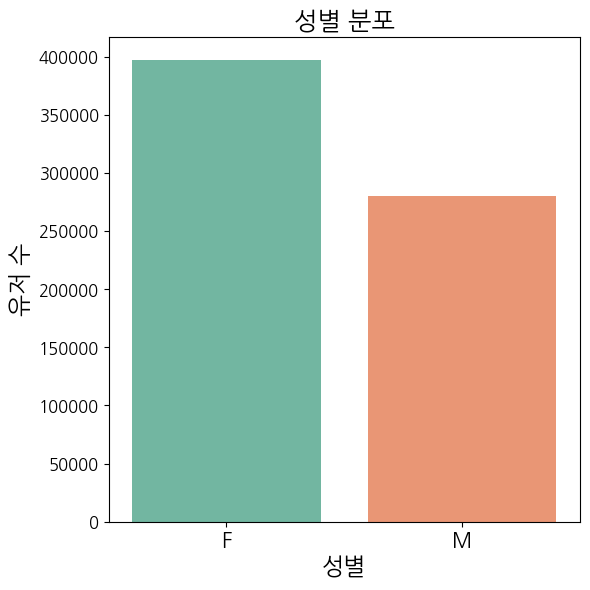

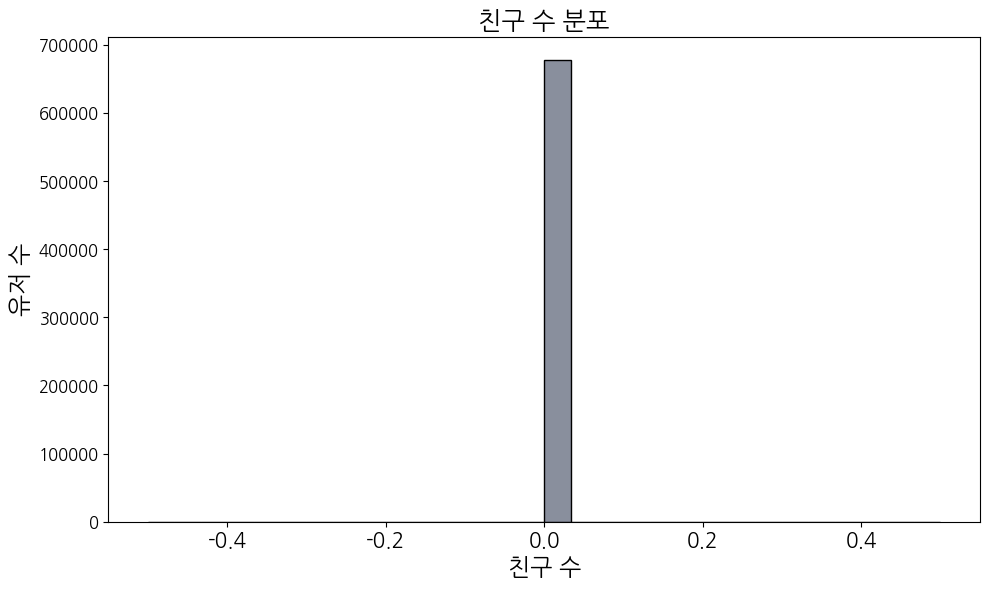

/tmp/ipykernel_203008/148434679.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=user_df, x='signup_dayofweek', order=order, palette='Oranges')


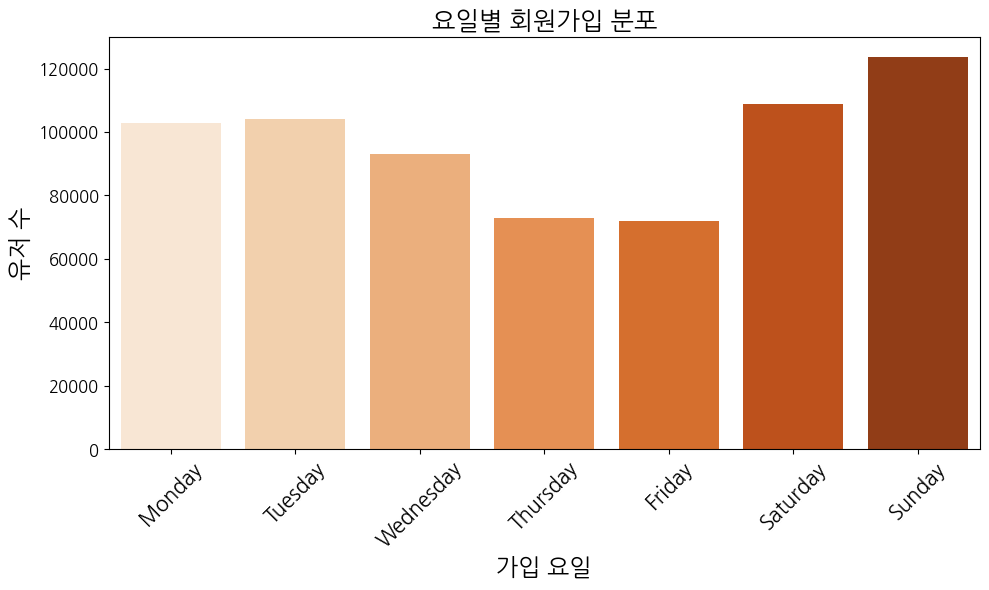

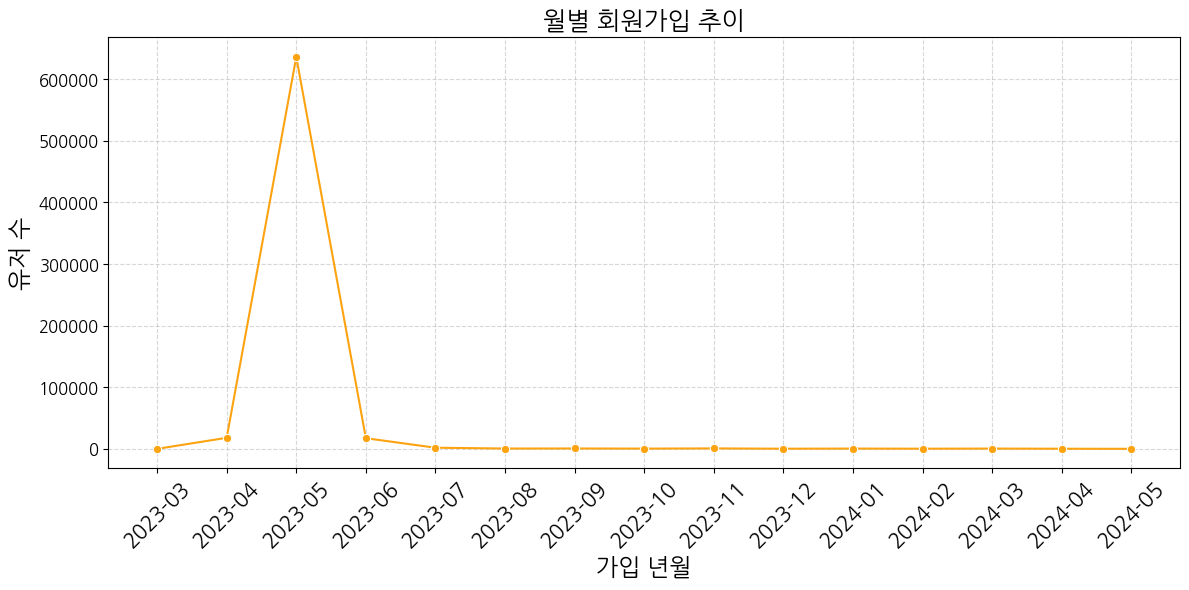

In [12]:
user_df = accounts_user.copy()

# 1. Í∞ÄÏûÖ ÏãúÍ∞Ñ Ï†ïÎ≥¥ ÌååÏã±
user_df['created_at_plus_9'] = pd.to_datetime(user_df['created_at_plus_9'])
user_df['signup_date'] = user_df['created_at_plus_9'].dt.date
user_df['signup_year_month'] = user_df['created_at_plus_9'].dt.to_period('M').astype(str)
user_df['signup_dayofweek'] = user_df['created_at_plus_9'].dt.day_name()

# 2. ÏπúÍµ¨ Ïàò Í≥ÑÏÇ∞
user_df['friend_cnt'] = user_df['friend_id_list'].apply(
    lambda x: len(x) if isinstance(x, list) else 0
)

# 3. ÏÑ±Î≥Ñ Î∂ÑÌè¨
plt.figure(figsize=(6, 6))
sns.countplot(data=user_df, x='gender', palette='Set2')
plt.title('ÏÑ±Î≥Ñ Î∂ÑÌè¨', fontsize=18)
plt.xlabel('ÏÑ±Î≥Ñ', fontsize=17)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 4. ÏπúÍµ¨ Ïàò Î∂ÑÌè¨
plt.figure(figsize=(10, 6))
sns.histplot(user_df['friend_cnt'], bins=30, kde=True, color='#14213d')
plt.title('ÏπúÍµ¨ Ïàò Î∂ÑÌè¨', fontsize=18)
plt.xlabel('ÏπúÍµ¨ Ïàò', fontsize=17)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 5. ÏöîÏùºÎ≥Ñ Í∞ÄÏûÖ Î∂ÑÌè¨
plt.figure(figsize=(10, 6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=user_df, x='signup_dayofweek', order=order, palette='Oranges')
plt.title('ÏöîÏùºÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖ Î∂ÑÌè¨', fontsize=18)
plt.xlabel('Í∞ÄÏûÖ ÏöîÏùº', fontsize=17)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=17)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 6. ÏõîÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖ Ï∂îÏù¥
monthly_signup = user_df.groupby('signup_year_month')['id'].count().reset_index()
monthly_signup.columns = ['signup_year_month', 'user_count']

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_signup, x='signup_year_month', y='user_count', marker='o', color='#fca311')
plt.title('ÏõîÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖ Ï∂îÏù¥', fontsize=18)
plt.xlabel('Í∞ÄÏûÖ ÎÖÑÏõî', fontsize=17)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=17)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


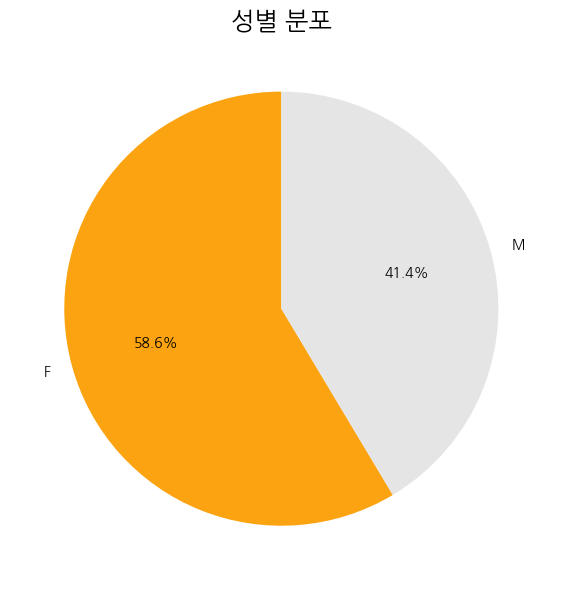

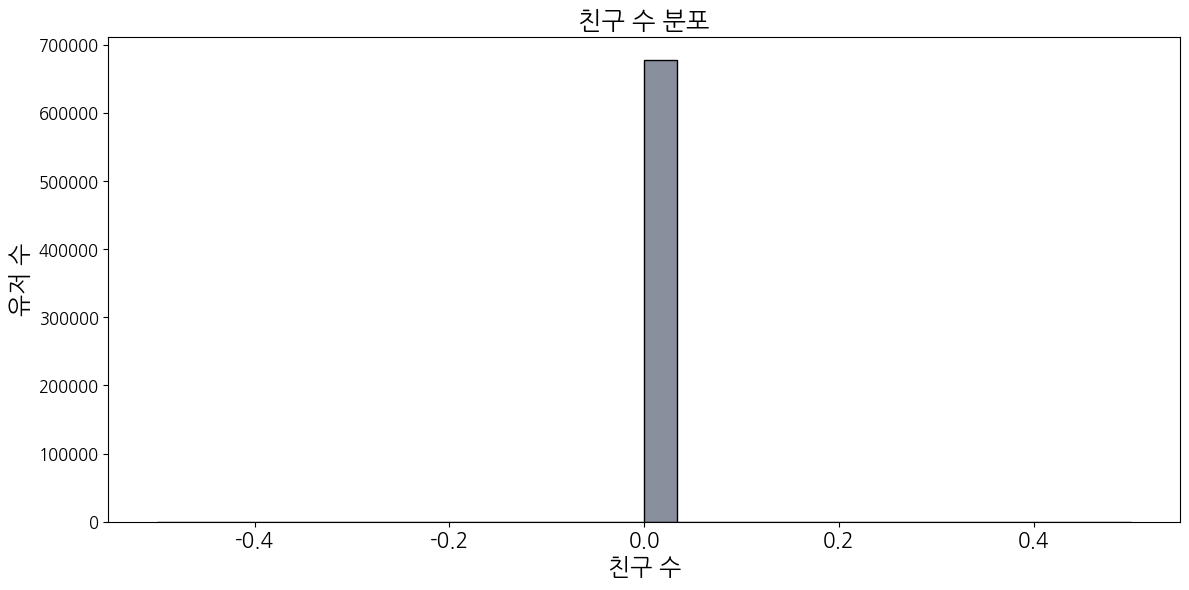

/tmp/ipykernel_203008/241296671.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=user_df, x='signup_dayofweek', order=order, palette='Oranges')


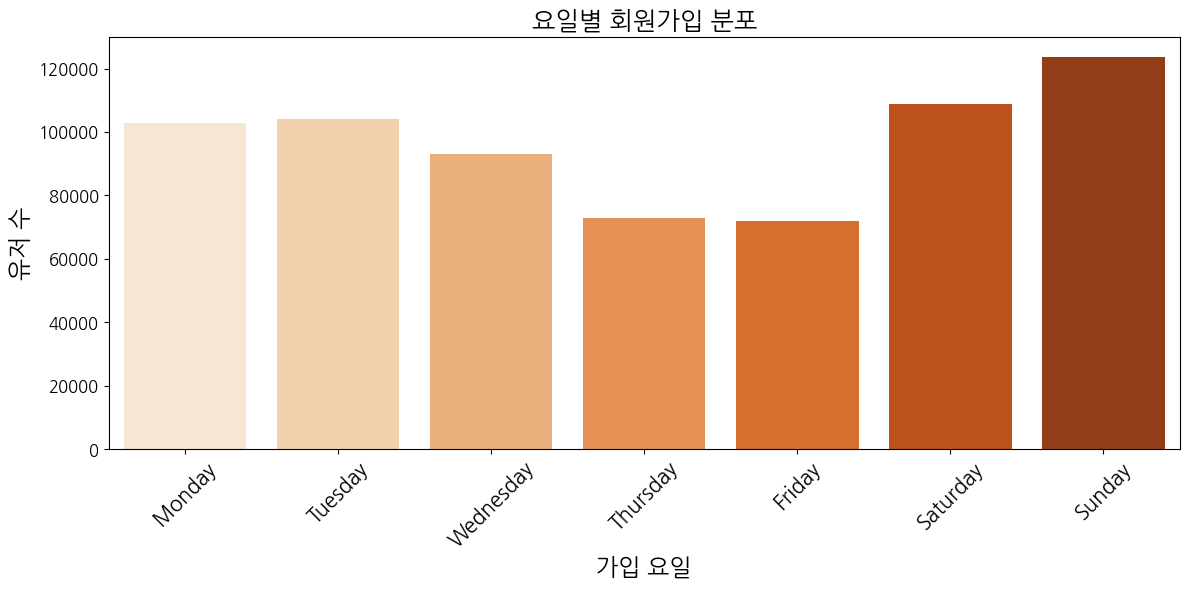

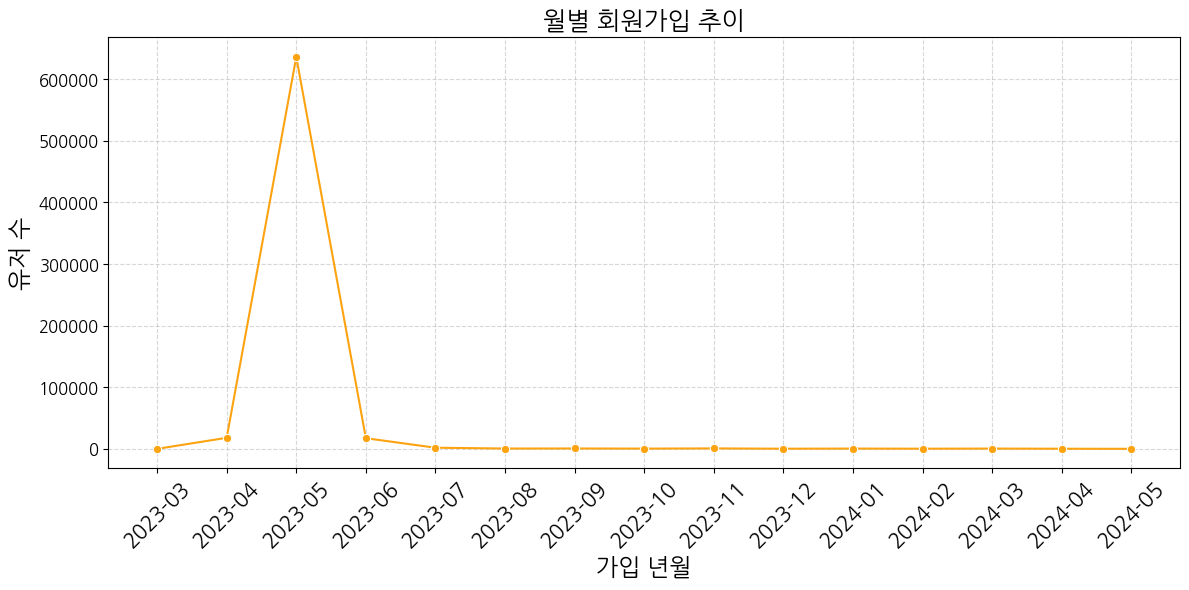

In [13]:
# 3. ÏÑ±Î≥Ñ Î∂ÑÌè¨ (ÌååÏù¥Ï∞®Ìä∏)
plt.figure(figsize=(6, 6))
gender_counts = user_df['gender'].value_counts()
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=[ '#fca311', '#e5e5e5',"#14213d", '#2b2d42']
)
plt.title('ÏÑ±Î≥Ñ Î∂ÑÌè¨', fontsize=18)
plt.tight_layout()
plt.show()

# 4. ÏπúÍµ¨ Ïàò Î∂ÑÌè¨ (ÌûàÏä§ÌÜ†Í∑∏Îû®)
plt.figure(figsize=(12, 6))
sns.histplot(user_df['friend_cnt'], bins=30, kde=True, color='#14213d')
plt.title('ÏπúÍµ¨ Ïàò Î∂ÑÌè¨', fontsize=18)
plt.xlabel('ÏπúÍµ¨ Ïàò', fontsize=17)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 5. ÏöîÏùºÎ≥Ñ Í∞ÄÏûÖ Î∂ÑÌè¨ (ÎßâÎåÄÍ∑∏ÎûòÌîÑ)
plt.figure(figsize=(12, 6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=user_df, x='signup_dayofweek', order=order, palette='Oranges')
plt.title('ÏöîÏùºÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖ Î∂ÑÌè¨', fontsize=18)
plt.xlabel('Í∞ÄÏûÖ ÏöîÏùº', fontsize=17)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=17)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 6. ÏõîÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖ Ï∂îÏù¥ (ÎùºÏù∏Í∑∏ÎûòÌîÑ)
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_signup,
    x='signup_year_month',
    y='user_count',
    marker='o',
    color='#fca311'
)
plt.title('ÏõîÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖ Ï∂îÏù¥', fontsize=18)
plt.xlabel('Í∞ÄÏûÖ ÎÖÑÏõî', fontsize=17)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=17)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipykernel_203008/439690103.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


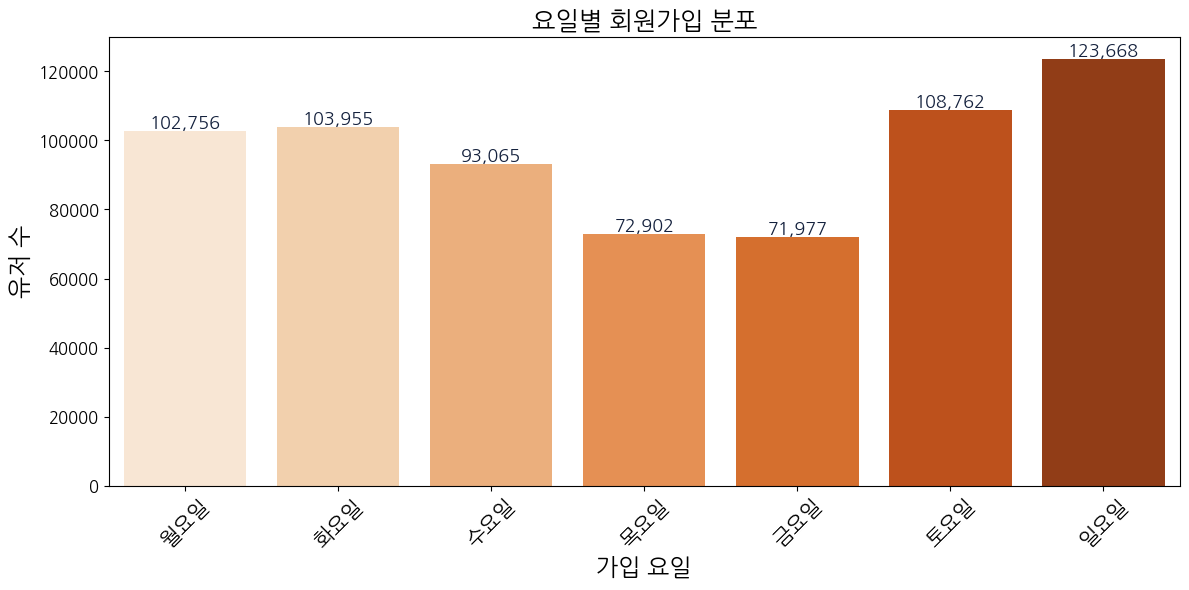

In [14]:
# ÌïúÍ∏Ä ÏöîÏùº ÎùºÎ≤® Îß§Ìïë
weekday_kor = {
    'Monday': 'ÏõîÏöîÏùº',
    'Tuesday': 'ÌôîÏöîÏùº',
    'Wednesday': 'ÏàòÏöîÏùº',
    'Thursday': 'Î™©ÏöîÏùº',
    'Friday': 'Í∏àÏöîÏùº',
    'Saturday': 'ÌÜ†ÏöîÏùº',
    'Sunday': 'ÏùºÏöîÏùº'
}
order_kor = [weekday_kor[wd] for wd in order]
user_df['signup_dayofweek_kor'] = user_df['signup_dayofweek'].map(weekday_kor)

# ÏöîÏùºÎ≥Ñ Í∞ÄÏûÖ Î∂ÑÌè¨ (ÌïúÍ∏Ä ÎùºÎ≤® + Î∞î ÏúÑÏóê Ïù∏ÏõêÏàò ÌëúÏãú)
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=user_df,
    x='signup_dayofweek_kor',
    order=order_kor,
    palette='Oranges'
)
plt.title('ÏöîÏùºÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖ Î∂ÑÌè¨', fontsize=18)
plt.xlabel('Í∞ÄÏûÖ ÏöîÏùº', fontsize=17)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=17)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=12)
plt.tight_layout()

# Î∞î ÏúÑÏóê Ïù∏ÏõêÏàò ÌëúÏãú
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count:,}', (p.get_x() + p.get_width() / 2, count),
                ha='center', va='bottom', fontsize=13, color='#14213d')

plt.show()

/tmp/ipykernel_203008/2541859683.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


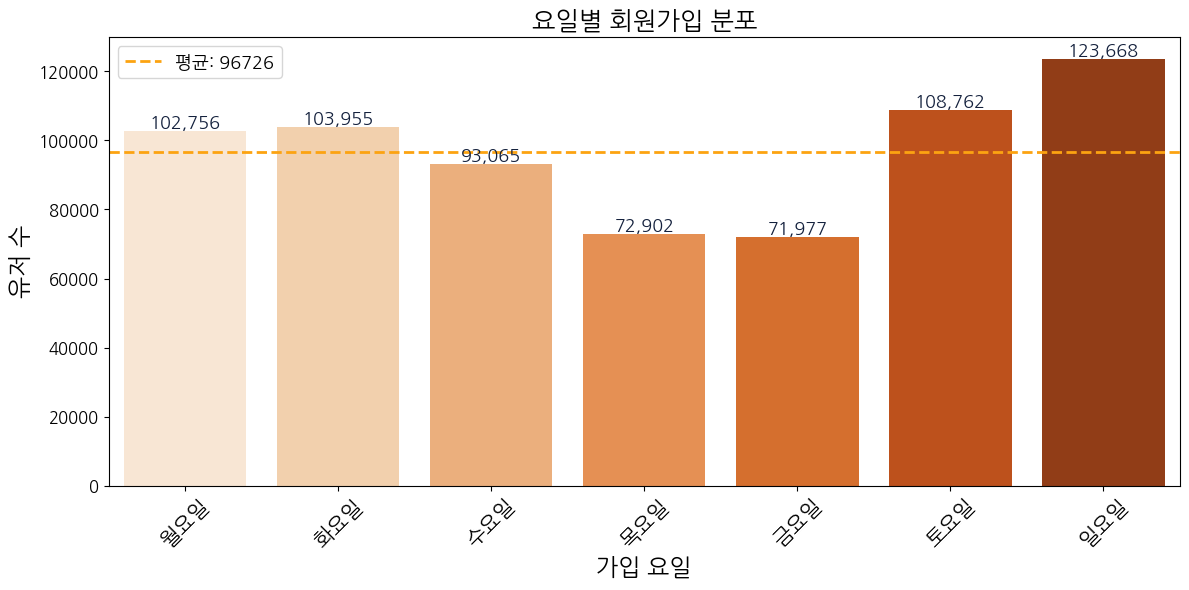

In [15]:
# ÏöîÏùºÎ≥Ñ Í∞ÄÏûÖ Î∂ÑÌè¨ (ÌïúÍ∏Ä ÎùºÎ≤® + Î∞î ÏúÑÏóê Ïù∏ÏõêÏàò ÌëúÏãú + ÌèâÍ∑†ÏÑ†)
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=user_df,
    x='signup_dayofweek_kor',
    order=order_kor,
    palette='Oranges'
)
plt.title('ÏöîÏùºÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖ Î∂ÑÌè¨', fontsize=18)
plt.xlabel('Í∞ÄÏûÖ ÏöîÏùº', fontsize=17)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=17)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=12)
plt.tight_layout()

# Î∞î ÏúÑÏóê Ïù∏ÏõêÏàò ÌëúÏãú
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count:,}', (p.get_x() + p.get_width() / 2, count),
                ha='center', va='bottom', fontsize=13, color='#14213d')

# ÌèâÍ∑†ÏÑ† Ï∂îÍ∞Ä
mean_count = user_df['signup_dayofweek_kor'].value_counts().reindex(order_kor).mean()
ax.axhline(mean_count, color='#fca311', linestyle='--', linewidth=2, label=f'ÌèâÍ∑†: {mean_count:.0f}')
ax.legend(fontsize=13)

plt.show()

#### Í∑∏ÎûòÌîÑ Ìï¥ÏÑù Î∞è Ïù∏ÏÇ¨Ïù¥Ìä∏

üî∂ 1. ÏÑ±Î≥Ñ Î∂ÑÌè¨ ÌååÏù¥Ï∞®Ìä∏        
Ïó¨ÏÑ±(F): ÏïΩ 58.6%       
ÎÇ®ÏÑ±(M): ÏïΩ 41.4%

‚úÖ Ïù∏ÏÇ¨Ïù¥Ìä∏:        
ÏÇ¨Ïö©Ïûê Í∏∞Î∞òÏóêÏÑú Ïó¨ÏÑ±Ïù¥ Îçî ÌÅ∞ ÎπÑÏ§ëÏùÑ Ï∞®ÏßÄÌïòÍ≥† ÏûàÏùå.      
Ïù¥Îäî ÎßàÏºÄÌåÖ Î∞è Ïª§ÎÆ§ÎãàÏºÄÏù¥ÏÖò Ï†ÑÎûµ ÏàòÎ¶Ω Ïãú Ïó¨ÏÑ± ÌÉÄÍ≤ü Ï§ëÏã¨Ïùò Ï†ëÍ∑ºÏù¥ Ìö®Í≥ºÏ†ÅÏùº Í∞ÄÎä•ÏÑ±ÏùÑ ÏãúÏÇ¨Ìï®.      
ÎÇ®ÏÑ± Ïú†Ï†Ä Ïú†ÏûÖÏùÑ ÎÜíÏù¥Í∏∞ ÏúÑÌïú Î≥ÑÎèÑ Ï†ÑÎûµ ÏàòÎ¶ΩÎèÑ Í≥†Î†§ Í∞ÄÎä•.

üî∂ 2. ÏöîÏùºÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖ Î∂ÑÌè¨ (ÎßâÎåÄ Í∑∏ÎûòÌîÑ)        
Ï£ºÎßê(ÌÜ†ÏöîÏùº¬∑ÏùºÏöîÏùº)Ïùò Í∞ÄÏûÖÏûê ÏàòÍ∞Ä Í∞ÄÏû• ÎßéÏùå.        
ÌèâÏùº Ï§ëÏóêÎäî ÌôîÏöîÏùºÏù¥ Í∞ÄÏû• ÎÜíÏùÄ Í∞ÄÏûÖÎ•†ÏùÑ Î≥¥ÏûÑ.

‚úÖ Ïù∏ÏÇ¨Ïù¥Ìä∏:        
ÏÇ¨Ïö©ÏûêÎì§Ïù¥ Ï£ºÎßêÏóê Îçî ÎßéÏù¥ Í∞ÄÏûÖÌïòÎäî Í≤ΩÌñ• ‚Üí Ïó¨Ïú† ÏãúÍ∞ÑÏóê Ïã†Í∑ú Ïú†ÏûÖÏù¥ ÏßëÏ§ëÎê®.       
Ïù¥Î•º Î∞òÏòÅÌïòÏó¨ **Ï£ºÎßêÏóê ÏßëÏ§ëÏ†ÅÏù∏ ÎßàÏºÄÌåÖ(Í¥ëÍ≥† ÏßëÌñâ, ÏΩòÌÖêÏ∏† ÎÖ∏Ï∂ú)**ÏùÑ Í∏∞ÌöçÌï† Ïàò ÏûàÏùå.      
Í∞ÄÏûÖ ÏãúÏ†êÍ≥º Ï≤´ ÌñâÎèô(Ïòà: Ï≤´ Ìà¨Ìëú/ÌîºÎìúÎ∞±) ÏÇ¨Ïù¥Ïùò ÏãúÍ∞Ñ Í∞ÑÍ≤© Î∂ÑÏÑùÎèÑ Ïó∞Í≤∞Ìï¥Î≥¥Î©¥ Ï¢ãÏùå.

üî∂ 3. ÏõîÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖ Ï∂îÏù¥ (Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ)        
2023ÎÖÑ 5ÏõîÏóê Í∞ÄÏûÖÏûê ÏàòÍ∞Ä ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎßéÏùå (ÌîºÌÅ¨).        
Ïù¥ÌõÑÏóêÎäî Í∏âÍ≤©Ìûà Í∞êÏÜåÌïòÏó¨ ÎÇÆÏùÄ ÏàòÏ§ÄÏùÑ Ïú†ÏßÄ.

‚úÖ Ïù∏ÏÇ¨Ïù¥Ìä∏:        
2023ÎÖÑ 5ÏõîÏùÄ ÌäπÏàò Ïù¥Î≤§Ìä∏ ÌòπÏùÄ ÎßàÏºÄÌåÖÏùò ÏòÅÌñ•ÏúºÎ°ú Ïú†ÏûÖÏù¥ Í∏âÏ¶ùÌñàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏùå.      
ÌïòÏßÄÎßå Ïú†ÏßÄÎêòÏßÄ Î™ªÌïòÍ≥† 6ÏõîÎ∂ÄÌÑ∞ Í∏âÍ∞ê ‚Üí ÌîºÌÅ¨ Ïù¥ÌõÑ Î¶¨ÌÖêÏÖò, Ïò®Î≥¥Îî©, Ï≤´ Í≤ΩÌóò ÏÑ§Í≥Ñ Î∂ÄÏ°± Í∞ÄÎä•ÏÑ±.       
ÌîºÌÅ¨ ÎãπÏãú Ïú†ÏûÖÎêú Ïú†Ï†ÄÎì§Ïùò ÌñâÎèô Î∞è Î¶¨ÌÖêÏÖò ÌäπÏÑ±ÏùÑ Î∂ÑÏÑùÌï¥, Ïù¥ÌõÑ Ïú†Ï†Ä ÎåÄÎπÑ Ïñ¥Îñ§ Ï∞®Ïù¥Í∞Ä ÏûàÏóàÎäîÏßÄÎèÑ ÌÉêÏÉâ Ìè¨Ïù∏Ìä∏.

ÎòêÌïú, Îç∞Ïù¥ÌÑ∞Í∞Ä 6ÏõîÏóê Ï¥àÏ†êÏù¥ ÎêòÎäî Îã®Í∏∞ÏÑ± Ïñ¥ÌîåÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Í≥ÑÏ†àÏóê Îî∞Î•∏ ÏòÅÌñ•ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏóÜÏùå

Ï∂îÍ∞ÄÎ°ú Î≥º ÎÇ¥Ïö©Îì§

- ÌéòÏù¥ÏßÄ ÌùêÎ¶Ñ Î∂ÑÏÑù (Signup Funnel)      
ÌöåÏõêÍ∞ÄÏûÖ Ï†Ñ Ïñ¥Îñ§ ÌéòÏù¥ÏßÄ(ÎòêÎäî ÌñâÎèô)Îì§ÏùÑ Í±∞ÏπòÎäîÍ∞Ä?        
Î™©Ï†Å : Ïù¥ÌÉàÎ•†Ïù¥ ÎÜíÏùÄ ÏßÄÏ†êÏùÄ Ïñ¥ÎîîÏù∏Í∞Ä?       

- Í∞ÄÏûÖ ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÏÑù       
Î∞©Î¨∏Ìï¥ÏÑú Í∞ÄÏûÖÌïòÍ∏∞ÍπåÏßÄ Í±∏Î¶∞ ÏãúÍ∞Ñ Î∂ÑÌè¨        
Î™©Ï†Å : Î∞îÎ°ú Í∞ÄÏûÖ vs Ïó¨Îü¨ Î≤à Î∞©Î¨∏ ÌõÑ Í∞ÄÏûÖ Íµ¨Î∂Ñ       

- Ïã†Í∑ú Í∞ÄÏûÖÏûêÏùò Ï¥àÍ∏∞ ÌñâÎèô       
Í∞ÄÏûÖ ÏßÅÌõÑ Ïú†Ï†ÄÍ∞Ä Ïñ¥Îñ§ ÌñâÎèôÏùÑ ÌñàÎäîÍ∞Ä?        
"ÌôúÏÑ±Ìôî(Activation)"Î°ú ÎÑòÏñ¥Í∞ÄÎäî ÌûåÌä∏Î•º Ïó¨Í∏∞ÏÑú ÏñªÏùå      

## Ïï±ÏùÑ ÏãúÏûëÌïòÍ≥† ÌöåÏõêÍ∞ÄÏûÖ ÏãúÏûëÌïòÎäîÎç∞ Í±∏Î¶¨Îäî ÏãúÍ∞Ñ Íµ¨ÌïòÍ∏∞
---
- complete_signupÏùÑ Í∞ÄÏßÑ user_id ÌÉêÏÉâÌïòÏó¨ Í∑∏ user_id Ï§ë launch_appÏùÑ Í∞ÄÏßÑ user_idÍ∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
- complete_signupÏù¥ launch_app Î≥¥Îã§ ÏïûÏóê ÏûàÎäî Í≤ΩÏö∞Í∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
- Îëê event ÏÇ¨Ïù¥ ÏãúÍ∞Ñ Íµ¨ÌïòÍ∏∞

#### Í∑∏ Ï†Ñ session_idÏóê ÎåÄÌï¥ÏÑú signupÍ≥º user_idÏóê Îî∞Î•∏ Ï∞®Ïù¥Í∞Ä ÏûàÏùÑÍπå?

In [16]:
# ÌöåÏõêÍ∞ÄÏûÖ Ï†Ñ event_keyÏùò ÌùêÎ¶ÑÏùÑ ÌååÏïÖÌïòÍ∏∞ ÏúÑÌï¥, ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å Ïù¥Î≤§Ìä∏("complete_signup")Í∞Ä Î∞úÏÉùÌïú session_idÎ•º Ï∂îÏ∂ú
signup_sessions = complete_signup_df['session_id'].unique()

# Ìï¥Îãπ session_idÏóê ÏÜçÌïú Î™®Îì† Ïù¥Î≤§Ìä∏Î•º Ï∂îÏ∂ú
signup_sessions_events = final_hackle_df[final_hackle_df['session_id'].isin(signup_sessions)].copy()

# Í∞Å sessionÎ≥ÑÎ°ú event_keyÏùò ÏàúÏÑúÎ•º ÌôïÏù∏
signup_sessions_events_sorted = signup_sessions_events.sort_values(['session_id', 'event_datetime'])

# ÏòàÏãú: Ìïú sessionÏùò event_key ÏãúÌÄÄÏä§ ÌôïÏù∏
example_session_id = signup_sessions_events_sorted['session_id'].iloc[0]
example_session_events = signup_sessions_events_sorted[signup_sessions_events_sorted['session_id'] == example_session_id]['event_key'].tolist()
print(f"Example session ({example_session_id}) event sequence:")
print(example_session_events)

# Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÌöåÏõêÍ∞ÄÏûÖ Ï†Ñ event_key ÏãúÌÄÄÏä§ ÏßëÍ≥Ñ (ÏÉÅÏúÑ 10Í∞ú Ìå®ÌÑ¥)

# sessionÎ≥Ñ event_key ÏãúÌÄÄÏä§ Ï∂îÏ∂ú
session_event_sequences = (
    signup_sessions_events_sorted.groupby('session_id')['event_key']
    .apply(list)
    .reset_index(name='event_sequence')
)

# ÏãúÌÄÄÏä§Î≥ÑÎ°ú count ÏßëÍ≥Ñ
sequence_counts = session_event_sequences['event_sequence'].value_counts().head(10)
print("\nTop 10 signup funnel event sequences:")
for seq, count in sequence_counts.items():
    print(f"{seq} : {count}Ìöå")

Example session (00181B41-078B-4CA0-815F-72D24E5DDF9A) event sequence:
['launch_app', '$session_end', 'launch_app', '$session_start', '$session_end', 'launch_app', 'launch_app', '$session_start', '$session_start', 'launch_app', 'launch_app', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', '$session_end', 'view_signup', '$session_start', 'complete_signup', 'view_timeline_tap', 'click_bottom_navigation_timeline', 'click_bottom_navigation_questions', 'click_bottom_navigation_profile', 'view_lab_tap', 'view_timeline_tap', 'click_bottom_navigation_timeline', 'view_timeline_tap', 'view_timeline_tap', 'click_bottom_navigation_questions', 'view_lab_tap', 'click_bottom_navigation_questions', 'click_bottom_navigation_questions', 'view_timeline_tap', 'click_question_start', 'view_lab_tap', 'view_timeline_tap', 'click_bottom_navigation_profile', 'view_timeline_tap', 'view_lab_tap', 'click_bottom_navigation_questions', 'view_timeline_tap', 'c

In [17]:
# event_keyÍ∞Ä 'complete_signup'Ïù∏ Îç∞Ïù¥ÌÑ∞ Ï§ë user_idÍ∞Ä ÏûàÎäî Í≤ΩÏö∞ÏôÄ ÏóÜÎäî Í≤ΩÏö∞ Ïàò ÌååÏïÖ
complete_signup_events = signup_sessions_events[signup_sessions_events['event_key'] == 'complete_signup']

user_id_exists = complete_signup_events['user_id'].notnull().sum()
user_id_missing = complete_signup_events['user_id'].isnull().sum()

print(f"user_idÍ∞Ä ÏûàÎäî Í≤ΩÏö∞: {user_id_exists}Í±¥")
print(f"user_idÍ∞Ä ÏóÜÎäî Í≤ΩÏö∞: {user_id_missing}Í±¥")

user_idÍ∞Ä ÏûàÎäî Í≤ΩÏö∞: 974Í±¥
user_idÍ∞Ä ÏóÜÎäî Í≤ΩÏö∞: 0Í±¥


In [18]:
# complete_signup Î∞îÎ°ú ÏßÅÏ†Ñ event_keyÎ•º Ï∞æÍ∏∞ ÏúÑÌïú ÏΩîÎìú

# session_idÏôÄ event_datetime Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨Îêú Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©
# Í∞Å sessionÎ≥ÑÎ°ú complete_signup Ïù¥Î≤§Ìä∏Ïùò ÏßÅÏ†Ñ event_key Ï∂îÏ∂ú

def get_prev_event_key(df):
    # df: Ìïú sessionÏùò Ïù¥Î≤§Ìä∏ ÏãúÌÄÄÏä§ (Ïù¥ÎØ∏ ÏãúÍ∞ÑÏàú Ï†ïÎ†¨Îê®)
    idx = df[df['event_key'] == 'complete_signup'].index
    prev_keys = []
    for i in idx:
        prev_idx = df.index.get_loc(i) - 1
        if prev_idx >= 0:
            prev_keys.append(df.iloc[prev_idx]['event_key'])
    return prev_keys

# session_id Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôîÌïòÏó¨ ÏßÅÏ†Ñ event_key Ï∂îÏ∂ú
prev_event_keys = signup_sessions_events_sorted.groupby('session_id').apply(get_prev_event_key)
# Î¶¨Ïä§Ìä∏Î°ú ÌéºÏπòÍ∏∞
prev_event_keys_flat = [item for sublist in prev_event_keys if sublist for item in sublist]

# Í≤∞Í≥º ÏßëÍ≥Ñ
prev_event_key_counts = Counter(prev_event_keys_flat)

# ÏÉÅÏúÑ 10Í∞ú Ï∂úÎ†•
print("complete_signup Î∞îÎ°ú ÏßÅÏ†Ñ event_key Top 10:")
for key, count in prev_event_key_counts.most_common(10):
    print(f"{key}: {count}Ìöå")

complete_signup Î∞îÎ°ú ÏßÅÏ†Ñ event_key Top 10:
$session_start: 534Ìöå
$session_end: 307Ìöå
view_signup: 133Ìöå


In [19]:
# event_keyÍ∞Ä complete_signupÏù∏ Í≤ΩÏö∞Ïùò ÌñâÏù¥ ÏñºÎßàÎÇò ÎêòÎäîÏßÄ
# Ïù¥Í±∞Îäî Í∞ôÏùÄ session_idÏóê ÎåÄÌï¥ÏÑú Í∞ôÏùÄ complete_signupÏù¥ ÏûáÏùÑ Ïàò ÏûáÏùåÏùå
print(f"Ïù¥Î≤§Ìä∏ ÌÇ§Í∞Ä complete_signupÏù∏ Í≤ΩÏö∞ : {final_hackle_df[final_hackle_df.event_key == "complete_signup"].shape[0]}")

Ïù¥Î≤§Ìä∏ ÌÇ§Í∞Ä complete_signupÏù∏ Í≤ΩÏö∞ : 974


- event_keyÍ∞Ä "session_start"ÏôÄ "complete_signup" Ïùò Ï∞®Ïù¥Î•º Íµ¨ÌïòÍ∏∞Ïóî ÏúÑ ÎÇ¥Ïö©Ï≤òÎüº complete_signup Î∞îÎ°ú ÏßÅÏ†ÑÏóê Ïò§Îäî Í≤ΩÏö∞Í∞Ä Ï°¥Ïû¨ÌïòÏó¨ Íµ¨ÌïòÍ≥†Ïûê ÌïòÎäî Í∞íÏù¥ Ï†úÎåÄÎ°ú Íµ¨Ìï¥ÏßÄÏßÄ ÏïäÏùÑ Í≤ÉÏù¥Í∏∞Ïóê -> launch_appÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÌïòÍ≤å ÎêúÎã§Î©¥?
- Í∑∏Îü¨Í∏∞ ÏúÑÌï¥ÏÑú Ïö∞ÏÑ† complete_signupÏùÑ Í∞ÄÏßÑ session_idÏóê Î™®Îëê "complete_signup"Ïù¥ Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏

In [20]:
# "complete_signup" Ïù¥Î≤§Ìä∏Í∞Ä ÏûàÎäî session_id Ï∂îÏ∂ú
signup_session_ids = final_hackle_df.loc[final_hackle_df['event_key'] == 'complete_signup', 'session_id'].unique()

# Ìï¥Îãπ session_idÏùò Î™®Îì† Ïù¥Î≤§Ìä∏ Ï∂îÏ∂ú
signup_sessions_all_events = final_hackle_df[final_hackle_df['session_id'].isin(signup_session_ids)]

# Í∞Å session_idÎ≥ÑÎ°ú "launch_app" Ïù¥Î≤§Ìä∏Í∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
has_launch_app = signup_sessions_all_events.groupby('session_id')['event_key'].apply(lambda x: 'launch_app' in x.values)

# "complete_signup"Ïù¥ ÏûàÎäî session_id Ï§ë "launch_app"Ïù¥ ÏóÜÎäî session_id Í∞úÏàò
num_sessions_without_launch_app = (~has_launch_app).sum()
print(f'"complete_signup" session Ï§ë "launch_app"Ïù¥ ÏóÜÎäî session Ïàò: {num_sessions_without_launch_app}')

# "complete_signup" Ïù¥Î≤§Ìä∏Í∞Ä Î∞úÏÉùÌïú ÏãúÏ†ê Ïù¥Ï†ÑÏóê "launch_app"Ïù¥ ÏûàÏóàÎäîÏßÄ ÌôïÏù∏
def launch_app_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'complete_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup Ïù¥Ï†ÑÏóê launch_appÏù¥ ÏûàÎäîÏßÄ
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'launch_app').any()

launch_app_before = signup_sessions_all_events.groupby('session_id').apply(launch_app_before_signup)
num_sessions_without_launch_app_before = (~launch_app_before).sum()
print(f'"complete_signup" session Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "launch_app"Ïù¥ ÏóÜÎäî session Ïàò: {num_sessions_without_launch_app_before}')
num_sessions_with_launch_app_before = (launch_app_before).sum()
print(f'"complete_signup" session Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "launch_app"Ïù¥ ÏûàÎäî session Ïàò: {num_sessions_with_launch_app_before}')

"complete_signup" session Ï§ë "launch_app"Ïù¥ ÏóÜÎäî session Ïàò: 0
"complete_signup" session Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "launch_app"Ïù¥ ÏóÜÎäî session Ïàò: 3
"complete_signup" session Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "launch_app"Ïù¥ ÏûàÎäî session Ïàò: 970


In [21]:
# complete_signup Ïù¥Ï†ÑÏóê launch_appÏù¥ ÏóÜÎäî session_id Ï∂îÏ∂ú
sessions_without_launch_app_before = launch_app_before[~launch_app_before].index.tolist()

print(f"complete_signup Ïù¥Ï†ÑÏóê launch_appÏù¥ ÏóÜÎäî session_id Ïàò: {len(sessions_without_launch_app_before)}")
print("ÏòàÏãú session_id 5Í∞ú:", sessions_without_launch_app_before[:5])

# Ìï¥Îãπ sessionÏùò Ïù¥Î≤§Ìä∏ ÏãúÌÄÄÏä§ ÏòàÏãú Ï∂úÎ†•
for session_id in sessions_without_launch_app_before[:3]:
    events = signup_sessions_all_events[signup_sessions_all_events['session_id'] == session_id].sort_values('event_datetime')
    print(f"\nSession ID: {session_id}")
    print(events[['event_datetime', 'event_key']])

complete_signup Ïù¥Ï†ÑÏóê launch_appÏù¥ ÏóÜÎäî session_id Ïàò: 3
ÏòàÏãú session_id 5Í∞ú: ['96C2C47D-7BC2-4144-8AC6-1FADE599F10A', 'B941F9F9-CF53-4DAE-A204-75E666B5D277', 'FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72']

Session ID: 96C2C47D-7BC2-4144-8AC6-1FADE599F10A
             event_datetime                        event_key
4430933 2023-08-05 16:30:11                   $session_start
4430983 2023-08-05 16:30:47                      view_signup
4430978 2023-08-05 16:30:52                      view_signup
4430953 2023-08-05 16:31:11                      view_signup
4430959 2023-08-05 16:31:13                      view_signup
...                     ...                              ...
4430922 2023-08-08 12:28:30              click_question_open
4430945 2023-08-08 12:28:42  click_bottom_navigation_profile
4430941 2023-08-08 12:28:42                view_timeline_tap
4430961 2023-08-08 12:28:42                 view_profile_tap
4430918 2023-08-08 12:28:42                     view_lab_tap

[66 row

In [22]:
# session_id Ïª¨ÎüºÍ≥º Î¶¨Ïä§Ìä∏ Í∞í Î™®Îëê strÎ°ú Î≥ÄÌôò Î∞è strip Ï≤òÎ¶¨
final_hackle_df['session_id'] = final_hackle_df['session_id'].astype(str).str.strip()
sessions_without_launch_app_before = [str(s).strip() for s in sessions_without_launch_app_before]

for id in sessions_without_launch_app_before:
    print(f"session_id : {id}")
    display(final_hackle_df[(final_hackle_df['session_id'] == id) & 
                            (final_hackle_df['event_key'] == "launch_app")])
    display(final_hackle_df[(final_hackle_df['session_id'] == id) & 
                            (final_hackle_df['event_key'] == "complete_signup")])

session_id : 96C2C47D-7BC2-4144-8AC6-1FADE599F10A


event_id      event_datetime   event_key  \
4430957  8df748d5-4c63-40c1-8e24-32a8885d1e9d 2023-08-08 12:27:54  launch_app   

                                   session_id  friend_count  question_id  \
4430957  96C2C47D-7BC2-4144-8AC6-1FADE599F10A          51.0          NaN   

         heart_balance      id  user_id                             device_id  \
4430957         1213.0  282944  1579742  96C2C47D-7BC2-4144-8AC6-1FADE599F10A   

        osname osversion  
4430957    iOS      16.6

event_id      event_datetime  \
4430971  d6ac0ed4-91b4-4c4c-8b58-b850934b30f0 2023-08-05 16:32:17   

               event_key                            session_id  friend_count  \
4430971  complete_signup  96C2C47D-7BC2-4144-8AC6-1FADE599F10A           0.0   

         question_id  heart_balance      id  user_id  \
4430971          NaN          300.0  282944  1579742   

                                    device_id osname osversion  
4430971  96C2C47D-7BC2-4144-8AC6-1FADE599F10A    iOS      16.6

session_id : B941F9F9-CF53-4DAE-A204-75E666B5D277


event_id      event_datetime   event_key  \
47355  06587f8b-d740-480d-94e4-3e299f6ee0fb 2023-08-07 12:00:41  launch_app   
47357  069451e6-8fbf-4d61-ab7a-54b42641a551 2023-08-05 12:05:43  launch_app   
47367  072a5918-b3a7-4d27-9793-a1f28bf844b6 2023-07-23 04:01:05  launch_app   
47371  07aaa629-2aa1-4e93-97a6-68621630fff4 2023-08-07 19:50:34  launch_app   
47373  07beb114-1f74-4f79-a01b-753323a651d2 2023-08-05 22:31:57  launch_app   
...                                     ...                 ...         ...   
49215  f434ad7b-a668-4052-a472-f1080dcf70ac 2023-07-24 01:14:24  launch_app   
49240  f6df1394-8688-4ab3-bd41-b55bd1e35473 2023-07-24 03:23:16  launch_app   
49265  fa6d9115-593e-4147-a246-4fd8dd74f2e4 2023-08-02 14:06:16  launch_app   
49272  fb97b454-a4b4-46d0-846a-2d027379c08b 2023-07-25 11:32:29  launch_app   
49296  ffc58d27-55e8-49ce-a081-3bc72583061e 2023-08-06 05:07:14  launch_app   

                                 session_id  friend_count  question_id  \
47355  B941F9F9-CF53-4DAE-A204-75E666B5D277         116.0          NaN   
47357  B941F9F9-CF53-4DAE-A204-75E666B5D277         116.0          NaN   
47367  B941F9F9-CF53-4DAE-A204-75E666B5D277         116.0          NaN   
47371  B941F9F9-CF53-4DAE-A204-75E666B5D277         116.0          NaN   
47373  B941F9F9-CF53-4DAE-A204-75E666B5D277         116.0          NaN   
...                                     ...           ...          ...   
49215  B941F9F9-CF53-4DAE-A204-75E666B5D277         116.0          NaN   
49240  B941F9F9-CF53-4DAE-A204-75E666B5D277         116.0          NaN   
49265  B941F9F9-CF53-4DAE-A204-75E666B5D277         116.0          NaN   
49272  B941F9F9-CF53-4DAE-A204-75E666B5D277         116.0          NaN   
49296  B941F9F9-CF53-4DAE-A204-75E666B5D277         116.0          NaN   

       heart_balance     id  user_id                             device_id  \
47355          182.0  80166  1579831  B941F9F9-CF53-4DAE-A204-75E666B5D277   
47357          182.0  80166  1579831  B941F9F9-CF53-4DAE-A204-75E666B5D277   
47367          175.0  80166  1579831  B941F9F9-CF53-4DAE-A204-75E666B5D277   
47371          182.0  80166  1579831  B941F9F9-CF53-4DAE-A204-75E666B5D277   
47373          182.0  80166  1579831  B941F9F9-CF53-4DAE-A204-75E666B5D277   
...              ...    ...      ...                                   ...   
49215          175.0  80166  1579831  B941F9F9-CF53-4DAE-A204-75E666B5D277   
49240          175.0  80166  1579831  B941F9F9-CF53-4DAE-A204-75E666B5D277   
49265          182.0  80166  1579831  B941F9F9-CF53-4DAE-A204-75E666B5D277   
49272          182.0  80166  1579831  B941F9F9-CF53-4DAE-A204-75E666B5D277   
49296          182.0  80166  1579831  B941F9F9-CF53-4DAE-A204-75E666B5D277   

      osname osversion  
47355    iOS      16.6  
47357    iOS      16.6  
47367    iOS      16.6  
47371    iOS      16.6  
47373    iOS      16.6  
...      ...       ...  
49215    iOS      16.6  
49240    iOS      16.6  
49265    iOS      16.6  
49272    iOS      16.6  
49296    iOS      16.6  

[92 rows x 12 columns]

event_id      event_datetime  \
48087  64452779-9565-4d14-b173-c6458227f22e 2023-08-07 19:58:55   
48130  6a94e2be-7158-487f-b81f-cd04766a2a37 2023-07-19 01:06:22   

             event_key                            session_id  friend_count  \
48087  complete_signup  B941F9F9-CF53-4DAE-A204-75E666B5D277           0.0   
48130  complete_signup  B941F9F9-CF53-4DAE-A204-75E666B5D277           0.0   

       question_id  heart_balance     id  user_id  \
48087          NaN          300.0  80166  1579831   
48130          NaN          300.0  80166  1579831   

                                  device_id osname osversion  
48087  B941F9F9-CF53-4DAE-A204-75E666B5D277    iOS      16.6  
48130  B941F9F9-CF53-4DAE-A204-75E666B5D277    iOS      16.6

session_id : FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72


event_id      event_datetime   event_key  \
764183  04b3595a-24ce-4f45-8eaf-033ecaf94c92 2023-07-22 11:32:18  launch_app   
764235  9c3b0cbb-5e8a-4dd1-bc14-8d3723e6a9ef 2023-07-22 11:31:53  launch_app   

                                  session_id  friend_count  question_id  \
764183  FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72           0.0          NaN   
764235  FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72           0.0          NaN   

        heart_balance      id  user_id                             device_id  \
764183          597.0  239450  1579154  FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72   
764235          300.0  239450  1579154  FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72   

       osname osversion  
764183    iOS    16.5.1  
764235    iOS    16.5.1

event_id      event_datetime  \
764220  6da2dcab-01d5-4fb5-b8f9-97c5fd43958e 2023-07-20 20:52:54   

              event_key                            session_id  friend_count  \
764220  complete_signup  FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72           0.0   

        question_id  heart_balance      id  user_id  \
764220          NaN          300.0  239450  1579154   

                                   device_id osname osversion  
764220  FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72    iOS    16.5.1

launch_appÏù¥ complete_signupÎ≥¥Îã§ Îä¶ÏùÄ Í≤ΩÏö∞Îì§Ïù¥ ÏãùÎ≥ÑÎêòÏóàÎäîÎç∞ Í∑∏ Ï§ë Ìïú session_idÏóê ÎåÄÌï¥ÏÑúÎäî complete_signupÏù¥ Ïó¨Îü¨ Í∞íÏùÑ Í∞ÄÏßê     
- Ïù¥ ÏπúÍµ¨Îì§ÏùÄ session_idÎ°ú Î∂ÑÏÑùÌï† ÏãúÏóê Ïù¥ÏÉÅÏπòÎ°ú ÌåêÎã® Î∞è Ï†úÍ±∞Î•º Ìï†ÏßÄ Í≥†ÎØºÌï¥Î¥êÏïºÌï®

launch_app ‚Üí complete_signup ÌèâÍ∑† ÏÜåÏöî ÏãúÍ∞Ñ: 664.93Î∂Ñ
launch_app ‚Üí complete_signup Ï§ëÏïôÍ∞í ÏÜåÏöî ÏãúÍ∞Ñ: 2.02Î∂Ñ


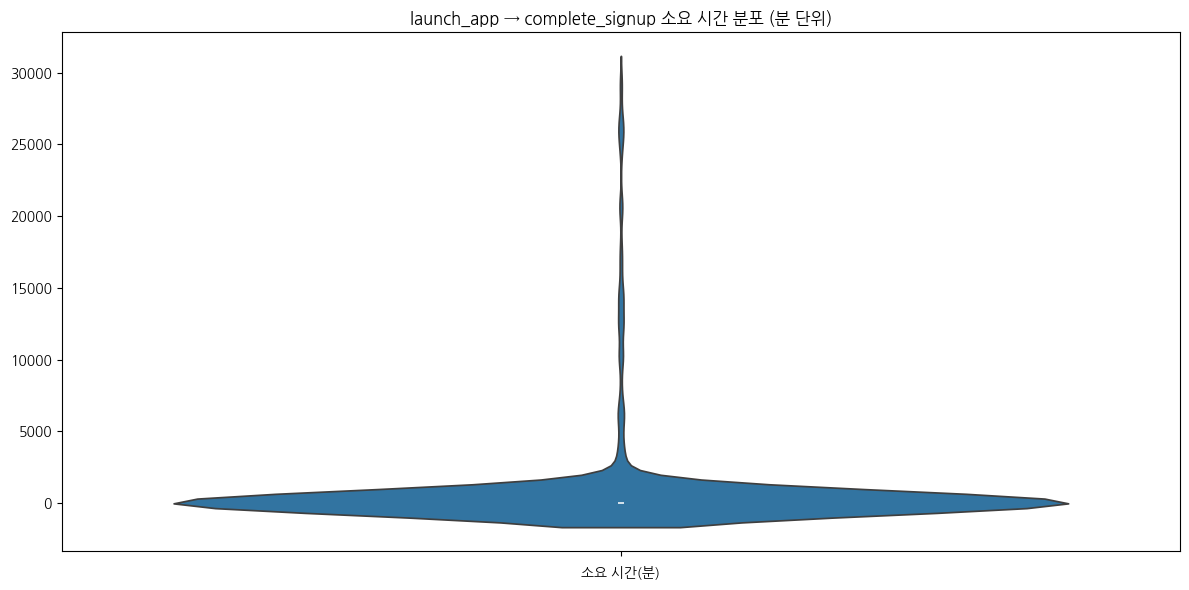

In [23]:
# session_idÎ≥ÑÎ°ú launch_appÍ≥º complete_signupÏùò ÏãúÍ∞Ñ Ï∞®Ïù¥ Íµ¨ÌïòÍ∏∞ (launch_appÏù¥ complete_signupÎ≥¥Îã§ ÏïûÏÑ† Í≤ΩÏö∞Îßå)

def get_launch_signup_time_diff(df):
    df_sorted = df.sort_values('event_datetime')
    launch_times = df_sorted.loc[df_sorted['event_key'] == 'launch_app', 'event_datetime']
    signup_times = df_sorted.loc[df_sorted['event_key'] == 'complete_signup', 'event_datetime']
    if launch_times.empty or signup_times.empty:
        return np.nan
    # Í∞ÄÏû• Îπ†Î•∏ launch_app, Í∞ÄÏû• Îπ†Î•∏ complete_signup
    first_launch = launch_times.iloc[0]
    first_signup = signup_times.iloc[0]
    # launch_appÏù¥ complete_signupÎ≥¥Îã§ ÏïûÏÑ† Í≤ΩÏö∞Îßå
    if first_launch < first_signup:
        return (first_signup - first_launch).total_seconds() / 60  # Î∂Ñ Îã®ÏúÑ
    else:
        return np.nan

# session_idÎ≥Ñ ÏãúÍ∞Ñ Ï∞®Ïù¥ Í≥ÑÏÇ∞
time_diffs = (
    final_hackle_df.groupby('session_id')
    .apply(get_launch_signup_time_diff)
    .dropna()
)

# ÌèâÍ∑†, Ï§ëÏïôÍ∞í
mean_diff = time_diffs.mean()
median_diff = time_diffs.median()
print(f"launch_app ‚Üí complete_signup ÌèâÍ∑† ÏÜåÏöî ÏãúÍ∞Ñ: {mean_diff:.2f}Î∂Ñ")
print(f"launch_app ‚Üí complete_signup Ï§ëÏïôÍ∞í ÏÜåÏöî ÏãúÍ∞Ñ: {median_diff:.2f}Î∂Ñ")

# Î∞îÏù¥Ïò¨Î¶∞ ÌîåÎ°Ø ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.violinplot(data=time_diffs)
plt.title('launch_app ‚Üí complete_signup ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÌè¨ (Î∂Ñ Îã®ÏúÑ)')
plt.xlabel('ÏÜåÏöî ÏãúÍ∞Ñ(Î∂Ñ)')
plt.tight_layout()
plt.show()

In [24]:
# ÎßåÏïΩ view_signupÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÌïòÍ≤å ÎêúÎã§Î©¥?
# ÏùºÎã® complete_signup ÏùÑ Í∞ÄÏßÑ session_idÎì§ Ï§ë view_signup Í∞ÄÏßÄÏßÄ ÏïäÏùÄ session_id ÏûáÎäîÏßÄ ÌôïÏù∏

# "complete_signup" Ïù¥Î≤§Ìä∏Í∞Ä ÏûàÎäî session_id Ï∂îÏ∂ú
signup_session_ids = final_hackle_df.loc[final_hackle_df['event_key'] == 'complete_signup', 'session_id'].unique()

# Ìï¥Îãπ session_idÏùò Î™®Îì† Ïù¥Î≤§Ìä∏ Ï∂îÏ∂ú
signup_sessions_all_events = final_hackle_df[final_hackle_df['session_id'].isin(signup_session_ids)]

# Í∞Å session_idÎ≥ÑÎ°ú "view_signup" Ïù¥Î≤§Ìä∏Í∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
has_view_signup = signup_sessions_all_events.groupby('session_id')['event_key'].apply(lambda x: 'view_signup' in x.values)

# "complete_signup"Ïù¥ ÏûàÎäî session_id Ï§ë "view_signup"Ïù¥ ÏóÜÎäî session_id Í∞úÏàò
num_sessions_without_view_signup = (~has_view_signup).sum()
print(f'"complete_signup" session Ï§ë "view_signup"Ïù¥ ÏóÜÎäî session Ïàò: {num_sessions_without_view_signup}')

# "complete_signup" Ïù¥Î≤§Ìä∏Í∞Ä Î∞úÏÉùÌïú ÏãúÏ†ê Ïù¥Ï†ÑÏóê "view_signup"Ïù¥ ÏûàÏóàÎäîÏßÄ ÌôïÏù∏
def view_signup_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'complete_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup Ïù¥Ï†ÑÏóê view_signupÏù¥ ÏûàÎäîÏßÄ
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'view_signup').any()

view_signup_before = signup_sessions_all_events.groupby('session_id').apply(view_signup_before_signup)
num_sessions_without_view_signup_before = (~view_signup_before).sum()
print(f'"complete_signup" session Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "view_signup"Ïù¥ ÏóÜÎäî session Ïàò: {num_sessions_without_view_signup_before}')
num_sessions_with_view_signup_before = (view_signup_before).sum()
print(f'"complete_signup" session Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "view_signup"Ïù¥ ÏûàÎäî session Ïàò: {num_sessions_with_view_signup_before}')

"complete_signup" session Ï§ë "view_signup"Ïù¥ ÏóÜÎäî session Ïàò: 0
"complete_signup" session Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "view_signup"Ïù¥ ÏóÜÎäî session Ïàò: 0
"complete_signup" session Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "view_signup"Ïù¥ ÏûàÎäî session Ïàò: 973


view_signup ‚Üí complete_signup ÌèâÍ∑† ÏÜåÏöî ÏãúÍ∞Ñ: 167.11Î∂Ñ
view_signup ‚Üí complete_signup Ï§ëÏïôÍ∞í ÏÜåÏöî ÏãúÍ∞Ñ: 1.52Î∂Ñ


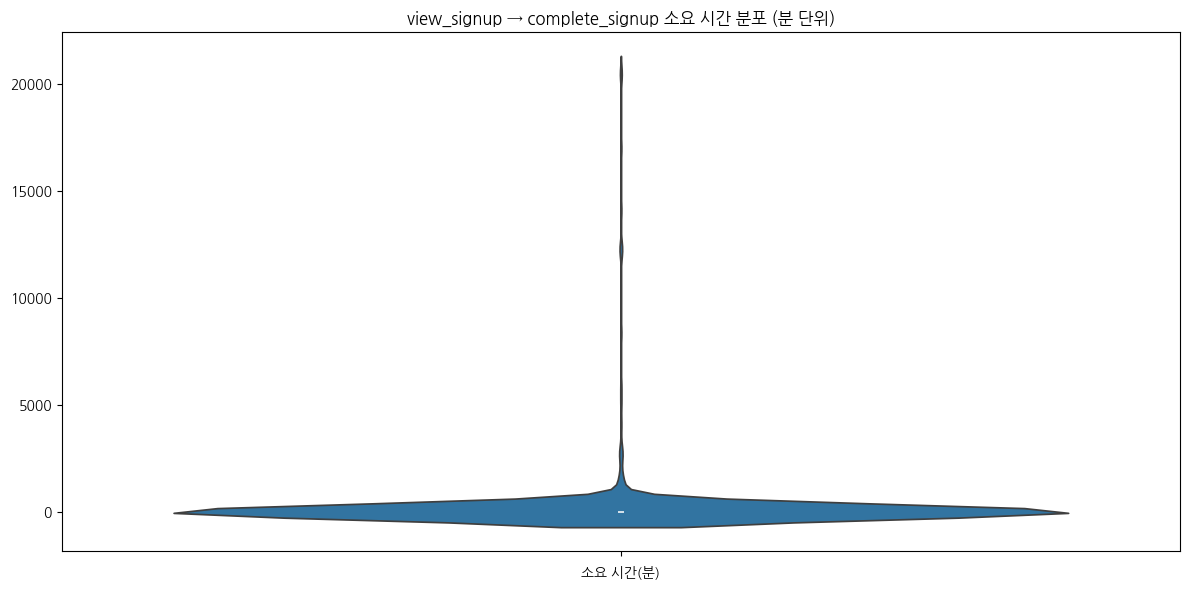

In [25]:
# Ìï¥Îãπ Í≤∞Í≥ºÎ°úÎäî view_signupÏù¥ Î™®Îëê complete_signup Ïù¥Ï†ÑÏóê ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥ÏÉÅÏù¥ ÏóÜÏùå
# session_id Î≥ÑÎ°ú view_signupÍ≥º complete_signup ÏãúÍ∞Ñ Ï∞®Ïù¥ Íµ¨ÌïòÍ∏∞

def get_launch_signup_time_diff(df):
    df_sorted = df.sort_values('event_datetime')
    launch_times = df_sorted.loc[df_sorted['event_key'] == 'view_signup', 'event_datetime']
    signup_times = df_sorted.loc[df_sorted['event_key'] == 'complete_signup', 'event_datetime']
    if launch_times.empty or signup_times.empty:
        return np.nan
    # Í∞ÄÏû• Îπ†Î•∏ view_signup, Í∞ÄÏû• Îπ†Î•∏ complete_signup
    first_launch = launch_times.iloc[0]
    first_signup = signup_times.iloc[0]
    # view_signupÏù¥ complete_signupÎ≥¥Îã§ ÏïûÏÑ† Í≤ΩÏö∞Îßå
    if first_launch < first_signup:
        return (first_signup - first_launch).total_seconds() / 60  # Î∂Ñ Îã®ÏúÑ
    else:
        return np.nan

# session_idÎ≥Ñ ÏãúÍ∞Ñ Ï∞®Ïù¥ Í≥ÑÏÇ∞
time_diffs = (
    final_hackle_df.groupby('session_id')
    .apply(get_launch_signup_time_diff)
    .dropna()
)

# ÌèâÍ∑†, Ï§ëÏïôÍ∞í
mean_diff = time_diffs.mean()
median_diff = time_diffs.median()
print(f"view_signup ‚Üí complete_signup ÌèâÍ∑† ÏÜåÏöî ÏãúÍ∞Ñ: {mean_diff:.2f}Î∂Ñ")
print(f"view_signup ‚Üí complete_signup Ï§ëÏïôÍ∞í ÏÜåÏöî ÏãúÍ∞Ñ: {median_diff:.2f}Î∂Ñ")

# Î∞îÏù¥Ïò¨Î¶∞ ÌîåÎ°Ø ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.violinplot(data=time_diffs)
plt.title('view_signup ‚Üí complete_signup ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÌè¨ (Î∂Ñ Îã®ÏúÑ)')
plt.xlabel('ÏÜåÏöî ÏãúÍ∞Ñ(Î∂Ñ)')
plt.tight_layout()
plt.show()

#### view_signup ÏóêÏÑú Í∞ÄÏû• Î®ºÏ†Ä ÎÇòÏò® Í∞í -> complete_signup ÏóêÏÑú Í∞ÄÏû• ÎÇòÏ§ëÏóê ÎÇòÏò® Í∞í
---
- view_signup ÏóêÏÑú Ï≤´Î≤àÏû¨ Í∞íÏùÄ ÌöåÏõêÍ∞ÄÏûÖÏùÑ ÏãúÎèÑÌïú Í≤ÉÏúºÎ°ú ÌôïÏù∏ Í∞ÄÎä•
- complete_signup ÎßàÏßÄÎßâ Í∞íÏùÄ ÌöåÏõêÍ∞ÄÏûÖÏù¥ ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÏôÑÎ£åÎêòÏóàÎã§Í≥† ÌåêÎã® Í∞ÄÎä•

view_signup ‚Üí complete_signup ÌèâÍ∑† ÏÜåÏöî ÏãúÍ∞Ñ: 196.39Î∂Ñ
view_signup ‚Üí complete_signup Ï§ëÏïôÍ∞í ÏÜåÏöî ÏãúÍ∞Ñ: 1.52Î∂Ñ


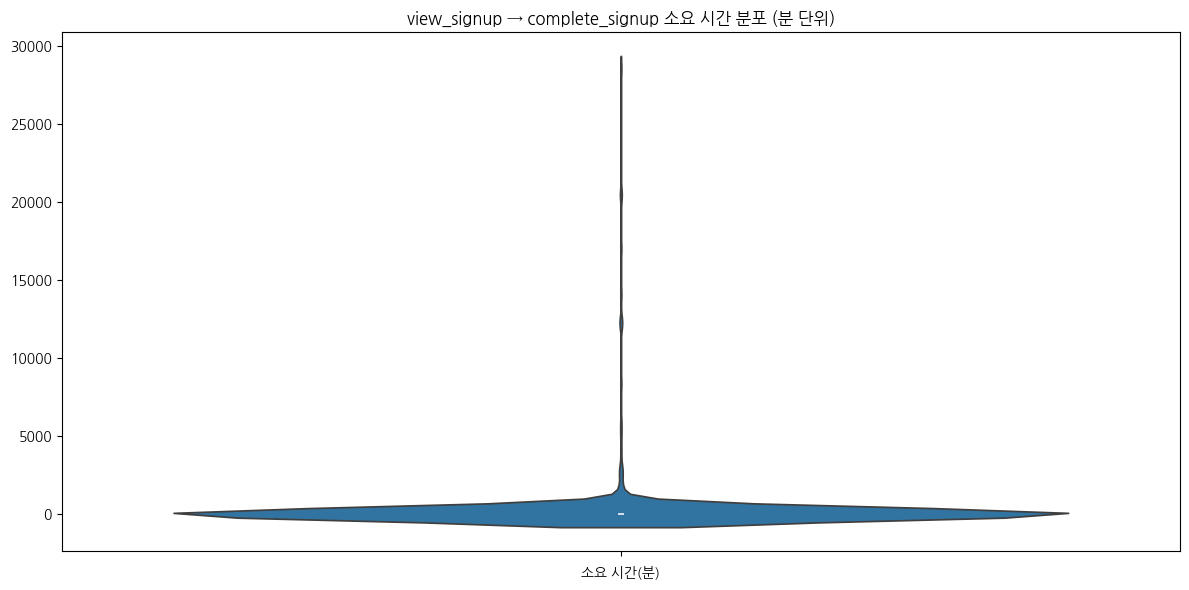

In [26]:
# Ìï¥Îãπ Í≤∞Í≥ºÎ°úÎäî view_signupÏù¥ Î™®Îëê complete_signup Ïù¥Ï†ÑÏóê ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥ÏÉÅÏù¥ ÏóÜÏùå
# session_id Î≥ÑÎ°ú view_signupÍ≥º complete_signup ÏãúÍ∞Ñ Ï∞®Ïù¥ Íµ¨ÌïòÍ∏∞
# view_signupÏóêÏÑúÎäî Í∞ÄÏû• Ï≤´Î≤àÏß∏ Í∞íÏúºÎ°ú ÌïòÍ≥† complete_signupÎäî Í∞ÄÏû• ÎßàÏßÄÎßâ Í∞íÏúºÎ°ú ÌïòÏó¨ Ï∞®Ïù¥ ÌôïÏù∏Ïù∏

def get_launch_signup_time_diff(df):
    df_sorted = df.sort_values('event_datetime')
    launch_times = df_sorted.loc[df_sorted['event_key'] == 'view_signup', 'event_datetime']
    signup_times = df_sorted.loc[df_sorted['event_key'] == 'complete_signup', 'event_datetime']
    if launch_times.empty or signup_times.empty:
        return np.nan
    # Í∞ÄÏû• Îπ†Î•∏ view_signup, Í∞ÄÏû• Îπ†Î•∏ complete_signup
    first_launch = launch_times.iloc[0]
    last_signup = signup_times.iloc[-1]
    # view_signupÏù¥ complete_signupÎ≥¥Îã§ ÏïûÏÑ† Í≤ΩÏö∞Îßå
    if first_launch < last_signup:
        return (last_signup - first_launch).total_seconds() / 60  # Î∂Ñ Îã®ÏúÑ
    else:
        return np.nan

# session_idÎ≥Ñ ÏãúÍ∞Ñ Ï∞®Ïù¥ Í≥ÑÏÇ∞
time_diffs = (
    final_hackle_df.groupby('session_id')
    .apply(get_launch_signup_time_diff)
    .dropna()
)

# ÌèâÍ∑†, Ï§ëÏïôÍ∞í
mean_diff = time_diffs.mean()
median_diff = time_diffs.median()
print(f"view_signup ‚Üí complete_signup ÌèâÍ∑† ÏÜåÏöî ÏãúÍ∞Ñ: {mean_diff:.2f}Î∂Ñ")
print(f"view_signup ‚Üí complete_signup Ï§ëÏïôÍ∞í ÏÜåÏöî ÏãúÍ∞Ñ: {median_diff:.2f}Î∂Ñ")

# Î∞îÏù¥Ïò¨Î¶∞ ÌîåÎ°Ø ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.violinplot(data=time_diffs)
plt.title('view_signup ‚Üí complete_signup ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÌè¨ (Î∂Ñ Îã®ÏúÑ)')
plt.xlabel('ÏÜåÏöî ÏãúÍ∞Ñ(Î∂Ñ)')
plt.tight_layout()
plt.show()

- ÏúÑ Í≤∞Í≥ºÎ•º Î≥¥Î©¥ view_signup -> complete_signup ÍπåÏßÄ Í±∏Î¶¨Îäî ÏãúÍ∞ÑÏùò Ï§ëÏïôÍ∞íÏùÄ 1.52Î∂ÑÏúºÎ°ú ÎåÄÎûµ 2Î∂Ñ Í≤ΩÍ≥ºÌïòÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ
- launch_app -> complete_signup ÏùÑ ÌÜµÌï¥ÏÑú Ïï±ÏùÑ Ïã§ÌñâÌïòÍ≥† ÌöåÏõêÍ∞ÄÏûÖÍπåÏßÄ ÌïòÎäîÎç∞ Í±∏Î¶¨Îäî ÏãúÍ∞ÑÏùÄ Ï§ëÏïôÍ∞íÏùÄ 2.02Î∂ÑÏúºÎ°ú ÎåÄÎûµ 2Î∂Ñ Í≤ΩÍ≥º
-> Ïù¥Î•º ÌÜµÌï¥ÏÑú Ïï±ÏùÑ Ïã§ÌñâÌïòÍ≥† ÏñºÎßà ÎêòÏßÄ ÏïäÏïÑ Î∞îÎ°ú ÌöåÏõêÍ∞ÄÏûÖÌïòÎäî Ïú†Ï†ÄÎì§Ïù¥ ÎßéÏùÑ Í≤ÉÏúºÎ°ú Ïú†Ï∂î Í∞ÄÎä•
- Í∑∏Î†áÎã§Î©¥ launch_app -> view_signupÍπåÏßÄÎäî Ï£ºÎ°ú Í≤ΩÎ°úÎäî Ïñ¥ÎñªÍ≤å ÎêòÎäîÍ±∏Íπå?
    - ÌöåÏõêÍ∞ÄÏûÖÌïòÍ∏∞ Ï†ÑÏóê Î≠îÍ∞Ä Îçî ÎëòÎü¨Î≥¥Îäî Ïú†Ï†ÄÎäî ÏóÜÎäîÍ±∏Íπå?

+ Ï∂îÍ∞ÄÎ°ú user_idÎ°ú ÏÇ¥Ìé¥Î≥º ÌïÑÏöîÍ∞Ä ÏûàÍ≤†Îã§ ÏßÄÍ∏àÍπåÏßÄ session_idÎ°ú Î¥§ÎäîÎç∞ user_idÎ°ú Î≥¥Î©¥ Îã¨ÎùºÏßàÍπå?       
- userÍ∞Ä Îëê Î≤à ÌöåÏõêÍ∞ÄÏûÖÌïòÎäî Í≤ΩÏö∞Í∞Ä Ï°¥Ïû¨ÌïòÎäîÍ∞Ä?
- session_idÎ°ú Î¥§ÏùÑÎïåÎûëÏùÄ Îã¨ÎùºÏßÄÎäîÍ∞Ä?


## user_idÎ°ú Î≥ÄÍ≤ΩÌïòÏòÄÏùÑ Îïå Í≤∞Í≥ºÍ∞Ä Îã¨ÎùºÏßÄÎäîÍ∞ÄÏóê ÎåÄÌïú ÌÉêÏÉâ
---

In [27]:
# ÎèôÏùºÌïú user_idÏóê ÎåÄÌï¥ complete_signup Ïù¥Î≤§Ìä∏Í∞Ä 2Î≤à Ïù¥ÏÉÅ Î∞úÏÉùÌïú Í≤ΩÏö∞ ÌôïÏù∏
user_signup_counts = final_hackle_df[final_hackle_df['event_key'] == 'complete_signup'].groupby('user_id').size()
multiple_signup_users = user_signup_counts[user_signup_counts > 1]

print(f"complete_signup Ïù¥Î≤§Ìä∏Í∞Ä 2Î≤à Ïù¥ÏÉÅ Î∞úÏÉùÌïú user_id Ïàò: {len(multiple_signup_users)}")
print("ÏòàÏãú user_id Î∞è Î∞úÏÉù ÌöüÏàò:")
print(multiple_signup_users.head())

complete_signup Ïù¥Î≤§Ìä∏Í∞Ä 2Î≤à Ïù¥ÏÉÅ Î∞úÏÉùÌïú user_id Ïàò: 2
ÏòàÏãú user_id Î∞è Î∞úÏÉù ÌöüÏàò:
user_id
1579289    2
1579831    2
dtype: int64


In [28]:
# Ìï¥Îãπ Ïú†Ï†ÄÎì§ ÌôïÏù∏

display(final_hackle_df[(final_hackle_df.user_id == '1579289') & (final_hackle_df.event_key == "complete_signup")])
display(final_hackle_df[(final_hackle_df.user_id == '1579831') & (final_hackle_df.event_key == "complete_signup")])

event_id      event_datetime  \
1131382  774bede5-4c42-44f7-b0a2-0ee47ffe298b 2023-07-22 21:18:13   
1734311  636e920e-8772-42fc-84e8-e338667cf9d6 2023-07-22 21:11:16   

               event_key                            session_id  friend_count  \
1131382  complete_signup  aca1b21d-cfe2-4089-9379-0faf9ab6107f           0.0   
1734311  complete_signup  a10275ea-e0f6-4bbc-b3a9-ddebfd412bc8           0.0   

         question_id  heart_balance      id  user_id  \
1131382          NaN          300.0   87102  1579289   
1734311          NaN          300.0  225751  1579289   

                                    device_id   osname osversion  
1131382  aca1b21d-cfe2-4089-9379-0faf9ab6107f  Android        10  
1734311  a10275ea-e0f6-4bbc-b3a9-ddebfd412bc8  Android        10

event_id      event_datetime  \
48087  64452779-9565-4d14-b173-c6458227f22e 2023-08-07 19:58:55   
48130  6a94e2be-7158-487f-b81f-cd04766a2a37 2023-07-19 01:06:22   

             event_key                            session_id  friend_count  \
48087  complete_signup  B941F9F9-CF53-4DAE-A204-75E666B5D277           0.0   
48130  complete_signup  B941F9F9-CF53-4DAE-A204-75E666B5D277           0.0   

       question_id  heart_balance     id  user_id  \
48087          NaN          300.0  80166  1579831   
48130          NaN          300.0  80166  1579831   

                                  device_id osname osversion  
48087  B941F9F9-CF53-4DAE-A204-75E666B5D277    iOS      16.6  
48130  B941F9F9-CF53-4DAE-A204-75E666B5D277    iOS      16.6

In [29]:
ex = final_hackle_df[final_hackle_df["user_id"] == "1579831"].sort_values(by="event_datetime")

# 'ex'Ïùò event_datetime Ïª¨ÎüºÏóêÏÑú ÎÇ†ÏßúÎ≥Ñ(event_date) Ïù¥Î≤§Ìä∏ Ïàò ÏßëÍ≥Ñ
ex['event_date'] = ex['event_datetime'].dt.date
date_event_counts = ex.groupby('event_date').size()

print(date_event_counts)

event_date
2023-07-19    188
2023-07-23    198
2023-07-24    180
2023-07-25    175
2023-07-26     98
2023-07-27     79
2023-07-29     57
2023-07-30     44
2023-07-31     15
2023-08-01     40
2023-08-02     79
2023-08-04    141
2023-08-05    256
2023-08-06     92
2023-08-07    222
2023-08-08     90
2023-08-09     43
dtype: int64


In [30]:
# Ï†úÏô∏Ìï† user_id Î¶¨Ïä§Ìä∏ (Ïòà: Îëê Î≤à ÌöåÏõêÍ∞ÄÏûÖÌïú Ïú†Ï†Ä)
exclude_user_ids = ['1579289', '1579831']

# complete_signup_dfÏóêÏÑú Ï†úÏô∏Ìï† user_idÎ•º Ï†úÏô∏
filtered_signup_df = complete_signup_df[~complete_signup_df['user_id'].isin(exclude_user_ids)]

# ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å Ïù¥Î≤§Ìä∏("complete_signup")Í∞Ä Î∞úÏÉùÌïú user_id Ï∂îÏ∂ú
signup_users = filtered_signup_df['user_id'].unique()

# Ìï¥Îãπ user_idÏóê ÏÜçÌïú Î™®Îì† Ïù¥Î≤§Ìä∏Î•º Ï∂îÏ∂ú
signup_users_events = final_hackle_df[final_hackle_df['user_id'].isin(signup_users)].copy()

# Í∞Å userÎ≥ÑÎ°ú event_keyÏùò ÏàúÏÑúÎ•º ÌôïÏù∏
signup_users_events_sorted = signup_users_events.sort_values(['user_id', 'event_datetime'])

# ÏòàÏãú: Ìïú userÏùò event_key ÏãúÌÄÄÏä§ ÌôïÏù∏
example_user_id = signup_users_events_sorted['user_id'].iloc[0]
example_user_events = signup_users_events_sorted[signup_users_events_sorted['user_id'] == example_user_id]['event_key'].tolist()
print(f"Example user ({example_user_id}) event sequence:")
print(example_user_events)

# Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÌöåÏõêÍ∞ÄÏûÖ Ï†Ñ event_key ÏãúÌÄÄÏä§ ÏßëÍ≥Ñ (ÏÉÅÏúÑ 10Í∞ú Ìå®ÌÑ¥)
# userÎ≥Ñ event_key ÏãúÌÄÄÏä§ Ï∂îÏ∂ú
user_event_sequences = (
    signup_users_events_sorted.groupby('user_id')['event_key']
    .apply(list)
    .reset_index(name='event_sequence')
)

# ÏãúÌÄÄÏä§Î≥ÑÎ°ú count ÏßëÍ≥Ñ
sequence_counts = user_event_sequences['event_sequence'].value_counts().head(10)
print("\nTop 10 signup funnel event sequences (by user):")
for seq, count in sequence_counts.items():
    print(f"{seq} : {count}Ìöå")

Example user (1006061) event sequence:
['launch_app', '$session_start', 'launch_app', 'click_bottom_navigation_questions', 'view_lab_tap', 'click_bottom_navigation_profile', 'view_lab_tap', 'click_bottom_navigation_questions', 'click_attendance', 'launch_app', 'click_question_ask', 'click_bottom_navigation_timeline', 'click_bottom_navigation_lab', 'view_lab_tap', 'view_lab_tap', 'view_lab_tap', 'view_lab_tap', 'click_bottom_navigation_profile', 'click_bottom_navigation_questions', 'view_lab_tap', 'click_bottom_navigation_lab', 'view_lab_tap', 'click_bottom_navigation_profile', '$session_end', 'launch_app', '$session_start', 'click_appbar_alarm_center', '$session_end', 'launch_app', '$session_start', 'click_question_share', 'click_question_open', 'click_question_share', 'click_attendance', 'click_question_start', 'skip_question', 'skip_question', 'skip_question', 'complete_question', 'click_bottom_navigation_lab', 'view_lab_tap', 'click_bottom_navigation_profile', 'view_lab_tap', 'click

/tmp/ipykernel_203008/1795809564.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sequence_labels, x=sequence_values, palette='Blues_d')


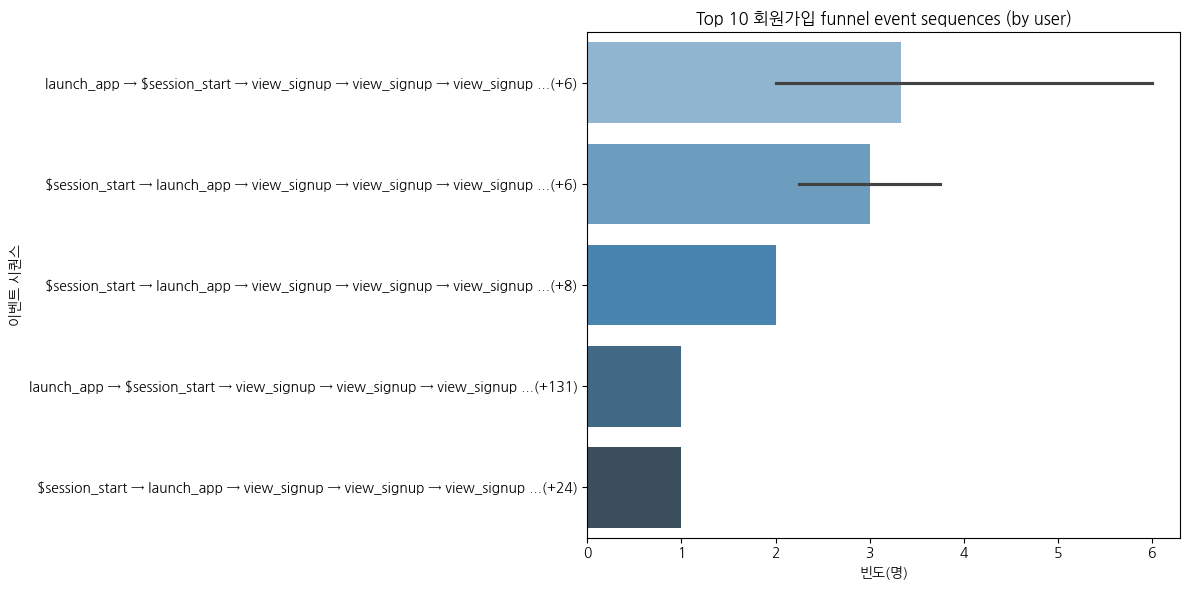

In [31]:
# Top 10 ÌöåÏõêÍ∞ÄÏûÖ funnel event sequence ÏãúÍ∞ÅÌôî

import matplotlib.pyplot as plt

# ÏãúÌÄÄÏä§Î•º Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò (Í∞ÄÎèÖÏÑ± ÏúÑÌï¥ 5Í∞úÍπåÏßÄÎßå ÌëúÏãú)
def sequence_to_str(seq, max_len=5):
    if len(seq) > max_len:
        return ' ‚Üí '.join(seq[:max_len]) + f' ...(+{len(seq)-max_len})'
    return ' ‚Üí '.join(seq)

sequence_labels = [sequence_to_str(seq) for seq in sequence_counts.index]
sequence_values = sequence_counts.values

plt.figure(figsize=(12, 6))
sns.barplot(y=sequence_labels, x=sequence_values, palette='Blues_d')
plt.title('Top 10 ÌöåÏõêÍ∞ÄÏûÖ funnel event sequences (by user)')
plt.xlabel('ÎπàÎèÑ(Î™Ö)')
plt.ylabel('Ïù¥Î≤§Ìä∏ ÏãúÌÄÄÏä§')
plt.tight_layout()
plt.show()

/tmp/ipykernel_203008/845283471.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sequence_labels, x=sequence_values, palette=bar_colors)
/tmp/ipykernel_203008/845283471.py:18: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(y=sequence_labels, x=sequence_values, palette=bar_colors)


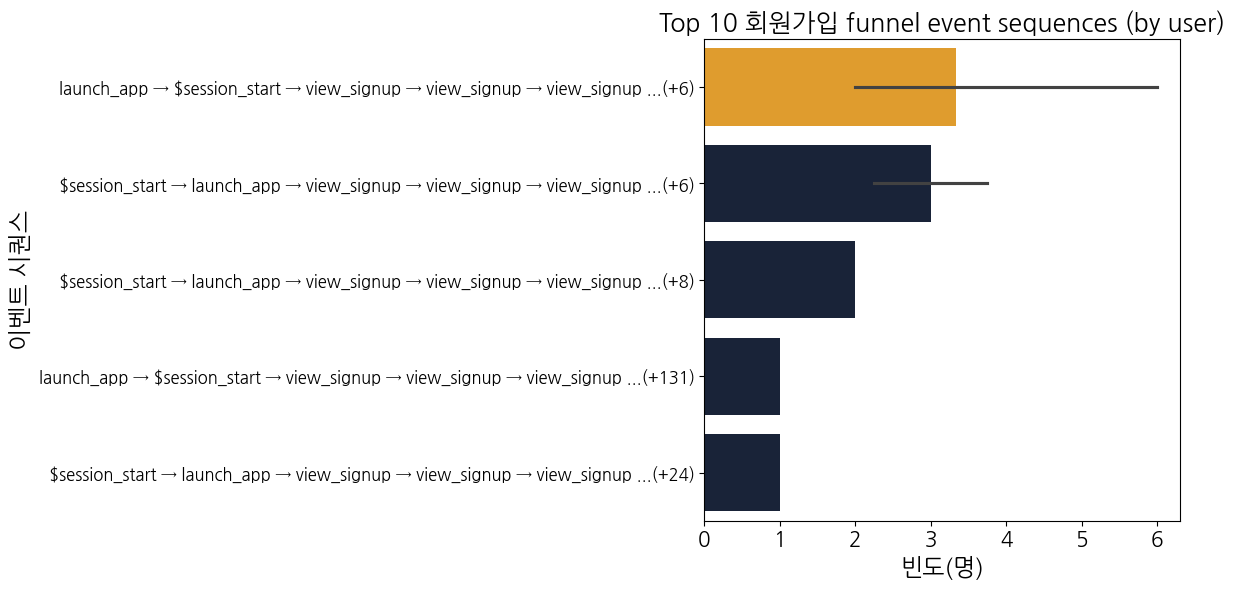

In [32]:
# Top 10 ÌöåÏõêÍ∞ÄÏûÖ funnel event sequence ÏãúÍ∞ÅÌôî (ÎîîÏûêÏù∏/Ìè∞Ìä∏/Ïª¨Îü¨ Í∑úÍ≤© Ï†ÅÏö©)

# ÏãúÌÄÄÏä§Î•º Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò (Í∞ÄÎèÖÏÑ± ÏúÑÌï¥ 5Í∞úÍπåÏßÄÎßå ÌëúÏãú)
def sequence_to_str(seq, max_len=5):
    if len(seq) > max_len:
        return ' ‚Üí '.join(seq[:max_len]) + f' ...(+{len(seq)-max_len})'
    return ' ‚Üí '.join(seq)

sequence_labels = [sequence_to_str(seq) for seq in sequence_counts.index]
sequence_values = sequence_counts.values

# Ïª¨Îü¨ ÌÖúÌîåÎ¶ø: Í∏∞Î≥∏ '#14213d', Í∞ïÏ°∞ '#fca311'
bar_colors = ['#14213d'] * len(sequence_labels)
if len(bar_colors) > 0:
    bar_colors[0] = '#fca311'  # ÏµúÏÉÅÏúÑ 1Í∞ú Í∞ïÏ°∞

plt.figure(figsize=(12, 6))
sns.barplot(y=sequence_labels, x=sequence_values, palette=bar_colors)
plt.title('Top 10 ÌöåÏõêÍ∞ÄÏûÖ funnel event sequences (by user)', fontsize=18)
plt.xlabel('ÎπàÎèÑ(Î™Ö)', fontsize=17)
plt.ylabel('Ïù¥Î≤§Ìä∏ ÏãúÌÄÄÏä§', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [33]:
# complete_signup Î∞îÎ°ú ÏßÅÏ†Ñ event_keyÎ•º Ï∞æÍ∏∞ ÏúÑÌïú ÏΩîÎìú

# user_idÏôÄ event_datetime Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨Îêú Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©
# Í∞Å sessionÎ≥ÑÎ°ú complete_signup Ïù¥Î≤§Ìä∏Ïùò ÏßÅÏ†Ñ event_key Ï∂îÏ∂ú

def get_prev_event_key(df):
    # df: Ìïú sessionÏùò Ïù¥Î≤§Ìä∏ ÏãúÌÄÄÏä§ (Ïù¥ÎØ∏ ÏãúÍ∞ÑÏàú Ï†ïÎ†¨Îê®)
    idx = df[df['event_key'] == 'complete_signup'].index
    prev_keys = []
    for i in idx:
        prev_idx = df.index.get_loc(i) - 1
        if prev_idx >= 0:
            prev_keys.append(df.iloc[prev_idx]['event_key'])
    return prev_keys

# user_id Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôîÌïòÏó¨ ÏßÅÏ†Ñ event_key Ï∂îÏ∂ú
prev_event_keys = signup_users_events_sorted.groupby('user_id').apply(get_prev_event_key)
# Î¶¨Ïä§Ìä∏Î°ú ÌéºÏπòÍ∏∞
prev_event_keys_flat = [item for sublist in prev_event_keys if sublist for item in sublist]

# Í≤∞Í≥º ÏßëÍ≥Ñ
prev_event_key_counts = Counter(prev_event_keys_flat)

# ÏÉÅÏúÑ 10Í∞ú Ï∂úÎ†•
print("complete_signup Î∞îÎ°ú ÏßÅÏ†Ñ event_key Top 10:")
for key, count in prev_event_key_counts.most_common(10):
    print(f"{key}: {count}Ìöå")

complete_signup Î∞îÎ°ú ÏßÅÏ†Ñ event_key Top 10:
$session_start: 531Ìöå
$session_end: 307Ìöå
view_signup: 132Ìöå


In [34]:
# Ï†úÏô∏Ìï† user_id Î¶¨Ïä§Ìä∏ (Ïòà: Îëê Î≤à ÌöåÏõêÍ∞ÄÏûÖÌïú Ïú†Ï†Ä)
exclude_user_ids = ['1579289', '1579831']

# "complete_signup" Ïù¥Î≤§Ìä∏Í∞Ä ÏûàÎäî user_id Ï∂îÏ∂ú (Ï†úÏô∏ ÎåÄÏÉÅ Ï†úÏô∏)
signup_user_ids = final_hackle_df.loc[
    (final_hackle_df['event_key'] == 'complete_signup') &
    (~final_hackle_df['user_id'].isin(exclude_user_ids)),
    'user_id'
].unique()

# Ìï¥Îãπ user_idÏùò Î™®Îì† Ïù¥Î≤§Ìä∏ Ï∂îÏ∂ú
signup_users_all_events = final_hackle_df[final_hackle_df['user_id'].isin(signup_user_ids)]

# Í∞Å user_idÎ≥ÑÎ°ú "launch_app" Ïù¥Î≤§Ìä∏Í∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
has_launch_app = signup_users_all_events.groupby('user_id')['event_key'].apply(lambda x: 'launch_app' in x.values)

# "complete_signup"Ïù¥ ÏûàÎäî user_id Ï§ë "launch_app"Ïù¥ ÏóÜÎäî user_id Í∞úÏàò
num_users_without_launch_app = (~has_launch_app).sum()
print(f'"complete_signup" user Ï§ë "launch_app"Ïù¥ ÏóÜÎäî user Ïàò: {num_users_without_launch_app}')

# "complete_signup" Ïù¥Î≤§Ìä∏Í∞Ä Î∞úÏÉùÌïú ÏãúÏ†ê Ïù¥Ï†ÑÏóê "launch_app"Ïù¥ ÏûàÏóàÎäîÏßÄ ÌôïÏù∏
def launch_app_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'complete_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup Ïù¥Ï†ÑÏóê launch_appÏù¥ ÏûàÎäîÏßÄ
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'launch_app').any()

launch_app_before = signup_users_all_events.groupby('user_id').apply(launch_app_before_signup)
num_users_without_launch_app_before = (~launch_app_before).sum()
print(f'"complete_signup" user Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "launch_app"Ïù¥ ÏóÜÎäî user Ïàò: {num_users_without_launch_app_before}')
num_users_with_launch_app_before = (launch_app_before).sum()
print(f'"complete_signup" user Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "launch_app"Ïù¥ ÏûàÎäî user Ïàò: {num_users_with_launch_app_before}')

"complete_signup" user Ï§ë "launch_app"Ïù¥ ÏóÜÎäî user Ïàò: 0
"complete_signup" user Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "launch_app"Ïù¥ ÏóÜÎäî user Ïàò: 2
"complete_signup" user Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "launch_app"Ïù¥ ÏûàÎäî user Ïàò: 968


In [35]:
# complete_signup Ïù¥Ï†ÑÏóê launch_appÏù¥ ÏóÜÎäî user_id Ï∂îÏ∂ú
users_without_launch_app_before = launch_app_before[~launch_app_before].index.tolist()

print(f"complete_signup Ïù¥Ï†ÑÏóê launch_appÏù¥ ÏóÜÎäî user_id Ïàò: {len(users_without_launch_app_before)}")
print("ÏòàÏãú user_id 5Í∞ú:", users_without_launch_app_before[:5])

# Ìï¥Îãπ userÏùò Ïù¥Î≤§Ìä∏ ÏãúÌÄÄÏä§ ÏòàÏãú Ï∂úÎ†•
for user_id in users_without_launch_app_before[:3]:
    events = signup_users_all_events[signup_users_all_events['user_id'] == user_id].sort_values('event_datetime')
    print(f"\nuser ID: {user_id}")
    print(events[['event_datetime', 'event_key']])

complete_signup Ïù¥Ï†ÑÏóê launch_appÏù¥ ÏóÜÎäî user_id Ïàò: 2
ÏòàÏãú user_id 5Í∞ú: ['1579154', '1579742']

user ID: 1579154
            event_datetime                  event_key
764190 2023-07-20 20:48:01             $session_start
764236 2023-07-20 20:48:37                view_signup
764200 2023-07-20 20:48:43                view_signup
764227 2023-07-20 20:48:46                view_signup
764221 2023-07-20 20:48:49                view_signup
...                    ...                        ...
764194 2023-07-22 11:32:45  click_appbar_alarm_center
764252 2023-07-22 11:32:47    click_appbar_chat_rooms
764198 2023-07-22 11:32:50               $session_end
764185 2023-07-22 11:32:50       click_appbar_setting
764205 2023-07-22 11:33:08             $session_start

[82 rows x 2 columns]

user ID: 1579742
             event_datetime                        event_key
4430933 2023-08-05 16:30:11                   $session_start
4430983 2023-08-05 16:30:47                      view_signup
4430

launch_app ‚Üí complete_signup ÌèâÍ∑† ÏÜåÏöî ÏãúÍ∞Ñ: 669.63Î∂Ñ
launch_app ‚Üí complete_signup Ï§ëÏïôÍ∞í ÏÜåÏöî ÏãúÍ∞Ñ: 2.01Î∂Ñ


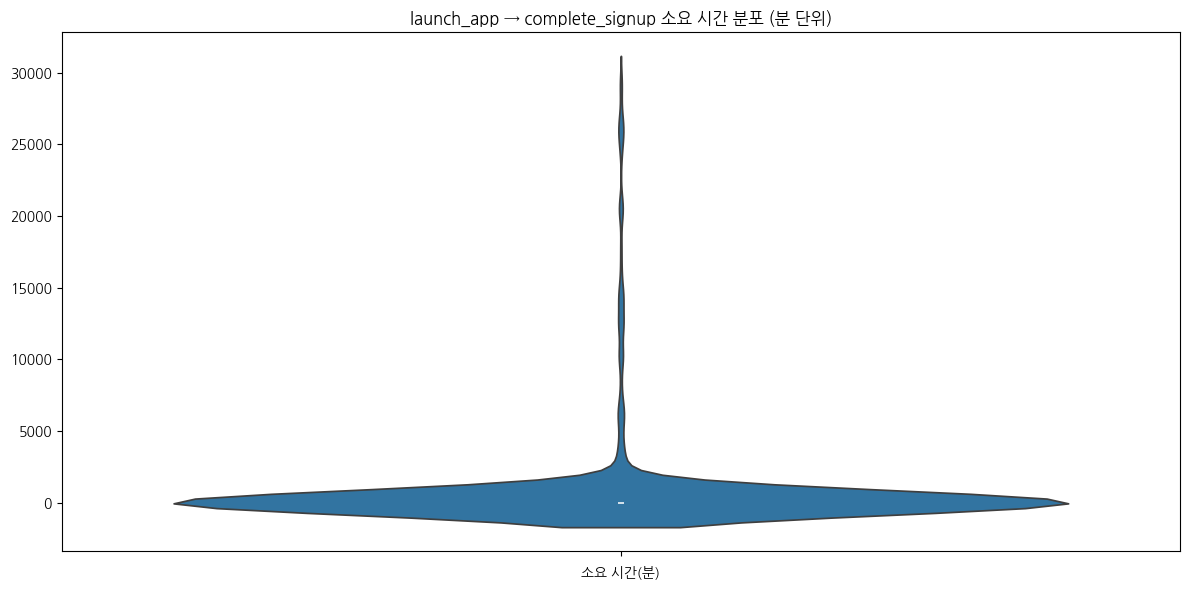

In [36]:
# Ï†úÏô∏Ìï† user_id Î¶¨Ïä§Ìä∏ (Îëê Î≤à ÌöåÏõêÍ∞ÄÏûÖÌïú Ïú†Ï†Ä + launch_app ÏóÜÎäî Ïú†Ï†Ä)
exclude_user_ids = ['1579289', '1579831'] + users_without_launch_app_before

# Ï†úÏô∏ ÎåÄÏÉÅÏù¥ ÏïÑÎãå user_idÎßå Ï∂îÏ∂ú
filtered_signup_users = [uid for uid in signup_users if uid not in exclude_user_ids]

# Ìï¥Îãπ user_idÏùò Î™®Îì† Ïù¥Î≤§Ìä∏ Ï∂îÏ∂ú
filtered_signup_users_events = signup_users_all_events[signup_users_all_events['user_id'].isin(filtered_signup_users)].copy()

# user_idÎ≥ÑÎ°ú launch_appÍ≥º complete_signupÏùò ÏãúÍ∞Ñ Ï∞®Ïù¥ Í≥ÑÏÇ∞ (launch_appÏù¥ complete_signupÎ≥¥Îã§ ÏïûÏÑ† Í≤ΩÏö∞Îßå)
def get_launch_signup_time_diff(df):
    df_sorted = df.sort_values('event_datetime')
    launch_times = df_sorted.loc[df_sorted['event_key'] == 'launch_app', 'event_datetime']
    signup_times = df_sorted.loc[df_sorted['event_key'] == 'complete_signup', 'event_datetime']
    if launch_times.empty or signup_times.empty:
        return np.nan
    first_launch = launch_times.iloc[0]
    first_signup = signup_times.iloc[0]
    if first_launch < first_signup:
        return (first_signup - first_launch).total_seconds() / 60  # Î∂Ñ Îã®ÏúÑ
    else:
        return np.nan

time_diffs = (
    filtered_signup_users_events.groupby('user_id')
    .apply(get_launch_signup_time_diff)
    .dropna()
)

mean_diff = time_diffs.mean()
median_diff = time_diffs.median()
print(f"launch_app ‚Üí complete_signup ÌèâÍ∑† ÏÜåÏöî ÏãúÍ∞Ñ: {mean_diff:.2f}Î∂Ñ")
print(f"launch_app ‚Üí complete_signup Ï§ëÏïôÍ∞í ÏÜåÏöî ÏãúÍ∞Ñ: {median_diff:.2f}Î∂Ñ")

plt.figure(figsize=(12, 6))
sns.violinplot(data=time_diffs)
plt.title('launch_app ‚Üí complete_signup ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÌè¨ (Î∂Ñ Îã®ÏúÑ)')
plt.xlabel('ÏÜåÏöî ÏãúÍ∞Ñ(Î∂Ñ)')
plt.tight_layout()
plt.show()

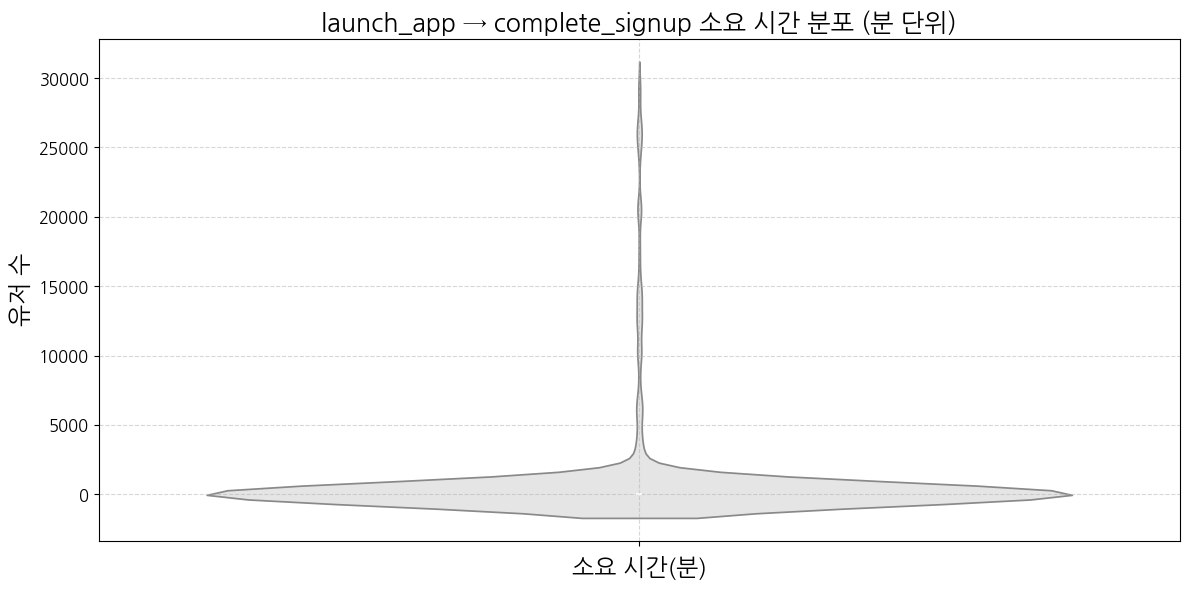

In [37]:
# launch_app ‚Üí complete_signup ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÌè¨ (ÎîîÏûêÏù∏/Ìè∞Ìä∏/Ïª¨Îü¨ Í∑úÍ≤© Ï†ÅÏö©)

plt.figure(figsize=(12, 6))
sns.violinplot(data=time_diffs, color='#e5e5e5')
plt.title('launch_app ‚Üí complete_signup ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÌè¨ (Î∂Ñ Îã®ÏúÑ)', fontsize=18)
plt.xlabel('ÏÜåÏöî ÏãúÍ∞Ñ(Î∂Ñ)', fontsize=17)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

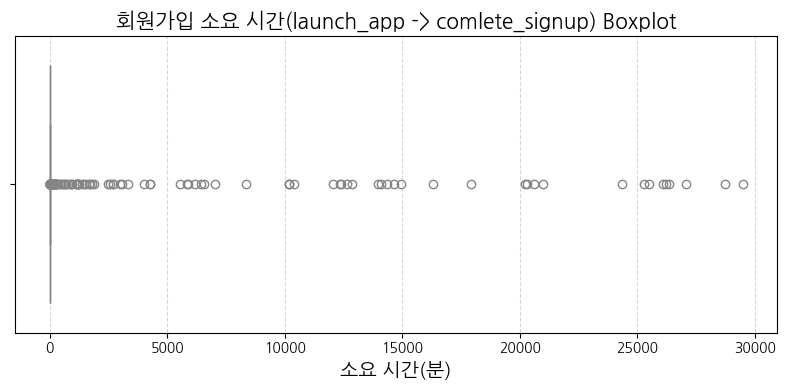

In [38]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=time_diffs, color="#ddd")
plt.xlabel("ÏÜåÏöî ÏãúÍ∞Ñ(Î∂Ñ)", fontsize=14)
plt.title("ÌöåÏõêÍ∞ÄÏûÖ ÏÜåÏöî ÏãúÍ∞Ñ(launch_app -> comlete_signup) Boxplot", fontsize=15)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


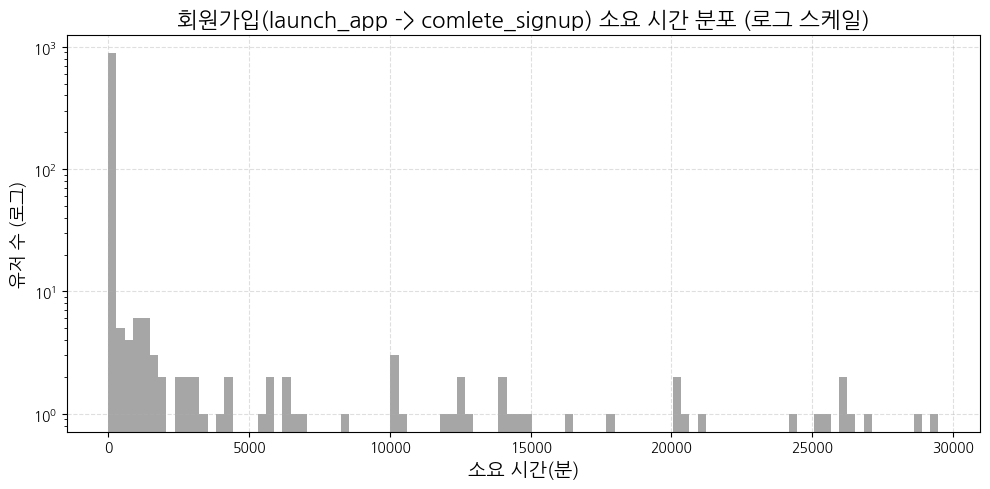

In [39]:
plt.figure(figsize=(10, 5))
plt.hist(time_diffs, bins=100, color='gray', alpha=0.7)
plt.yscale('log')  # Í∏¥ Íº¨Î¶¨Î•º Í∞êÏïàÌï¥ Î°úÍ∑∏ Ïä§ÏºÄÏùº ÏÇ¨Ïö©
plt.xlabel("ÏÜåÏöî ÏãúÍ∞Ñ(Î∂Ñ)", fontsize=14)
plt.ylabel("Ïú†Ï†Ä Ïàò (Î°úÍ∑∏)", fontsize=13)
plt.title("ÌöåÏõêÍ∞ÄÏûÖ(launch_app -> comlete_signup) ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÌè¨ (Î°úÍ∑∏ Ïä§ÏºÄÏùº)", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


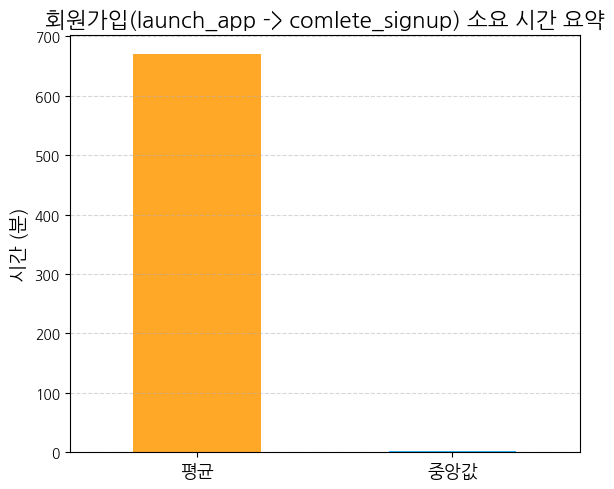

In [40]:
plt.figure(figsize=(6, 5))
metrics = pd.Series({
    'ÌèâÍ∑†': time_diffs.mean(),
    'Ï§ëÏïôÍ∞í': time_diffs.median()
})
metrics.plot(kind='bar', color=['#ffa726', '#29b6f6'])

plt.title("ÌöåÏõêÍ∞ÄÏûÖ(launch_app -> comlete_signup) ÏÜåÏöî ÏãúÍ∞Ñ ÏöîÏïΩ", fontsize=16)
plt.ylabel("ÏãúÍ∞Ñ (Î∂Ñ)", fontsize=14)
plt.xticks(rotation=0, fontsize=13)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [41]:
# Ï†úÏô∏Ìï† user_id Î¶¨Ïä§Ìä∏ (Ïòà: Îëê Î≤à ÌöåÏõêÍ∞ÄÏûÖÌïú Ïú†Ï†Ä)
exclude_user_ids = ['1579289', '1579831']

# "complete_signup" Ïù¥Î≤§Ìä∏Í∞Ä ÏûàÎäî user_id Ï∂îÏ∂ú (Ï†úÏô∏ ÎåÄÏÉÅ Ï†úÏô∏)
signup_user_ids = final_hackle_df.loc[
    (final_hackle_df['event_key'] == 'complete_signup') &
    (~final_hackle_df['user_id'].isin(exclude_user_ids)),
    'user_id'
].unique()

# Ìï¥Îãπ user_idÏùò Î™®Îì† Ïù¥Î≤§Ìä∏ Ï∂îÏ∂ú
signup_users_all_events = final_hackle_df[final_hackle_df['user_id'].isin(signup_user_ids)]

# Í∞Å user_idÎ≥ÑÎ°ú "view_signup" Ïù¥Î≤§Ìä∏Í∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
has_view_signup = signup_users_all_events.groupby('user_id')['event_key'].apply(lambda x: 'view_signup' in x.values)

# "complete_signup"Ïù¥ ÏûàÎäî user_id Ï§ë "view_signup"Ïù¥ ÏóÜÎäî user_id Í∞úÏàò
num_users_without_view_signup = (~has_view_signup).sum()
print(f'"complete_signup" user Ï§ë "view_signup"Ïù¥ ÏóÜÎäî user Ïàò: {num_users_without_view_signup}')

# "complete_signup" Ïù¥Î≤§Ìä∏Í∞Ä Î∞úÏÉùÌïú ÏãúÏ†ê Ïù¥Ï†ÑÏóê "view_signup"Ïù¥ ÏûàÏóàÎäîÏßÄ ÌôïÏù∏
def view_signup_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'complete_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup Ïù¥Ï†ÑÏóê view_signupÏù¥ ÏûàÎäîÏßÄ
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'view_signup').any()

view_signup_before = signup_users_all_events.groupby('user_id').apply(view_signup_before_signup)
num_users_without_view_signup_before = (~view_signup_before).sum()
print(f'"complete_signup" user Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "view_signup"Ïù¥ ÏóÜÎäî user Ïàò: {num_users_without_view_signup_before}')
num_users_with_view_signup_before = (view_signup_before).sum()
print(f'"complete_signup" user Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "view_signup"Ïù¥ ÏûàÎäî user Ïàò: {num_users_with_view_signup_before}')

"complete_signup" user Ï§ë "view_signup"Ïù¥ ÏóÜÎäî user Ïàò: 0
"complete_signup" user Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "view_signup"Ïù¥ ÏóÜÎäî user Ïàò: 0
"complete_signup" user Ï§ë "complete_signup" Ïù¥Ï†ÑÏóê "view_signup"Ïù¥ ÏûàÎäî user Ïàò: 970


view_signup ‚Üí complete_signup (2Ìöå Í∞ÄÏûÖ Ïú†Ï†Ä Ï†úÏô∏) ÌèâÍ∑† ÏÜåÏöî ÏãúÍ∞Ñ: 170.91Î∂Ñ
view_signup ‚Üí complete_signup (2Ìöå Í∞ÄÏûÖ Ïú†Ï†Ä Ï†úÏô∏) Ï§ëÏïôÍ∞í ÏÜåÏöî ÏãúÍ∞Ñ: 1.51Î∂Ñ


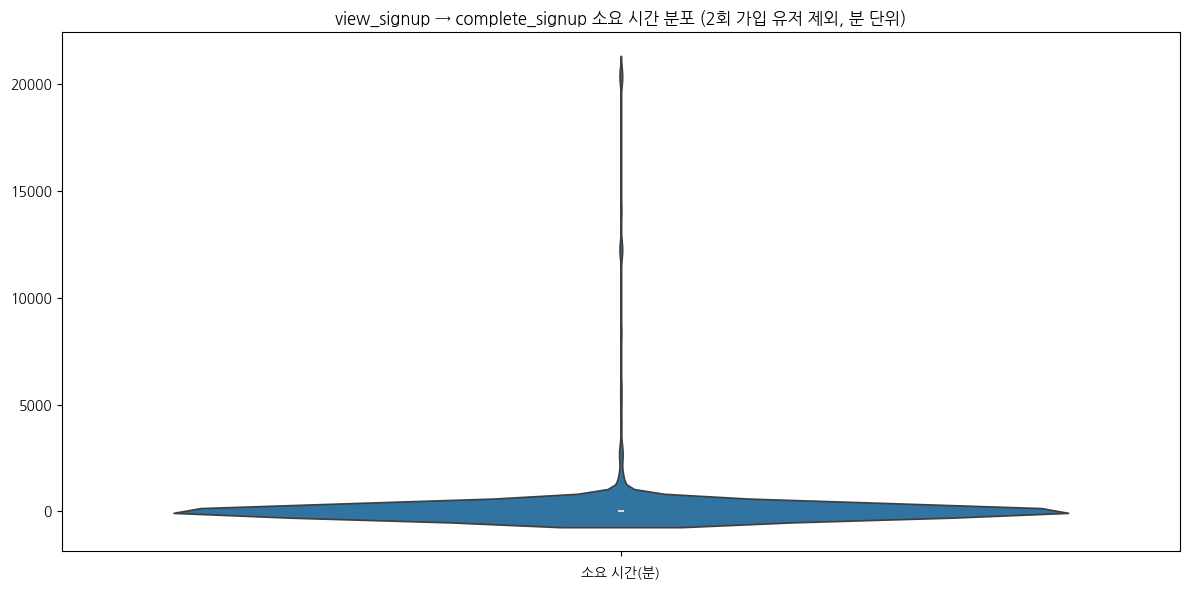

In [42]:
# 2Î≤à ÌöåÏõêÍ∞ÄÏûÖÌïú Ïú†Ï†Ä Ï†úÏô∏ (user_id: '1579289', '1579831')
exclude_user_ids = ['1579289', '1579831']

# Ï†úÏô∏ ÎåÄÏÉÅÏù¥ ÏïÑÎãå user_idÎßå Ï∂îÏ∂ú
filtered_user_ids = [uid for uid in signup_user_ids if uid not in exclude_user_ids]

# Ìï¥Îãπ user_idÏùò Î™®Îì† Ïù¥Î≤§Ìä∏ Ï∂îÏ∂ú
filtered_events = signup_users_all_events[signup_users_all_events['user_id'].isin(filtered_user_ids)].copy()

# user_idÎ≥ÑÎ°ú view_signupÍ≥º complete_signup ÏãúÍ∞Ñ Ï∞®Ïù¥ Í≥ÑÏÇ∞
def get_view_signup_to_complete_signup_time(df):
    df_sorted = df.sort_values('event_datetime')
    view_signup_times = df_sorted.loc[df_sorted['event_key'] == 'view_signup', 'event_datetime']
    complete_signup_times = df_sorted.loc[df_sorted['event_key'] == 'complete_signup', 'event_datetime']
    if view_signup_times.empty or complete_signup_times.empty:
        return np.nan
    first_view_signup = view_signup_times.iloc[0]
    first_complete_signup = complete_signup_times.iloc[0]
    if first_view_signup < first_complete_signup:
        return (first_complete_signup - first_view_signup).total_seconds() / 60  # Î∂Ñ Îã®ÏúÑ
    else:
        return np.nan

filtered_time_diffs = (
    filtered_events.groupby('user_id')
    .apply(get_view_signup_to_complete_signup_time)
    .dropna()
)

mean_diff_2 = filtered_time_diffs.mean()
median_diff_2 = filtered_time_diffs.median()
print(f"view_signup ‚Üí complete_signup (2Ìöå Í∞ÄÏûÖ Ïú†Ï†Ä Ï†úÏô∏) ÌèâÍ∑† ÏÜåÏöî ÏãúÍ∞Ñ: {mean_diff_2:.2f}Î∂Ñ")
print(f"view_signup ‚Üí complete_signup (2Ìöå Í∞ÄÏûÖ Ïú†Ï†Ä Ï†úÏô∏) Ï§ëÏïôÍ∞í ÏÜåÏöî ÏãúÍ∞Ñ: {median_diff_2:.2f}Î∂Ñ")

plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_time_diffs)
plt.title('view_signup ‚Üí complete_signup ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÌè¨ (2Ìöå Í∞ÄÏûÖ Ïú†Ï†Ä Ï†úÏô∏, Î∂Ñ Îã®ÏúÑ)')
plt.xlabel('ÏÜåÏöî ÏãúÍ∞Ñ(Î∂Ñ)')
plt.tight_layout()
plt.show()

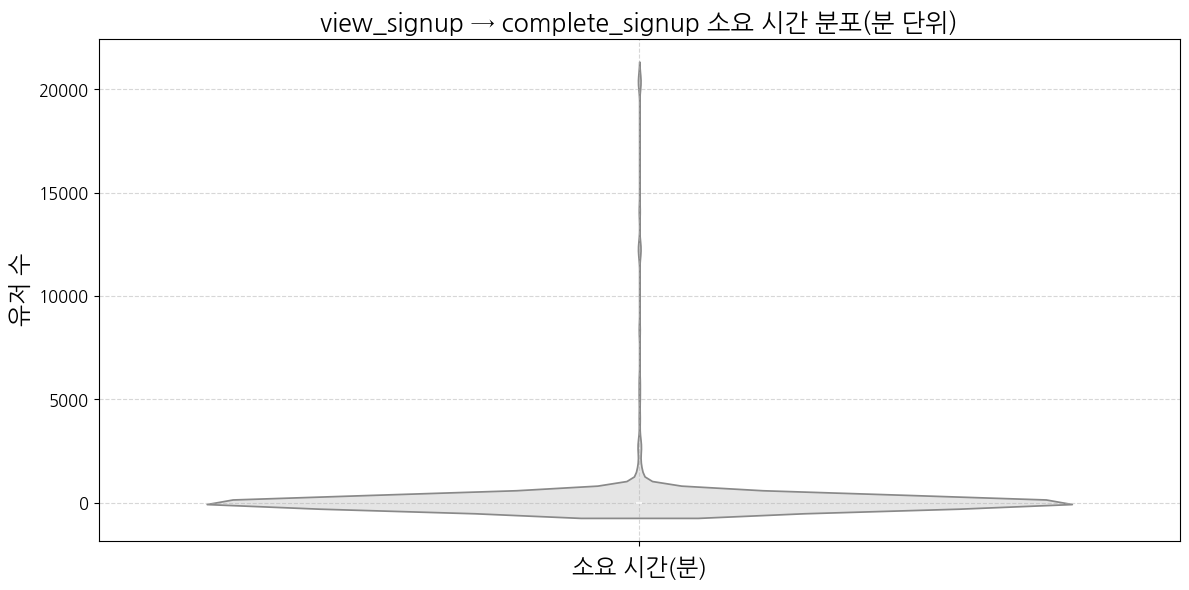

In [43]:
# view_signup ‚Üí complete_signup ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÌè¨ (ÎîîÏûêÏù∏/Ìè∞Ìä∏/Ïª¨Îü¨ Í∑úÍ≤© Ï†ÅÏö©)

plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_time_diffs, color='#e5e5e5')
plt.title('view_signup ‚Üí complete_signup ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÌè¨(Î∂Ñ Îã®ÏúÑ)', fontsize=18)
plt.xlabel('ÏÜåÏöî ÏãúÍ∞Ñ(Î∂Ñ)', fontsize=17)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

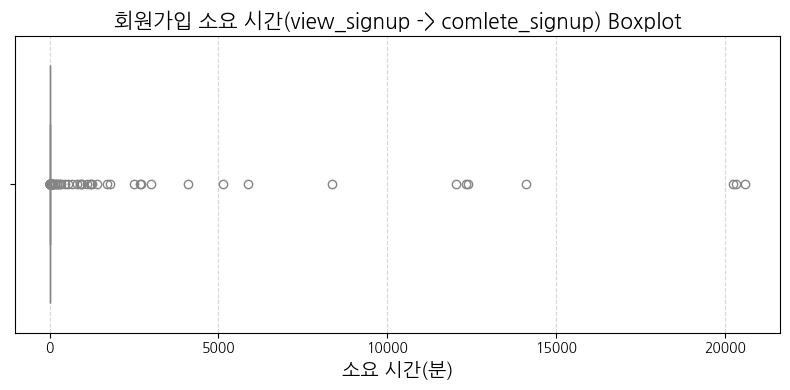

In [44]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=filtered_time_diffs, color="#ddd")
plt.xlabel("ÏÜåÏöî ÏãúÍ∞Ñ(Î∂Ñ)", fontsize=14)
plt.title("ÌöåÏõêÍ∞ÄÏûÖ ÏÜåÏöî ÏãúÍ∞Ñ(view_signup -> comlete_signup) Boxplot", fontsize=15)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


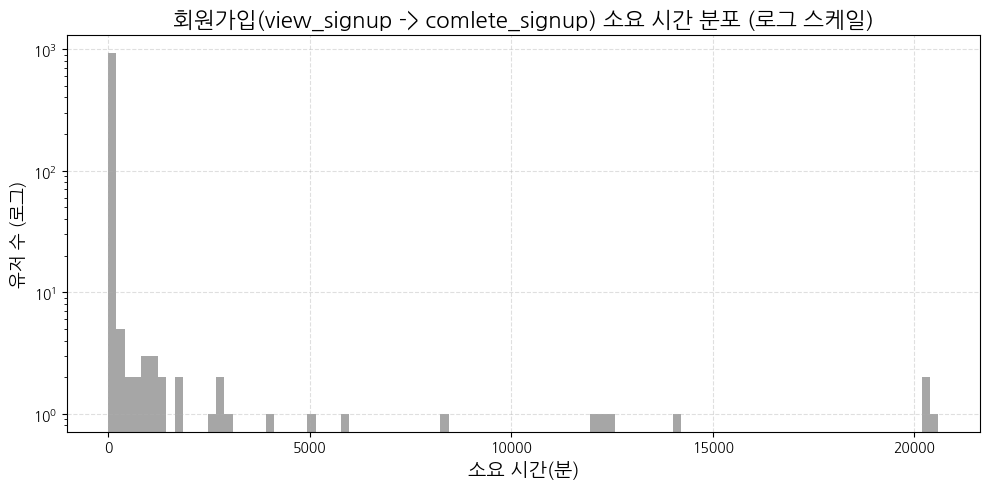

In [45]:
plt.figure(figsize=(10, 5))
plt.hist(filtered_time_diffs, bins=100, color='gray', alpha=0.7)
plt.yscale('log')  # Í∏¥ Íº¨Î¶¨Î•º Í∞êÏïàÌï¥ Î°úÍ∑∏ Ïä§ÏºÄÏùº ÏÇ¨Ïö©
plt.xlabel("ÏÜåÏöî ÏãúÍ∞Ñ(Î∂Ñ)", fontsize=14)
plt.ylabel("Ïú†Ï†Ä Ïàò (Î°úÍ∑∏)", fontsize=13)
plt.title("ÌöåÏõêÍ∞ÄÏûÖ(view_signup -> comlete_signup) ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÌè¨ (Î°úÍ∑∏ Ïä§ÏºÄÏùº)", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


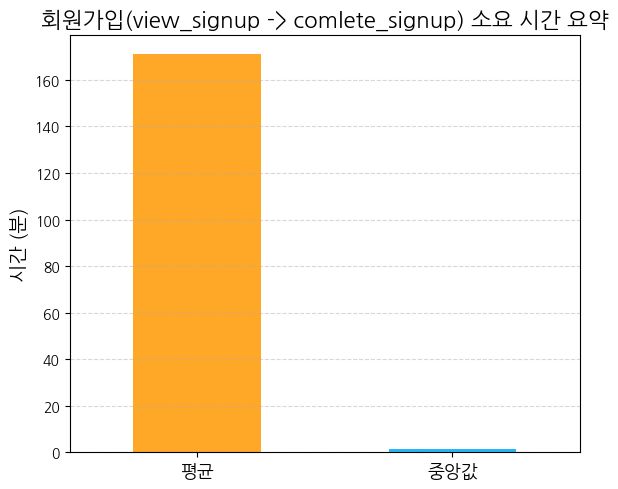

In [46]:
plt.figure(figsize=(6, 5))
metrics = pd.Series({
    'ÌèâÍ∑†': filtered_time_diffs.mean(),
    'Ï§ëÏïôÍ∞í': filtered_time_diffs.median()
})
metrics.plot(kind='bar', color=['#ffa726', '#29b6f6'])

plt.title("ÌöåÏõêÍ∞ÄÏûÖ(view_signup -> comlete_signup) ÏÜåÏöî ÏãúÍ∞Ñ ÏöîÏïΩ", fontsize=16)
plt.ylabel("ÏãúÍ∞Ñ (Î∂Ñ)", fontsize=14)
plt.xticks(rotation=0, fontsize=13)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

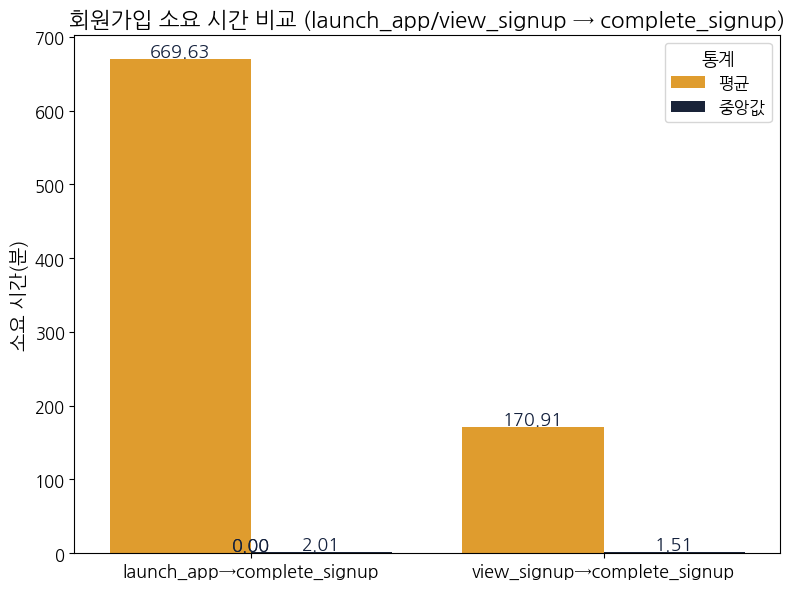

In [47]:
# ÌèâÍ∑†/Ï§ëÏïôÍ∞í Í≥ÑÏÇ∞
launch_mean = time_diffs.mean()
launch_median = time_diffs.median()
view_mean = filtered_time_diffs.mean()
view_median = filtered_time_diffs.median()

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
compare_df = pd.DataFrame({
    'Íµ¨Í∞Ñ': ['launch_app‚Üícomplete_signup', 'launch_app‚Üícomplete_signup', 'view_signup‚Üícomplete_signup', 'view_signup‚Üícomplete_signup'],
    'ÌÜµÍ≥Ñ': ['ÌèâÍ∑†', 'Ï§ëÏïôÍ∞í', 'ÌèâÍ∑†', 'Ï§ëÏïôÍ∞í'],
    'ÏÜåÏöîÏãúÍ∞Ñ(Î∂Ñ)': [launch_mean, launch_median, view_mean, view_median]
})

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=compare_df,
    x='Íµ¨Í∞Ñ',
    y='ÏÜåÏöîÏãúÍ∞Ñ(Î∂Ñ)',
    hue='ÌÜµÍ≥Ñ',
    palette=['#fca311', '#14213d']
)

# Í∞Å Î∞î ÏúÑÏóê ÏàòÏπò ÌëúÏãú
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=13, color='#14213d')

plt.title('ÌöåÏõêÍ∞ÄÏûÖ ÏÜåÏöî ÏãúÍ∞Ñ ÎπÑÍµê (launch_app/view_signup ‚Üí complete_signup)', fontsize=16)
plt.ylabel('ÏÜåÏöî ÏãúÍ∞Ñ(Î∂Ñ)', fontsize=14)
plt.xlabel('')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.legend(title='ÌÜµÍ≥Ñ', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()

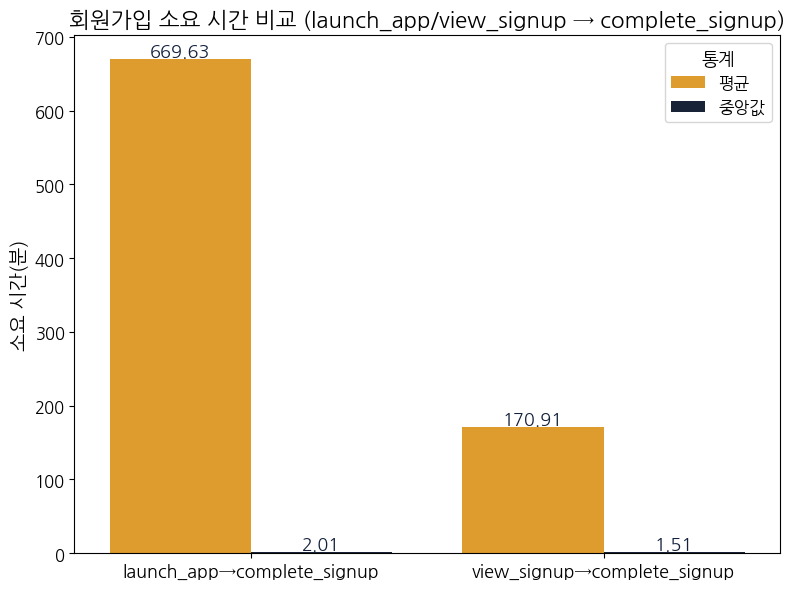

In [48]:
compare_df_nozero = compare_df.copy()
compare_df_nozero.loc[compare_df_nozero['ÏÜåÏöîÏãúÍ∞Ñ(Î∂Ñ)'] == 0, 'ÏÜåÏöîÏãúÍ∞Ñ(Î∂Ñ)'] = np.nan

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=compare_df_nozero,
    x='Íµ¨Í∞Ñ',
    y='ÏÜåÏöîÏãúÍ∞Ñ(Î∂Ñ)',
    hue='ÌÜµÍ≥Ñ',
    palette=['#fca311', '#14213d']
)

# Í∞Å Î∞î ÏúÑÏóê ÏàòÏπò ÌëúÏãú (0.00ÏùÄ ÌëúÏãúÌïòÏßÄ ÏïäÏùå)
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height) and height != 0:
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=13, color='#14213d')

plt.title('ÌöåÏõêÍ∞ÄÏûÖ ÏÜåÏöî ÏãúÍ∞Ñ ÎπÑÍµê (launch_app/view_signup ‚Üí complete_signup)', fontsize=16)
plt.ylabel('ÏÜåÏöî ÏãúÍ∞Ñ(Î∂Ñ)', fontsize=14)
plt.xlabel('')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.legend(title='ÌÜµÍ≥Ñ', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()

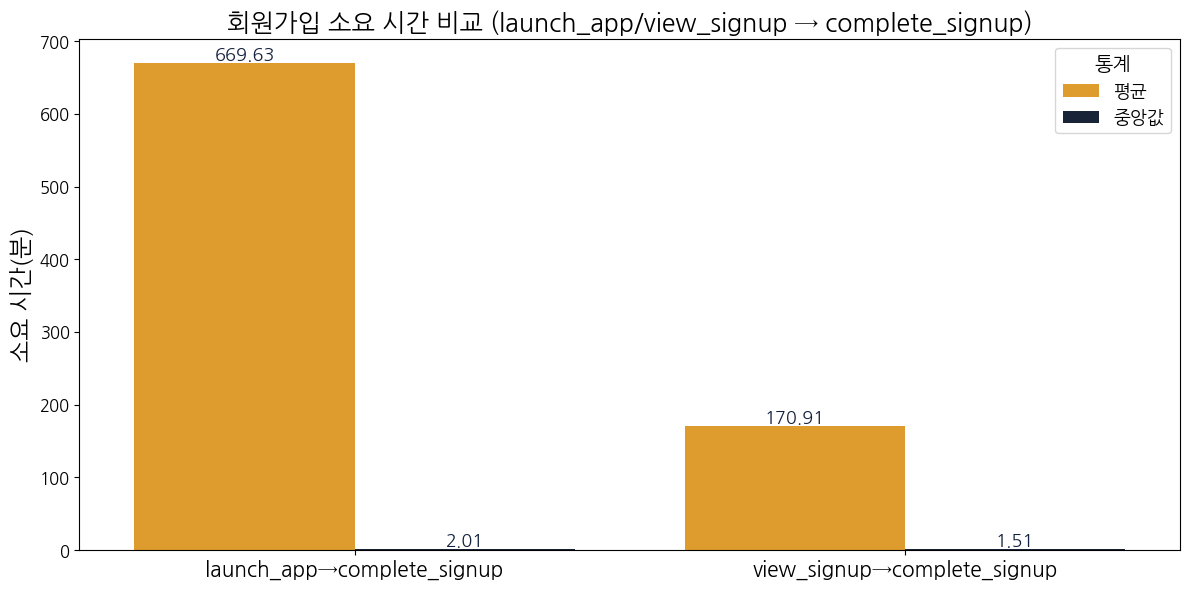

In [49]:
# Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ Î∞è Í∏ÄÏûê ÌÅ¨Í∏∞ ÌÖúÌîåÎ¶ø Ï†ÅÏö© (ÎßâÎåÄÍ∑∏ÎûòÌîÑ)
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=compare_df_nozero,
    x='Íµ¨Í∞Ñ',
    y='ÏÜåÏöîÏãúÍ∞Ñ(Î∂Ñ)',
    hue='ÌÜµÍ≥Ñ',
    palette=['#fca311', '#14213d']
)

# Í∞Å Î∞î ÏúÑÏóê ÏàòÏπò ÌëúÏãú (0.00ÏùÄ ÌëúÏãúÌïòÏßÄ ÏïäÏùå)
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height) and height != 0:
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=13, color='#14213d')

plt.title('ÌöåÏõêÍ∞ÄÏûÖ ÏÜåÏöî ÏãúÍ∞Ñ ÎπÑÍµê (launch_app/view_signup ‚Üí complete_signup)', fontsize=18)
plt.ylabel('ÏÜåÏöî ÏãúÍ∞Ñ(Î∂Ñ)', fontsize=17)
plt.xlabel('', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.legend(title='ÌÜµÍ≥Ñ', fontsize=13, title_fontsize=14)
plt.tight_layout()
plt.show()

ÏÑ∏ÏÖòÏúºÎ°ú Î¨∂Í±∞ÎÇò userÎ°ú Î¨∂Í±∞ÎÇò ÌÅ¨Í≤å Ï∞®Ïù¥Í∞Ä Î∞úÏÉùÌïòÏßÑ ÏïäÏùå     
-> Î™©Ï†ÅÏóê Îî∞ÎùºÏÑú Í∏∞Ï§ÄÏùÑ Ï†ïÌï† ÎìØÌï®       
-> ÌäπÏù¥ ÏÇ¨Ìï≠ÏúºÎ°ú 2Î≤à ÌöåÏõêÍ∞ÄÏûÖÌïú Ïú†Ï†Ä Î∞è Í∞íÏùÑ Ïú†Ï∂îÌï† Ïàò ÏóÜÎäî Í≤ΩÏö∞ Ï†úÏô∏Ìï®     
    + ÏïÑÏßÅ Í∑∏ÎûòÌîÑ ÏÉâÏÉÅ Î∞è ÎùºÎ≤® Îì±Ïùò ÌÅ¨Í∏∞Î•º Î≥ÄÍ≤ΩÌïòÏßÑ ÏïäÏùå

‚úÖ 1. launch_app ‚Üí complete_signup ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÌè¨       
ÌèâÍ∑†: 669.63Î∂Ñ (ÏïΩ 11ÏãúÍ∞Ñ Ïù¥ÏÉÅ)     
Ï§ëÏïôÍ∞í: 2.01Î∂Ñ

Í∑∏ÎûòÌîÑ ÌòïÌÉú: Violin plot Ï§ëÏã¨Î∂ÄÍ∞Ä ÏßßÏùÄ ÏãúÍ∞ÑÎåÄ(0~5Î∂Ñ)Ïóê Î∞ÄÏßë, Í∏¥ Íº¨Î¶¨Í∞Ä Ïò§Î•∏Ï™ΩÏúºÎ°ú Îß§Ïö∞ Í∏∏Í≤å Î∂ÑÌè¨ ‚Üí Í∑πÎã®Ï†ÅÏù∏ outlier Ï°¥Ïû¨

üîç Ìï¥ÏÑù Î∞è Ïù∏ÏÇ¨Ïù¥Ìä∏     
ÎåÄÎ∂ÄÎ∂ÑÏùò Ïú†Ï†ÄÎäî Ïï±ÏùÑ Ïã§ÌñâÌïú ÌõÑ Ïàò Î∂Ñ ÎÇ¥Ïóê ÌöåÏõêÍ∞ÄÏûÖÏùÑ ÏôÑÎ£åÌïòÏßÄÎßå, ÏùºÎ∂Ä Ïú†Ï†ÄÎäî Ïàò ÏãúÍ∞ÑÏóêÏÑú ÏàòÏùº Îã®ÏúÑÎ°ú ÏÜåÏöîÎêòÍ≥† ÏûàÏùå.     
Ï§ëÏïôÍ∞íÏù¥ 2Î∂ÑÏù∏Îç∞ ÌèâÍ∑†Ïù¥ 11ÏãúÍ∞Ñ Ïù¥ÏÉÅÏù∏ Ï†êÏúºÎ°ú ÎØ∏Î£®Ïñ¥ ÎπÑÏ†ïÏÉÅÏ†ÅÏúºÎ°ú ÏßÄÏó∞Îêú Í∞ÄÏûÖ ÌùêÎ¶ÑÏù¥ Ï°¥Ïû¨.       

Ïù¥Îäî Ïã§Ï†ú Í∞ÄÏûÖ ÏôÑÎ£åÍ∞Ä Îß§Ïö∞ Îä¶Í≤å Ïù¥Î£®Ïñ¥ÏßÑ Ïú†Ï†Ä, ÌòπÏùÄ Ïï±ÏùÑ Ïó¨Îü¨ Î≤à Ïã§ÌñâÌïú ÌõÑ Í∞ÄÏûÖÌïú Ïú†Ï†ÄÏùº Ïàò ÏûàÏùå.       

‚úÖ 2. view_signup ‚Üí complete_signup ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÌè¨ (2Ìöå Í∞ÄÏûÖ Ïú†Ï†Ä Ï†úÏô∏)     
ÌèâÍ∑†: 170.91Î∂Ñ (ÏïΩ 2.8ÏãúÍ∞Ñ)     
Ï§ëÏïôÍ∞í: 1.51Î∂Ñ

Í∑∏ÎûòÌîÑ ÌòïÌÉú: ÏúÑÏôÄ ÎπÑÏä∑ÌïòÍ≤å ÏßßÏùÄ ÏãúÍ∞ÑÎåÄÏóê ÏßëÏ§ë, Îã§Îßå Íº¨Î¶¨Í∞Ä ÎπÑÍµêÏ†Å ÏßßÏùå

üîç Ìï¥ÏÑù Î∞è Ïù∏ÏÇ¨Ïù¥Ìä∏     
Ïã§Ï†ú ÌöåÏõêÍ∞ÄÏûÖ UIÎ•º Ï†ëÌïú ÌõÑ Í±∞Ïùò Î∞îÎ°ú Í∞ÄÏûÖÌïú Ïú†Ï†ÄÍ∞Ä ÎåÄÎ∂ÄÎ∂Ñ (1~2Î∂Ñ ÎÇ¥ Ï≤òÎ¶¨).      


| Íµ¨Í∞Ñ                              | ÌèâÍ∑† ÏÜåÏöî ÏãúÍ∞Ñ    | Ï§ëÏïôÍ∞í ÏÜåÏöî ÏãúÍ∞Ñ | Î∂ÑÌè¨ ÌäπÏßï                            |
| ------------------------------- | ----------- | --------- | -------------------------------- |
| `launch_app ‚Üí complete_signup`  | **669.63Î∂Ñ** | **2.01Î∂Ñ** | Ï†ÑÏ≤¥ Ïï± ÏßÑÏûÖÎ∂ÄÌÑ∞ Í∞ÄÏûÖ ÏôÑÎ£åÍπåÏßÄÏùò Ïã§Ï†ú ÌùêÎ¶Ñ. Í∑πÎã®Í∞í Ï°¥Ïû¨ |
| `view_signup ‚Üí complete_signup` | **170.91Î∂Ñ** | **1.51Î∂Ñ** | UI ÏßÑÏûÖ Ïù¥ÌõÑÏùò ÌùêÎ¶Ñ. Îçî ÏßëÏ§ëÎêòÍ≥† ÏßßÏùÄ ÏãúÍ∞Ñ Î∂ÑÌè¨    |


Ïù∏ÏÇ¨Ïù¥Ìä∏ Î∞è Ìï¥ÏÑù
Í∞ÄÏûÖ Ï†ÑÌôò ÌùêÎ¶ÑÏùò Ï†ïÏÉÅÏÑ±

1. launch_app ‚Üí complete_signupÏùÄ Ï†ÑÏ≤¥ Ïï± ÏßÑÏûÖÎ∂ÄÌÑ∞ Í∞ÄÏûÖÍπåÏßÄÏùò Ï†ÑÏ≤¥ Ïó¨Ï†ïÏùÑ Î∞òÏòÅÌïòÎ©∞, Ï§ëÍ∞Ñ Ïù¥Î≤§Ìä∏(view_signup)ÎèÑ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú Ìè¨Ìï®Îêú Í≤ÉÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§.

    - Îã®, ÏùºÎ∂Ä Ïú†Ï†ÄÏùò ÏßÄÏó∞ Í∞ÄÏûÖ (ÏàòÏãúÍ∞Ñ~ÏàòÏùº) ÏùÄ Ïó¨Ï†ÑÌûà Ï°¥Ïû¨ÌïòÎ©∞, Ïù¥Îäî Ïã§Ï†ú Ïï± Ïû¨Ï†ëÏÜç ÎòêÎäî Í∞ÄÏûÖÏùÑ ÎØ∏Î£¨ ÏÇ¨Î°ÄÏùº Ïàò ÏûàÏäµÎãàÎã§.

2. ÏßÄÏó∞ Î∞úÏÉù Ìï¥ÏÑù
    - ÌäπÏ†ï Ïú†Ï†ÄÎäî Ïï±ÏùÑ Ïº† ÏßÅÌõÑ Î∞îÎ°ú Í∞ÄÏûÖÌïòÏßÄ ÏïäÍ≥†, Ïï±ÏùÑ ÌÉêÏÉâÌïòÍ±∞ÎÇò, Ïï±ÏùÑ ÎÇòÍ∞îÎã§Í∞Ä Î©∞Ïπ† Îí§Ïóê Îã§Ïãú ÎèåÏïÑÏôÄ Í∞ÄÏûÖÌïòÎäî Í≤ΩÏö∞ÎèÑ ÏûàÏäµÎãàÎã§.

    - Ïù¥Îäî Ï¶âÏãúÍ∞ÄÏûÖ/ÏßÄÏó∞Í∞ÄÏûÖ Ïú†Ï†Ä Íµ¨Î∂ÑÏóê ÏùòÎØ∏Î•º Î∂ÄÏó¨ÌïòÎäî Í∑ºÍ±∞Í∞Ä ÎêòÎ©∞, Ïã§Ï†ú Î¶¨ÌÖêÏÖòÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏöîÏÜåÎ°ú ÏûëÏö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.

3. UI Í∞úÏÑ† Ìè¨Ïù∏Ìä∏Îäî Ïó¨Ï†ÑÌûà Ïú†Ìö®

    - launch_app ‚Üí view_signup Íµ¨Í∞ÑÏùÑ Ï†ÑÌôòÏú® Í¥ÄÏ†êÏóêÏÑú Î™®ÎãàÌÑ∞ÎßÅÌïòÎ©¥, Ìôà ÌôîÎ©¥Ïù¥ÎÇò ÎûúÎî© ÌôîÎ©¥ÏóêÏÑú Í∞ÄÏûÖ Ïú†ÎèÑ ÏöîÏÜå(CTA)Í∞Ä ÏïΩÌïòÍ±∞ÎÇò, ÏùºÎ∂Ä Ïú†Ï†ÄÎäî Í∞ÄÏûÖ ÌéòÏù¥ÏßÄÍπåÏßÄ ÏßÑÏûÖÌïòÏßÄ Î™ªÌïòÍ≥† Ïù¥ÌÉàÌñàÏùÑ Í∞ÄÎä•ÏÑ±ÎèÑ Î∞∞Ï†úÌï† Ïàò ÏóÜÏäµÎãàÎã§.

4. view_signup ‚Üí complete_signupÏùÄ Í∞ÄÏûÖ ÏùòÏÇ¨ ÌëúÌòÑ Ïù¥ÌõÑ Ï†ÑÌôò Íµ¨Í∞Ñ
    - Ïù¥ Íµ¨Í∞ÑÏùÄ Í∞ÄÏûÖ ÌéòÏù¥ÏßÄÏóê ÏßÑÏûÖÌïú ÌõÑ Ïã§Ï†úÎ°ú Í∞ÄÏûÖÍπåÏßÄ Ïù¥Î•¥Îäî Íµ¨Í∞ÑÏù¥ÎØÄÎ°ú, ÌçºÎÑê Ìö®Ïú®ÏÑ± Í∞úÏÑ† ÏßÄÌëúÎ°ú Ï†ÅÌï©Ìï©ÎãàÎã§.

### Ï¶âÏãú Í∞ÄÏûÖ Ïú†Ï†ÄÏôÄ ÏßÄÏó∞ Í∞ÄÏûÖ Ïú†Ï†ÄÏóê ÎåÄÌï¥ÏÑú
---

In [50]:
# launch_app ‚Üí complete_signup ÏãúÍ∞Ñ Í≥ÑÏÇ∞Îêú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î∂ÑÎ¶¨
launch_signup_diffs = (
    filtered_signup_users_events.groupby('user_id')
    .apply(get_launch_signup_time_diff)  # Í∞ôÏùÄ Î∞©ÏãùÏúºÎ°ú ÏûëÏÑ±Îêú Ìï®Ïàò
    .dropna()
)

# Ï¶âÏãú Í∞ÄÏûÖ Ïú†Ï†Ä Í∏∞Ï§Ä Î∂ÑÎ¶¨
instant_threshold = 2.01 # ÏúÑ launch_app -> complete_signup ÏÜåÏöî ÏãúÍ∞ÑÏùò Ï§ëÏïôÍ∞í
instant_user_ids = launch_signup_diffs[launch_signup_diffs <= instant_threshold].index
delayed_user_ids = launch_signup_diffs[launch_signup_diffs > instant_threshold].index

# 1) ÌöåÏõêÍ∞ÄÏûÖ ÏãúÏ†ê Ï∂îÏ∂ú
signup_times = filtered_signup_users_events[filtered_signup_users_events['event_key'] == 'complete_signup']
signup_times = signup_times.groupby('user_id')['event_datetime'].min()

# 2) Ïù¥ÌõÑ Î∞úÏÉùÌïú Ïù¥Î≤§Ìä∏ Ï§ë Ï≤´ Î≤àÏß∏ ÏãúÏ†ê (Í∞ÄÏûÖ Ïù¥ÌõÑÎßå!)
after_signup_events = filtered_signup_users_events[
    filtered_signup_users_events['event_key'] != 'complete_signup'
].copy()

# complete_signup Ïù¥ÌõÑ Ïù¥Î≤§Ìä∏Îßå ÎÇ®Í∏∞Í∏∞
after_signup_events = after_signup_events.merge(
    signup_times.rename("signup_time"), left_on="user_id", right_index=True
)
after_signup_events = after_signup_events[after_signup_events['event_datetime'] > after_signup_events['signup_time']]

# Ïù¥ÌõÑ Ïù¥Î≤§Ìä∏ Ï§ë Í∞ÄÏû• Îπ†Î•∏ ÏãúÏ†êÎßå Ï∂îÏ∂ú
next_event_times = after_signup_events.groupby("user_id")['event_datetime'].min()

# gap Í≥ÑÏÇ∞ Î∞è Î¶¨ÌÖêÏÖò ÌîåÎûòÍ∑∏ Îã§Ïãú ÏÉùÏÑ±
activity_gap_days = (next_event_times - signup_times).dt.total_seconds() / (60 * 60 * 24)

retention_flags = pd.DataFrame({
    'retained_1d': activity_gap_days <= 1,
    'retained_3d': activity_gap_days <= 3,
    'retained_7d': activity_gap_days <= 7,
    'retained_30d': activity_gap_days <= 30
})

In [51]:
# Í∑∏Î£π ÌÉúÍπÖ
retention_flags['user_id'] = retention_flags.index
retention_flags['signup_speed'] = retention_flags['user_id'].apply(
    lambda x: 'instant' if x in instant_user_ids else ('delayed' if x in delayed_user_ids else 'unknown')
)

# instant ÎòêÎäî delayedÎßå ÌïÑÌÑ∞ÎßÅ
retention_filtered = retention_flags[retention_flags['signup_speed'].isin(['instant', 'delayed'])]

# Í∑∏Î£πÎ≥Ñ ÌèâÍ∑† = Î¶¨ÌÖêÏÖòÏú® (True ÎπÑÏú®)
retention_summary = (
    retention_filtered
    .groupby('signup_speed')[['retained_1d', 'retained_3d', 'retained_7d', 'retained_30d']]
    .mean()
    .reset_index()
)
retention_summary

signup_speed  retained_1d  retained_3d  retained_7d  retained_30d
0      delayed     0.958678     0.960744     0.960744      0.960744
1      instant     0.952479     0.952479     0.952479      0.958678

In [52]:
# 'complete_question' Ïù¥Î≤§Ìä∏Í∞Ä userÎ≥ÑÎ°ú Î™á Î≤à Î∞úÏÉùÌñàÎäîÏßÄ ÏßëÍ≥Ñ
question_complete_counts = final_hackle_df[final_hackle_df['event_key'] == 'complete_question'].groupby('user_id').size()

# ÌèâÍ∑† ÏßàÎ¨∏ ÏôÑÎ£å ÌöüÏàò Í≥ÑÏÇ∞
mean_complete_questions = question_complete_counts.mean()
print(f"Ïú†Ï†ÄÎ≥Ñ ÌèâÍ∑† ÏßàÎ¨∏ ÏôÑÎ£å ÌöüÏàò: {mean_complete_questions:.2f}")

Ïú†Ï†ÄÎ≥Ñ ÌèâÍ∑† ÏßàÎ¨∏ ÏôÑÎ£å ÌöüÏàò: 3.11


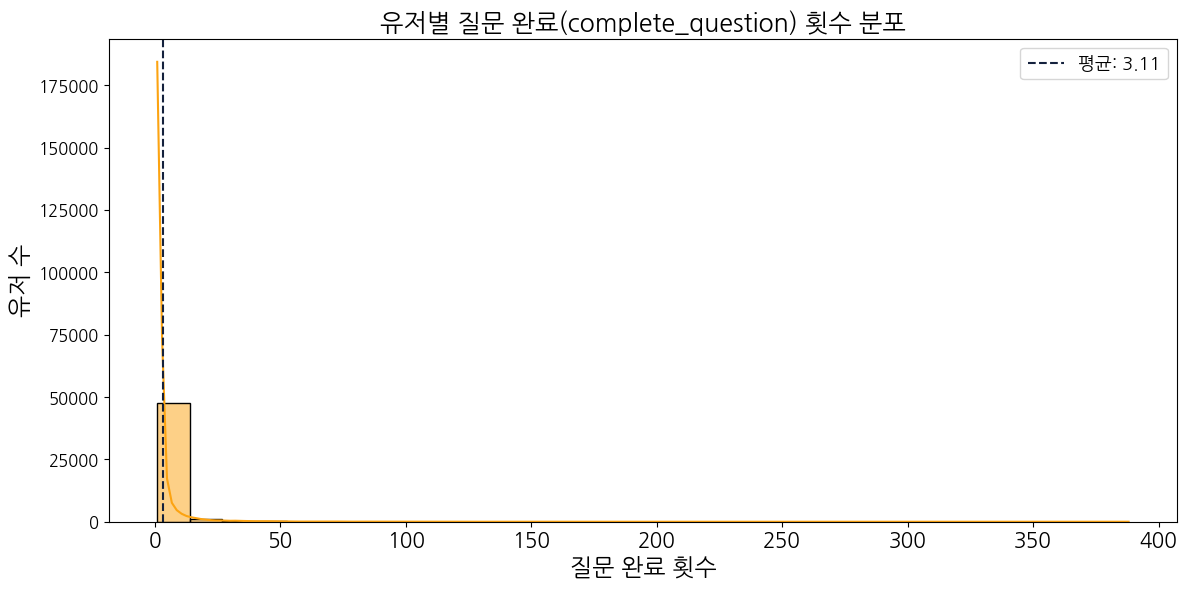

In [53]:
# Ïú†Ï†ÄÎ≥Ñ complete_question Ïù¥Î≤§Ìä∏ ÌöüÏàò ÏßëÍ≥Ñ
question_complete_counts = final_hackle_df[final_hackle_df['event_key'] == 'complete_question'].groupby('user_id').size()
mean_complete_questions = question_complete_counts.mean()

plt.figure(figsize=(12, 6))
sns.histplot(question_complete_counts, bins=30, kde=True, color='#fca311')
plt.axvline(mean_complete_questions, color='#14213d', linestyle='--', label=f'ÌèâÍ∑†: {mean_complete_questions:.2f}')
plt.title('Ïú†Ï†ÄÎ≥Ñ ÏßàÎ¨∏ ÏôÑÎ£å(complete_question) ÌöüÏàò Î∂ÑÌè¨', fontsize=18)
plt.xlabel('ÏßàÎ¨∏ ÏôÑÎ£å ÌöüÏàò', fontsize=17)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()

Î¶¨ÌÖêÏÖòÏú®Ïù¥ ÎπÑÏ†ïÏÉÅÏ†ÅÏúºÎ°ú ÎÜíÍ∏∞ ÎïåÎ¨∏Ïóê Í∏∞Ï§Ä Í∞ïÌôî(ÏßàÎ¨∏ 3Ìöå ÏôÑÎ£å)        
- ÏßàÎ¨∏ 3Ìöå ÏôÑÎ£åÏù∏ Ïù¥Ïú†Îäî?
    - Ïú†Ï†ÄÎ≥Ñ ÌèâÍ∑† ÏßàÎ¨∏ ÏôÑÎ£å ÌöüÏàòÍ∞Ä 3.11Î°ú 3Î≤àÏùÄ ÏôÑÎ£åÌïú Ïú†Ï†ÄÎì§Ïù¥ Îã§ÏàòÏù¥Í∏∞ ÎïåÎ¨∏Ïóê

In [54]:
# complete_signup Ïù¥ÌõÑ Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú
after_signup_events = filtered_signup_users_events[
    filtered_signup_users_events['event_key'] != 'complete_signup'
].copy()

after_signup_events = after_signup_events.merge(
    signup_times.rename("signup_time"), left_on="user_id", right_index=True
)
after_signup_events = after_signup_events[
    after_signup_events['event_datetime'] > after_signup_events['signup_time']
]

# complete_question Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ ÌõÑ Í∞úÏàò ÏÑ∏Í∏∞
question_counts = after_signup_events[
    after_signup_events['event_key'] == 'complete_question'
].groupby('user_id').size()

# Î¶¨ÌÖêÏÖò Ï°∞Í±¥: 3Ìöå Ïù¥ÏÉÅ
retained_users = question_counts[question_counts >= 3].index

# retention_flags Îã§Ïãú Íµ¨ÏÑ±
retention_flags = pd.DataFrame({
    'user_id': signup_times.index,
    'retained_custom': signup_times.index.isin(retained_users)
})

In [55]:
# Í∞ÄÏûÖ ÏÜçÎèÑ ÌÉúÍπÖ
retention_flags['signup_speed'] = retention_flags['user_id'].apply(
    lambda x: 'instant' if x in instant_user_ids else ('delayed' if x in delayed_user_ids else 'unknown')
)

# ÌïÑÌÑ∞ÎßÅ
retention_filtered = retention_flags[retention_flags['signup_speed'].isin(['instant', 'delayed'])]

# Í∑∏Î£πÎ≥Ñ Î¶¨ÌÖêÏÖòÏú® Í≥ÑÏÇ∞
retention_summary = (
    retention_filtered
    .groupby('signup_speed')['retained_custom']
    .mean()
    .reset_index()
    .rename(columns={'retained_custom': 'retention_rate'})
)

retention_summary

signup_speed  retention_rate
0      delayed        0.291322
1      instant        0.241736

ÏúÑ Î¶¨ÌÖêÏÖò(Ï°∞Í±¥ ÏßàÎ¨∏ 3Ìöå ÏôÑÎ£å)ÏùÑ 1,3,7Ïùº Í∏∞Í∞ÑÏúºÎ°ú ÎÇòÎàÑÏñ¥ÏÑú ÌôïÏù∏ÌñàÏùÑ Îïå

In [56]:
# Í∞ÄÏûÖ ÏãúÏ†ê (user_idÎ≥Ñ complete_signup ÏãúÍ∞Ñ)
signup_times = filtered_signup_users_events[filtered_signup_users_events['event_key'] == 'complete_signup']
signup_times = signup_times.groupby('user_id')['event_datetime'].min()

# Í∞ÄÏûÖ Ïù¥ÌõÑÏùò Ïù¥Î≤§Ìä∏ (complete_signup Ï†úÏô∏)
after_signup_events = filtered_signup_users_events[
    filtered_signup_users_events['event_key'] != 'complete_signup'
].copy()

after_signup_events = after_signup_events.merge(
    signup_times.rename("signup_time"), left_on="user_id", right_index=True
)
after_signup_events = after_signup_events[
    after_signup_events['event_datetime'] > after_signup_events['signup_time']
]


In [57]:
# Í∏∞Ï§ÄÏùº Í≥ÑÏÇ∞
after_signup_events['days_after_signup'] = (
    (after_signup_events['event_datetime'] - after_signup_events['signup_time']).dt.total_seconds() / (60 * 60 * 24)
)

# Î¶¨ÌÖêÏÖò Ï°∞Í±¥ Ìï®Ïàò
def get_retained_users(days):
    filtered = after_signup_events[
        (after_signup_events['event_key'] == 'complete_question') &
        (after_signup_events['days_after_signup'] <= days)
    ]
    counts = filtered.groupby('user_id').size()
    retained = counts[counts >= 2].index
    return retained


In [58]:
retention_flags = pd.DataFrame({'user_id': signup_times.index})
retention_flags['retained_1d'] = retention_flags['user_id'].isin(get_retained_users(1))
retention_flags['retained_3d'] = retention_flags['user_id'].isin(get_retained_users(3))
retention_flags['retained_7d'] = retention_flags['user_id'].isin(get_retained_users(7))

# Í∞ÄÏûÖ ÏÜçÎèÑ ÌÉúÍπÖ
retention_flags['signup_speed'] = retention_flags['user_id'].apply(
    lambda x: 'instant' if x in instant_user_ids else ('delayed' if x in delayed_user_ids else 'unknown')
)

# ÌïÑÌÑ∞ÎßÅ
retention_filtered = retention_flags[retention_flags['signup_speed'].isin(['instant', 'delayed'])]

# ÏöîÏïΩ
retention_summary = (
    retention_filtered
    .groupby('signup_speed')[['retained_1d', 'retained_3d', 'retained_7d']]
    .mean()
    .reset_index()
)

retention_summary

signup_speed  retained_1d  retained_3d  retained_7d
0      delayed     0.266529     0.307851     0.334711
1      instant     0.208678     0.262397     0.280992

In [59]:
from scipy.stats import mannwhitneyu

for day in ['retained_1d', 'retained_3d', 'retained_7d']:
    instant_values = retention_filtered[retention_filtered['signup_speed'] == 'instant'][day].astype(int)
    delayed_values = retention_filtered[retention_filtered['signup_speed'] == 'delayed'][day].astype(int)
    
    stat, p = mannwhitneyu(instant_values, delayed_values, alternative='two-sided')
    print(f"{day} - Mann‚ÄìWhitney U Í≤ÄÏ†ï p-value: {p:.5f}")


retained_1d - Mann‚ÄìWhitney U Í≤ÄÏ†ï p-value: 0.03458
retained_3d - Mann‚ÄìWhitney U Í≤ÄÏ†ï p-value: 0.11752
retained_7d - Mann‚ÄìWhitney U Í≤ÄÏ†ï p-value: 0.07041


| Î¶¨ÌÖêÏÖò Í∏∞Ï§Ä     | p-value     | Ïú†ÏùòÏàòÏ§Ä(Œ±=0.05) Í∏∞Ï§Ä Ìï¥ÏÑù      |
| ---------- | ----------- | ----------------------- |
| **1Ïùº Î¶¨ÌÖêÏÖò** | **0.03458** | ‚úÖ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ ÏûàÏùå            |
| **3Ïùº Î¶¨ÌÖêÏÖò** | 0.11752     | ‚ùå Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ ÏóÜÏùå            |
| **7Ïùº Î¶¨ÌÖêÏÖò** | 0.07041     | ‚ùå Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ ÏóÜÏùå (Í≤ΩÍ≥ÑÏÑ†Ïóê Í∞ÄÍπåÏõÄ) |


Ìï¥ÏÑù :      
1Ïùº Î¶¨ÌÖêÏÖòÏùò Í≤ΩÏö∞, Ï¶âÏãú Í∞ÄÏûÖ Ïú†Ï†ÄÏôÄ ÏßÄÏó∞ Í∞ÄÏûÖ Ïú†Ï†Ä Í∞ÑÏóê Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.       
‚Üí Îëê Í∑∏Î£πÏùò **Ï¥àÍ∏∞ Ï†ÅÏùëÎ•†(Ï≤´ÎÇ† Î≥µÍ∑ÄÏú®)**ÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Îã§Î•¥Îã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.

3Ïùº Î∞è 7Ïùº Î¶¨ÌÖêÏÖòÏùÄ p-valueÍ∞Ä 0.05Î≥¥Îã§ ÌÅ¨ÎØÄÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ ÏóÜÏùåÏúºÎ°ú ÌåêÎã®Ìï©ÎãàÎã§.        
‚Üí ÏãúÍ∞ÑÏù¥ ÏßÄÎÇ®Ïóê Îî∞Îùº Îëê Í∑∏Î£π Í∞Ñ Î¶¨ÌÖêÏÖò Ï∞®Ïù¥Í∞Ä Ï§ÑÏñ¥Îì§Í±∞ÎÇò ÏùòÎØ∏ ÏóÜÍ≤å Îê®ÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§.

üìå Ïù∏ÏÇ¨Ïù¥Ìä∏
Ï¶âÏãú Í∞ÄÏûÖ vs ÏßÄÏó∞ Í∞ÄÏûÖ Ïú†Ï†ÄÎäî Ï¥àÍ∏∞ ÌïòÎ£® ÏïàÏóêÎäî Î¶¨ÌÖêÏÖòÏóêÏÑú Ï∞®Ïù¥Î•º Î≥¥ÏûÑ
Ïòà: Ïï± Ïã§Ìñâ ÏßÅÌõÑ Î∞îÎ°ú Í∞ÄÏûÖÌïú Ïú†Ï†ÄÎì§ÏùÄ ÏùòÏÇ¨Í≤∞Ï†ïÏù¥ Îπ†Î•¥ÏßÄÎßå, Î∞òÎåÄÎ°ú Ï†ïÏ∞©Î•†ÏùÄ ÎÇÆÏùÑ Ïàò ÏûàÏùå.
Î∞òÎ©¥ ÏïΩÍ∞Ñ Í≥†ÎØºÌïòÍ≥† Í∞ÄÏûÖÌïú Ïú†Ï†ÄÍ∞Ä Ï°∞Í∏à Îçî Ïò§Îûò Î®∏Î¨¥Îäî Í≤ΩÌñ•ÏùÑ Í∞ÄÏßà Ïàò ÏûàÏùå.

ÌïòÏßÄÎßå 3Ïùº, 7Ïùº Ïù¥ÏÉÅ ÏßÄÎÇòÎ©¥ Î¶¨ÌÖêÏÖò Ï∞®Ïù¥Îäî Í±∞Ïùò ÏóÜÏñ¥Ïßê       
Í≤∞Íµ≠ ÌïµÏã¨ÏùÄ "Í∞ÄÏûÖ ÌõÑ Ï≤´ 24ÏãúÍ∞Ñ ÏïàÏóê Ïù¥ Ïú†Ï†ÄÍ∞Ä Îã§Ïãú ÎèåÏïÑÏò§ÎäîÍ∞Ä?"Í∞Ä Ï§ëÏöî Ìè¨Ïù∏Ìä∏ÏûÑÏùÑ ÏùòÎØ∏      

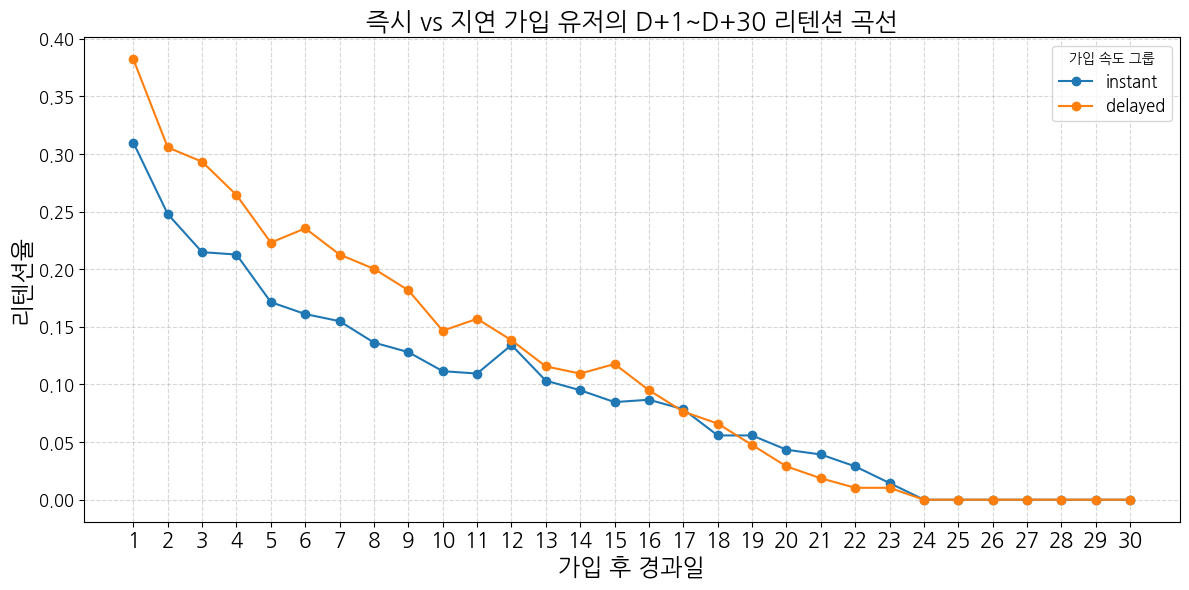

In [60]:
# Îëê Í∑∏Î£πÏùò Î¶¨ÌÖêÏÖò Í≥°ÏÑ†
# Í∞Å Ïú†Ï†ÄÎ≥Ñ Í∞ÄÏûÖ ÏãúÍ∞Ñ
signup_time_df = filtered_signup_users_events[filtered_signup_users_events['event_key'] == 'complete_signup'] \
    .groupby('user_id')['event_datetime'].min().rename('signup_time')

# Ï†ÑÏ≤¥ Ïù¥Î≤§Ìä∏ Î°úÍ∑∏ Ï§ë Í∞ÄÏûÖ Ïù¥ÌõÑ Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú
after_signup = filtered_signup_users_events[filtered_signup_users_events['event_key'] != 'complete_signup'].copy()
after_signup = after_signup.merge(signup_time_df, left_on='user_id', right_index=True)
after_signup = after_signup[after_signup['event_datetime'] > after_signup['signup_time']]
after_signup['days_after_signup'] = (after_signup['event_datetime'] - after_signup['signup_time']).dt.days

# signup_speed Ï†ïÎ≥¥ Î∂ôÏù¥Í∏∞
signup_speed_df = pd.DataFrame({'user_id': list(instant_user_ids) + list(delayed_user_ids)})
signup_speed_df['signup_speed'] = signup_speed_df['user_id'].apply(
    lambda x: 'instant' if x in instant_user_ids else 'delayed'
)

after_signup = after_signup.merge(signup_speed_df, on='user_id')

# D+1 ~ D+30 Î¶¨ÌÖêÏÖòÏú® Í≥ÑÏÇ∞
retention_curve = (
    after_signup.groupby(['signup_speed', 'days_after_signup'])['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'retained_users'})
)

# Í∞Å Í∑∏Î£πÎ≥Ñ Í∞ÄÏûÖ Ïú†Ï†Ä Ïàò
signup_counts = signup_speed_df.groupby('signup_speed')['user_id'].nunique().to_dict()
retention_curve['total_users'] = retention_curve['signup_speed'].map(signup_counts)
retention_curve['retention_rate'] = retention_curve['retained_users'] / retention_curve['total_users']

# 0~30ÏùºÍπåÏßÄ ÎàÑÎùΩÎêú ÎÇ†Ïßú Î≥¥ÏôÑ
all_days = pd.DataFrame({'days_after_signup': range(1, 31)})
final_curve = pd.concat([
    all_days.merge(
        retention_curve[retention_curve['signup_speed'] == group],
        on='days_after_signup',
        how='left'
    ).assign(signup_speed=group)
    for group in ['instant', 'delayed']
])
final_curve['retention_rate'] = final_curve['retention_rate'].fillna(0)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
for group in ['instant', 'delayed']:
    subset = final_curve[final_curve['signup_speed'] == group]
    plt.plot(subset['days_after_signup'], subset['retention_rate'], label=group, marker='o')

plt.title("Ï¶âÏãú vs ÏßÄÏó∞ Í∞ÄÏûÖ Ïú†Ï†ÄÏùò D+1~D+30 Î¶¨ÌÖêÏÖò Í≥°ÏÑ†", fontsize=18)
plt.xlabel("Í∞ÄÏûÖ ÌõÑ Í≤ΩÍ≥ºÏùº", fontsize=17)
plt.ylabel("Î¶¨ÌÖêÏÖòÏú®", fontsize=17)
plt.xticks(range(1, 31), fontsize=15)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Í∞ÄÏûÖ ÏÜçÎèÑ Í∑∏Î£π', fontsize=12)
plt.tight_layout()
plt.show()

In [61]:
signup_times = filtered_signup_users_events[
    filtered_signup_users_events['event_key'] == 'complete_signup'
].groupby('user_id')['event_datetime'].min()

# Í∞ÄÏûÖ ÌõÑ Ïù¥Î≤§Ìä∏ (complete_signup Ï†úÏô∏)
after_signup_events = filtered_signup_users_events[
    filtered_signup_users_events['event_key'] != 'complete_signup'
].copy()

after_signup_events = after_signup_events.merge(
    signup_times.rename("signup_time"), left_on="user_id", right_index=True
)
after_signup_events = after_signup_events[
    after_signup_events['event_datetime'] > after_signup_events['signup_time']
]

# Í∞ÄÏûÖ ÌõÑ Í≤ΩÍ≥ºÏùº
after_signup_events['days_after_signup'] = (
    (after_signup_events['event_datetime'] - after_signup_events['signup_time']).dt.days + 1
)

# Í∏∞Ï§Ä Ïú†Ï†Ä ÏßëÌï© Î∂ÑÎ¶¨
instant_users = set(retention_flags.query("signup_speed == 'instant'")['user_id'])
delayed_users = set(retention_flags.query("signup_speed == 'delayed'")['user_id'])

# Ìï®Ïàò: ÌäπÏ†ï Ïú†Ï†ÄÍµ∞Ïóê ÎåÄÌï¥ dayÎ≥Ñ Î¶¨ÌÖêÏÖòÏú® Í≥ÑÏÇ∞
def compute_daily_retention(user_ids, max_days=30):
    retention_rates = []
    base_users = set(user_ids)
    signup_base = len(base_users)

    for day in range(1, max_days + 1):
        retained_users = after_signup_events[
            (after_signup_events['user_id'].isin(base_users)) &
            (after_signup_events['days_after_signup'] == day)
        ]['user_id'].unique()
        retention_rate = len(set(retained_users)) / signup_base
        retention_rates.append(retention_rate)
    
    return retention_rates

# Í≥ÑÏÇ∞
instant_retention_rates = compute_daily_retention(instant_users)
delayed_retention_rates = compute_daily_retention(delayed_users)

In [62]:
# xÏ∂ï: ÎÇ†Ïßú
days = np.arange(1, 31)

# yÏ∂ï: Î¶¨ÌÖêÏÖòÏú® (D+1 ~ D+30)
instant_curve = np.array(instant_retention_rates)  # Ï¶âÏãú Í∞ÄÏûÖ Í∑∏Î£π Î¶¨ÌÖêÏÖòÎ•† Î¶¨Ïä§Ìä∏
delayed_curve = np.array(delayed_retention_rates)  # ÏßÄÏó∞ Í∞ÄÏûÖ Í∑∏Î£π Î¶¨ÌÖêÏÖòÎ•† Î¶¨Ïä§Ìä∏

# AUC Í≥ÑÏÇ∞
instant_auc = auc(days, instant_curve)
delayed_auc = auc(days, delayed_curve)

print(f"Ï¶âÏãú Í∞ÄÏûÖ AUC: {instant_auc:.4f}")
print(f"ÏßÄÏó∞ Í∞ÄÏûÖ AUC: {delayed_auc:.4f}")


Ï¶âÏãú Í∞ÄÏûÖ AUC: 3.2552
ÏßÄÏó∞ Í∞ÄÏûÖ AUC: 3.9174


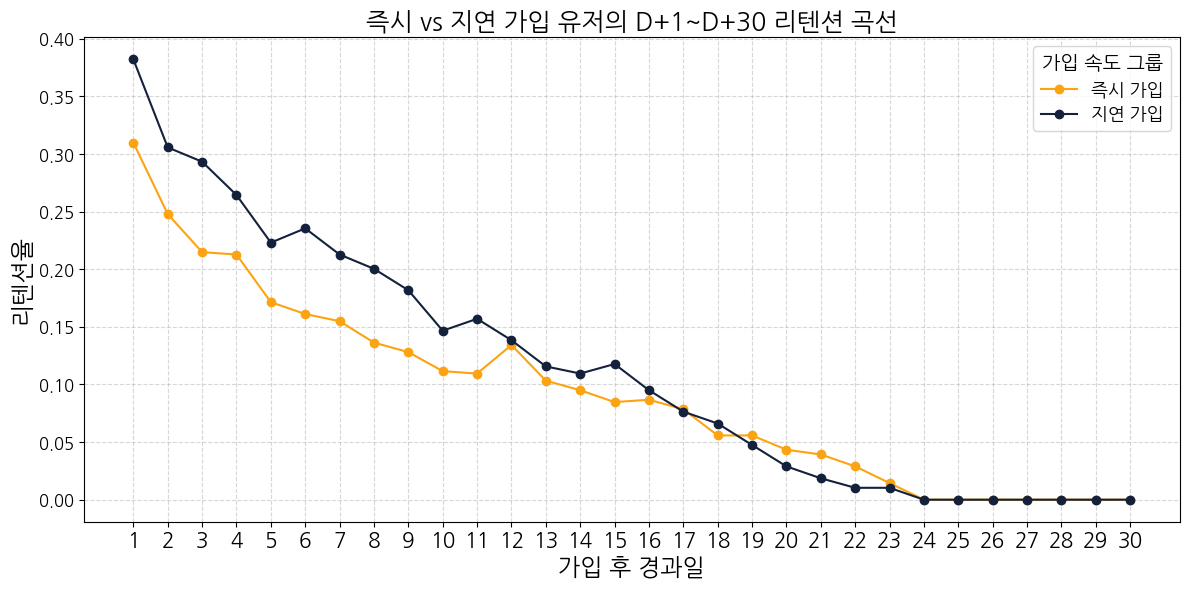

In [63]:
# Ï¶âÏãú vs ÏßÄÏó∞ Í∞ÄÏûÖ Ïú†Ï†ÄÏùò D+1~D+30 Î¶¨ÌÖêÏÖò Í≥°ÏÑ† (ÎîîÏûêÏù∏/Ìè∞Ìä∏/Ïª¨Îü¨ Í∑úÍ≤© Ï†ÅÏö©)

plt.figure(figsize=(12, 6))
colors = {'instant': '#fca311', 'delayed': '#14213d'}

for group in ['instant', 'delayed']:
    subset = final_curve[final_curve['signup_speed'] == group]
    plt.plot(
        subset['days_after_signup'],
        subset['retention_rate'],
        label='Ï¶âÏãú Í∞ÄÏûÖ' if group == 'instant' else 'ÏßÄÏó∞ Í∞ÄÏûÖ',
        marker='o',
        color=colors[group]
    )

plt.title("Ï¶âÏãú vs ÏßÄÏó∞ Í∞ÄÏûÖ Ïú†Ï†ÄÏùò D+1~D+30 Î¶¨ÌÖêÏÖò Í≥°ÏÑ†", fontsize=18)
plt.xlabel("Í∞ÄÏûÖ ÌõÑ Í≤ΩÍ≥ºÏùº", fontsize=17)
plt.ylabel("Î¶¨ÌÖêÏÖòÏú®", fontsize=17)
plt.xticks(range(1, 31), fontsize=15)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Í∞ÄÏûÖ ÏÜçÎèÑ Í∑∏Î£π', fontsize=13, title_fontsize=14)
plt.tight_layout()
plt.show()

ÏßÄÏó∞ Í∞ÄÏûÖ Ïú†Ï†ÄÎäî Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Î¶¨ÌÖêÏÖò Í≥°ÏÑ†ÏóêÏÑú ÎÜíÏùÄ Ïú†ÏßÄÏú®ÏùÑ Î≥¥ÏòÄÏúºÎ©∞, AUC Í∏∞Ï§ÄÏúºÎ°úÎèÑ Îçî ÌÅ∞ ÎàÑÏ†Å Î¶¨ÌÖêÏÖò Í∞íÏùÑ ÎÇòÌÉÄÎÉàÏäµÎãàÎã§. Îã§Îßå, D+17~D+23 Íµ¨Í∞ÑÏóêÏÑú Ï¶âÏãú Í∞ÄÏûÖ Ïú†Ï†ÄÍ∞Ä ÏÜåÌè≠ Îçî ÎÜíÏùÄ Î¶¨ÌÖêÏÖòÏùÑ Î≥¥Ïù∏ Íµ¨Í∞ÑÎèÑ Ï°¥Ïû¨ÌïòÎ©∞, Ïù¥Îäî ÌäπÏ†ï ÏãúÏ†ê Ïù¥ÌõÑ Î∞òÏùëÏù¥ Îã§Î•∏ Ïú†Ï†ÄÍµ∞Ïù¥ ÏÑûÏó¨ ÏûàÏùÑ Í∞ÄÎä•ÏÑ±ÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§. Îî∞ÎùºÏÑú Í∞ÄÏûÖ ÏÜçÎèÑ Ïô∏ÏóêÎèÑ Ï§ëÏû•Í∏∞ Î¶¨ÌÖêÏÖòÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî Îã§Î•∏ ÏöîÏù∏ÏùÑ ÌÉêÏÉâÌï† ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§.

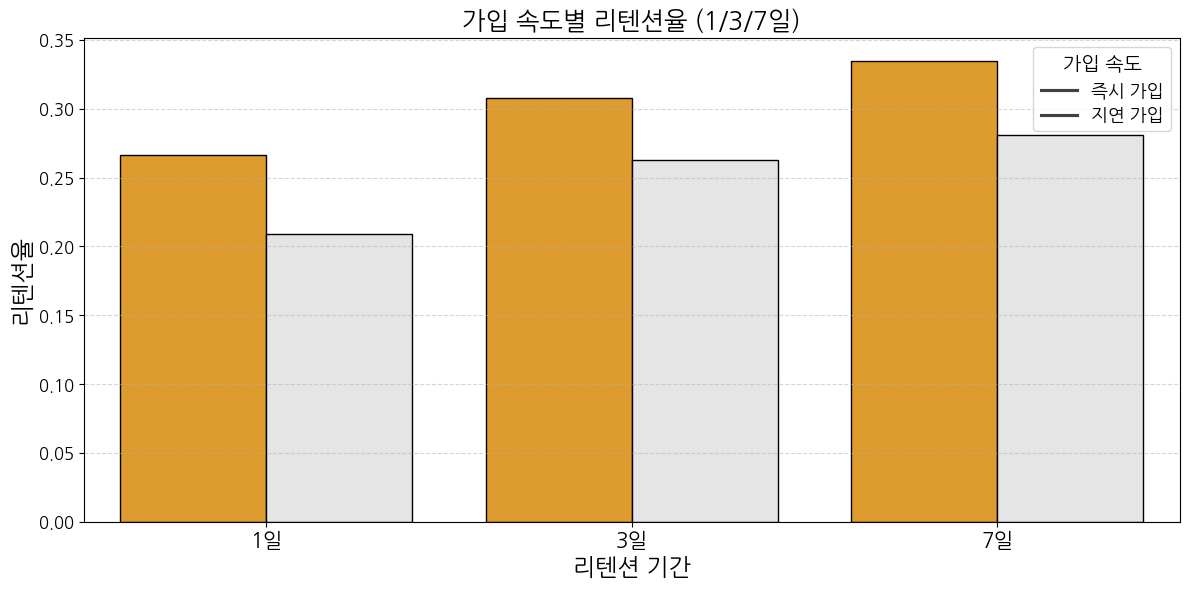

In [64]:
# retention_summary ÏãúÍ∞ÅÌôî (ÎîîÏûêÏù∏/Ìè∞Ìä∏/Ïª¨Îü¨ Í∑úÍ≤© Ï†ÅÏö©)

# Ïª¨Îü¨ ÌÖúÌîåÎ¶ø
base_color = '#e5e5e5'
highlight_color = '#fca311'
bar_colors = [highlight_color if x == 'instant' else base_color for x in retention_summary['signup_speed']]

# melt for grouped barplot
retention_melted = retention_summary.melt(id_vars='signup_speed', 
                                          value_vars=['retained_1d', 'retained_3d', 'retained_7d'],
                                          var_name='period', value_name='retention_rate')

# period ÌïúÍ∏Ä ÎùºÎ≤®
period_labels = {
    'retained_1d': '1Ïùº',
    'retained_3d': '3Ïùº',
    'retained_7d': '7Ïùº'
}
retention_melted['period'] = retention_melted['period'].map(period_labels)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=retention_melted,
    x='period',
    y='retention_rate',
    hue='signup_speed',
    palette=[highlight_color, base_color],
    edgecolor='black'
)
plt.title('Í∞ÄÏûÖ ÏÜçÎèÑÎ≥Ñ Î¶¨ÌÖêÏÖòÏú® (1/3/7Ïùº)', fontsize=18)
plt.xlabel('Î¶¨ÌÖêÏÖò Í∏∞Í∞Ñ', fontsize=17)
plt.ylabel('Î¶¨ÌÖêÏÖòÏú®', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.legend(title='Í∞ÄÏûÖ ÏÜçÎèÑ', labels=['Ï¶âÏãú Í∞ÄÏûÖ', 'ÏßÄÏó∞ Í∞ÄÏûÖ'], fontsize=13, title_fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5, axis='y')
plt.tight_layout()
plt.show()

### ÌöåÏõê Í∞ÄÏûÖ ÏãúÎèÑ ÌõÑ Ïù¥ÌÉà Ïú†Ï†Ä
---

In [65]:
# step1: launch_app Ìïú Ïú†Ï†Ä Ïàò
launch_app_users = final_hackle_df.loc[
    final_hackle_df['event_key'] == 'launch_app', 'user_id'
].unique()

# step2: view_signup ÏãúÎèÑÌïú Ïú†Ï†Ä Ïàò
view_signup_users = final_hackle_df.loc[
    final_hackle_df['event_key'] == 'view_signup', 'user_id'
].unique()

# step3: complete_signup ÏôÑÎ£åÌïú Ïú†Ï†Ä Ïàò
complete_signup_users = final_hackle_df.loc[
    final_hackle_df['event_key'] == 'complete_signup', 'user_id'
].unique()

# Ï§ëÍ∞ÑÍ∞íÎì§
view_to_complete_users = np.intersect1d(view_signup_users, complete_signup_users)
launch_to_view_users = np.intersect1d(launch_app_users, view_signup_users)
launch_to_complete_users = np.intersect1d(launch_app_users, complete_signup_users)

# Ïù¥ÌÉà Ïú†Ï†Ä
only_view_signup_users = set(view_signup_users) - set(complete_signup_users)
only_launch_app_users = set(launch_app_users) - set(view_signup_users)

# ÌçºÎÑê ÏöîÏïΩ
print(f"launch_app ‚Üí view_signup Ï†ÑÌôòÎ•†: {len(launch_to_view_users) / len(launch_app_users):.2%}")
print(f"view_signup ‚Üí complete_signup Ï†ÑÌôòÎ•†: {len(view_to_complete_users) / len(view_signup_users):.2%}")
print(f"launch_app ‚Üí complete_signup Ï†ÑÏ≤¥ Ï†ÑÌôòÎ•†: {len(launch_to_complete_users) / len(launch_app_users):.2%}")


launch_app ‚Üí view_signup Ï†ÑÌôòÎ•†: 2.78%
view_signup ‚Üí complete_signup Ï†ÑÌôòÎ•†: 14.59%
launch_app ‚Üí complete_signup Ï†ÑÏ≤¥ Ï†ÑÌôòÎ•†: 0.41%


In [66]:
# Ïú†Ï†ÄÎ≥Ñ launch_app ÌèâÍ∑† Î∞úÏÉù Ïàò
launch_app_counts = signup_users_all_events[signup_users_all_events['event_key'] == 'launch_app'].groupby('user_id').size()
mean_launch_app_per_user = launch_app_counts.mean()
print(f"Ïú†Ï†ÄÎ≥Ñ launch_app ÌèâÍ∑† Î∞úÏÉù Ïàò: {mean_launch_app_per_user:.2f}")

# Ïú†Ï†ÄÎ≥Ñ launch_app ÏßÅÌõÑ Î∞úÏÉùÌïú Ïù¥Î≤§Ìä∏ ÏßëÍ≥Ñ
# 1. Ï†ïÎ†¨
events_sorted = signup_users_all_events.sort_values(['user_id', 'event_datetime'])

# 2. launch_app Ïù∏Îç±Ïä§ Ï∞æÍ∏∞
launch_app_idx = events_sorted[events_sorted['event_key'] == 'launch_app'].index

# 3. Í∞Å launch_appÏùò Îã§Ïùå Ïù¥Î≤§Ìä∏ Ïù∏Îç±Ïä§
next_event_idx = launch_app_idx + 1
# next_event_idxÍ∞Ä Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≤îÏúÑ ÎÇ¥Ïóê ÏûàÎäîÏßÄ ÌôïÏù∏
next_event_idx = next_event_idx[next_event_idx < len(events_sorted)]

# 4. launch_app ÏßÅÌõÑ Ïù¥Î≤§Ìä∏ Ï∂îÏ∂ú
next_events = events_sorted.iloc[next_event_idx]
next_event_counts = next_events['event_key'].value_counts()
print("Ïú†Ï†ÄÎ≥Ñ launch_app ÏßÅÌõÑ Î∞úÏÉùÌïú Ïù¥Î≤§Ìä∏Î≥Ñ ÎπàÎèÑ:")
print(next_event_counts)

Ïú†Ï†ÄÎ≥Ñ launch_app ÌèâÍ∑† Î∞úÏÉù Ïàò: 15.30
Ïú†Ï†ÄÎ≥Ñ launch_app ÏßÅÌõÑ Î∞úÏÉùÌïú Ïù¥Î≤§Ìä∏Î≥Ñ ÎπàÎèÑ:
event_key
view_timeline_tap                    122
launch_app                           101
click_question_open                  101
view_lab_tap                          82
click_bottom_navigation_questions     71
$session_start                        64
skip_question                         64
$session_end                          53
click_bottom_navigation_profile       51
click_bottom_navigation_timeline      49
view_questions_tap                    40
complete_question                     34
view_profile_tap                      32
view_signup                           31
click_question_start                  31
click_bottom_navigation_lab           21
click_appbar_chat_rooms               20
click_notice_detail                   19
click_appbar_alarm_center             15
click_attendance                      14
click_question_share                  13
click_question_ask      

In [67]:
# ÌöåÏõêÍ∞ÄÏûÖ(complete_signup) Ïù¥ÌõÑ launch_appÏù¥ Î∞úÏÉùÌïú Ïú†Ï†Ä ÎπÑÏú® Í≥ÑÏÇ∞

# 1. user_idÎ≥Ñ complete_signup(Í∞ÄÏûÖ) ÏãúÍ∞Å Ï∂îÏ∂ú
signup_time = (
    signup_users_all_events[signup_users_all_events['event_key'] == 'complete_signup']
    .sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')['event_datetime']
    .max()
)

# 2. Í∞ÄÏûÖ Ïù¥ÌõÑ launch_app Î∞úÏÉù Ïó¨Î∂Ä Ï≤¥ÌÅ¨
def has_launch_app_after_signup(df):
    uid = df['user_id'].iloc[0]
    last_signup = signup_time.get(uid, pd.NaT)
    if pd.isna(last_signup):
        return False
    # Í∞ÄÏûÖ Ïù¥ÌõÑ launch_app Î∞úÏÉù Ïó¨Î∂Ä
    return ((df['event_key'] == 'launch_app') & (df['event_datetime'] > last_signup)).any()

launch_app_after_signup = (
    signup_users_all_events
    .sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')
    .apply(has_launch_app_after_signup)
)

# 3. ÎπÑÏú® Î∞è Í∞úÏàò Ï∂úÎ†•
num_users_with_launch_app_after_signup = launch_app_after_signup.sum()
total_signup_users = len(signup_time)
ratio = num_users_with_launch_app_after_signup / total_signup_users

print(f"ÌöåÏõêÍ∞ÄÏûÖ Ïù¥ÌõÑ launch_app Î∞úÏÉù Ïú†Ï†Ä Ïàò: {num_users_with_launch_app_after_signup} / {total_signup_users} ({ratio:.2%})")

ÌöåÏõêÍ∞ÄÏûÖ Ïù¥ÌõÑ launch_app Î∞úÏÉù Ïú†Ï†Ä Ïàò: 656 / 970 (67.63%)


launch_appÏù¥ Î∞òÎìúÏãú ÌöåÏõêÍ∞ÄÏûÖ Ïù¥Ï†ÑÏóêÎßå ÎÇòÌÉÄÎÇòÎäî Ïù¥Î≤§Ìä∏Îäî ÏïÑÎãàÍ∏∞ ÎïåÎ¨∏Ïóê launch_app -> view_signu p ÏÇ¨Ïù¥ Ïù¥ÌÉàÎ•†ÏùÑ Î≥¥Í∏∞ÏóêÎäî Î¨¥Î¶¨Í∞Ä ÏûàÎã§Í≥† ÌåêÎã®Îê®

In [68]:
# 1. view_signup ‚Üí complete_signup Ïú†Ï†Ä Ï∂îÏ∂ú
view_signup_users = final_hackle_df.loc[
    final_hackle_df['event_key'] == 'view_signup', 'user_id'
].unique()

complete_signup_users = final_hackle_df.loc[
    final_hackle_df['event_key'] == 'complete_signup', 'user_id'
].unique()

# 2. Ï†ÑÌôòÎêú Ïú†Ï†Ä
converted_users = np.intersect1d(view_signup_users, complete_signup_users)

# 3. Ï†ÑÌôòÎ•† Í≥ÑÏÇ∞
total_view = len(view_signup_users)
converted = len(converted_users)
conversion_rate = converted / total_view if total_view > 0 else 0

print(f"view_signup Ïú†Ï†Ä Ïàò: {total_view}")
print(f"complete_signupÏúºÎ°ú Ï†ÑÌôòÎêú Ïú†Ï†Ä Ïàò: {converted}")
print(f"Ï†ÑÌôòÎ•†: {conversion_rate:.2%}")


view_signup Ïú†Ï†Ä Ïàò: 6664
complete_signupÏúºÎ°ú Ï†ÑÌôòÎêú Ïú†Ï†Ä Ïàò: 972
Ï†ÑÌôòÎ•†: 14.59%


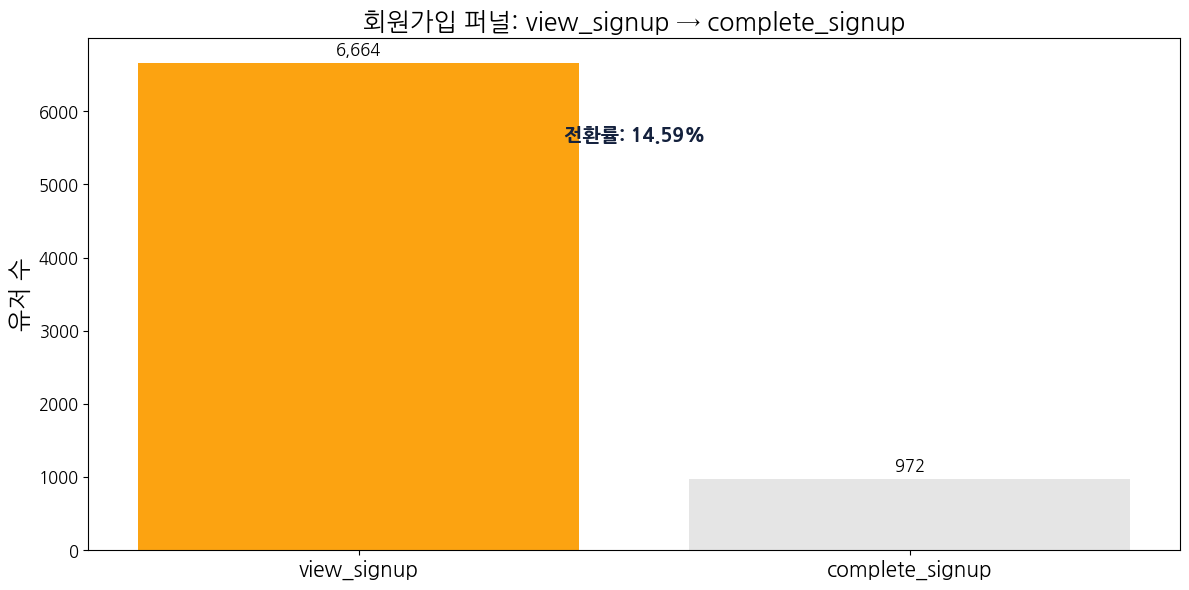

In [69]:
# Îç∞Ïù¥ÌÑ∞ Ï†ïÏùò
labels = ['view_signup', 'complete_signup']
values = [total_view, converted]
colors = ['#fca311', '#e5e5e5']  # Í∞ïÏ°∞ ÏÉâÏÉÅ + Í∏∞Î≥∏ÏÉâÏÉÅ

# Í∑∏ÎûòÌîÑ ÏÇ¨Ïù¥Ï¶à
plt.figure(figsize=(12, 6))

# ÎßâÎåÄÍ∑∏ÎûòÌîÑ
bars = plt.bar(labels, values, color=colors)

# Ï†úÎ™©
plt.title('ÌöåÏõêÍ∞ÄÏûÖ ÌçºÎÑê: view_signup ‚Üí complete_signup', fontsize=18)

# yÏ∂ï ÎùºÎ≤®
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=17)

# Ï∂ï Ìè∞Ìä∏ ÌÅ¨Í∏∞
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

# ÎßâÎåÄ ÏúÑÏóê Ïà´Ïûê ÌëúÏãú
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + total_view * 0.01, f'{int(yval):,}', 
             ha='center', va='bottom', fontsize=12)

# Ï†ÑÌôòÎ•† ÌÖçÏä§Ìä∏ Ï§ëÏïô ÌëúÏãú
plt.text(0.5, max(values) * 0.85, f'Ï†ÑÌôòÎ•†: {conversion_rate:.2%}', 
         ha='center', va='center', fontsize=14, color='#14213d', fontweight='bold')

# Ïó¨Î∞± Ï°∞Ï†ï
plt.tight_layout()

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()

In [70]:
# view_signup ‚Üí complete_signup Ï†ÑÌôò Ïú†Ï†Ä(=converted_users)Ïóê ÎåÄÌï¥ Ï∂îÍ∞ÄÎ°ú ÏÇ¥Ìé¥Î≥º Ïàò ÏûàÎäî Î∂ÑÏÑù ÏïÑÏù¥ÎîîÏñ¥

# 1. Ï†ÑÌôò Ïú†Ï†Ä vs ÎØ∏Ï†ÑÌôò Ïú†Ï†Ä ÎπÑÍµê
#   - ÏÑ±Î≥Ñ, Í∞ÄÏûÖ ÏöîÏùº, ÏπúÍµ¨ Ïàò, Ï≤´ ÌñâÎèô Îì± Ï∞®Ïù¥
converted_set = set(converted_users)
not_converted_set = set(view_signup_users) - converted_set

# user_dfÏóêÏÑú ÏÑ±Î≥Ñ/ÏöîÏùº/ÏπúÍµ¨Ïàò ÎπÑÍµê
converted_info = user_df[user_df['id'].astype(str).isin(converted_set)]
not_converted_info = user_df[user_df['id'].astype(str).isin(not_converted_set)]

print("Ï†ÑÌôò Ïú†Ï†Ä ÏÑ±Î≥Ñ Î∂ÑÌè¨:")
print(converted_info['gender'].value_counts())
print("\nÎØ∏Ï†ÑÌôò Ïú†Ï†Ä ÏÑ±Î≥Ñ Î∂ÑÌè¨:")
print(not_converted_info['gender'].value_counts())

print("\nÏ†ÑÌôò Ïú†Ï†Ä Í∞ÄÏûÖ ÏöîÏùº Î∂ÑÌè¨:")
print(converted_info['signup_dayofweek_kor'].value_counts())
print("\nÎØ∏Ï†ÑÌôò Ïú†Ï†Ä Í∞ÄÏûÖ ÏöîÏùº Î∂ÑÌè¨:")
print(not_converted_info['signup_dayofweek_kor'].value_counts())


Ï†ÑÌôò Ïú†Ï†Ä ÏÑ±Î≥Ñ Î∂ÑÌè¨:
gender
F    437
M    406
Name: count, dtype: int64

ÎØ∏Ï†ÑÌôò Ïú†Ï†Ä ÏÑ±Î≥Ñ Î∂ÑÌè¨:
gender
F    3333
M    1994
Name: count, dtype: int64

Ï†ÑÌôò Ïú†Ï†Ä Í∞ÄÏûÖ ÏöîÏùº Î∂ÑÌè¨:
signup_dayofweek_kor
ÌôîÏöîÏùº    180
ÏàòÏöîÏùº    136
Î™©ÏöîÏùº    123
ÌÜ†ÏöîÏùº    110
Í∏àÏöîÏùº    107
ÏõîÏöîÏùº     97
ÏùºÏöîÏùº     90
Name: count, dtype: int64

ÎØ∏Ï†ÑÌôò Ïú†Ï†Ä Í∞ÄÏûÖ ÏöîÏùº Î∂ÑÌè¨:
signup_dayofweek_kor
ÏùºÏöîÏùº    966
ÌÜ†ÏöîÏùº    897
ÌôîÏöîÏùº    797
ÏõîÏöîÏùº    769
ÏàòÏöîÏùº    737
Í∏àÏöîÏùº    584
Î™©ÏöîÏùº    577
Name: count, dtype: int64


In [71]:
# Ï†ÑÌôò Ïú†Ï†ÄÏùò Ï≤´ ÌñâÎèô(complete_signup Ïù¥ÌõÑ) Î∂ÑÏÑù (IndexError Î∞©ÏßÄ)
def get_first_action_after_signup(df):
    if (df['event_key'] == 'complete_signup').any():
        signup_time = df[df['event_key'] == 'complete_signup']['event_datetime'].min()
        after_signup = df[df['event_datetime'] > signup_time]['event_key']
        if not after_signup.empty:
            return after_signup.iloc[0]
        else:
            return None
    else:
        return None

first_actions = (
    signup_users_all_events[signup_users_all_events['user_id'].isin(converted_users)]
    .sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')
    .apply(get_first_action_after_signup)
    .value_counts()
)

print("\nÏ†ÑÌôò Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Ï≤´ ÌñâÎèô Top 10:")
print(first_actions.head(10))


Ï†ÑÌôò Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Ï≤´ ÌñâÎèô Top 10:
view_timeline_tap                    218
click_question_start                 164
click_bottom_navigation_questions     96
click_bottom_navigation_timeline      86
view_lab_tap                          82
click_bottom_navigation_profile       61
launch_app                            51
click_bottom_navigation_lab           28
$session_end                          25
click_question_ask                    22
Name: count, dtype: int64


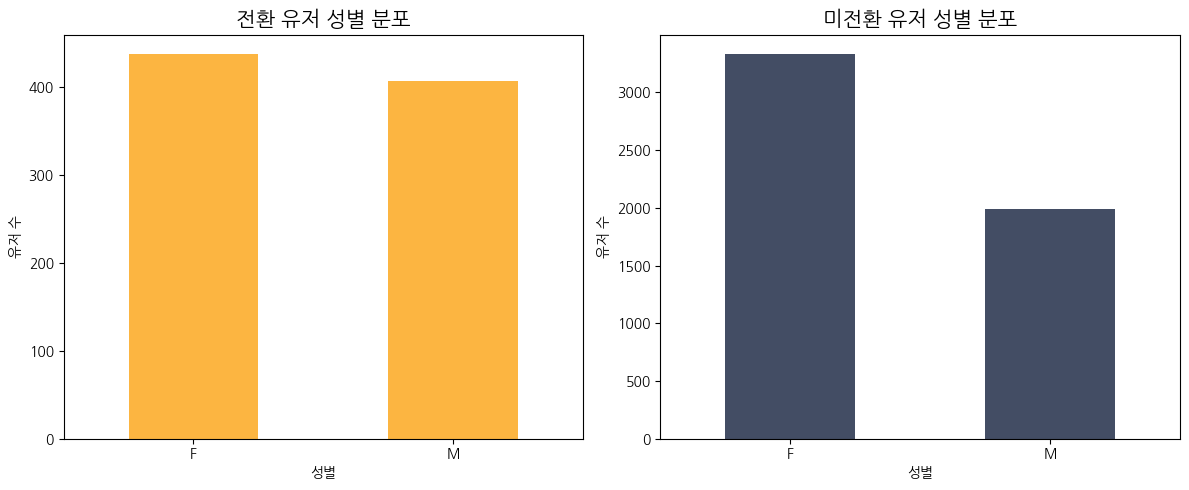

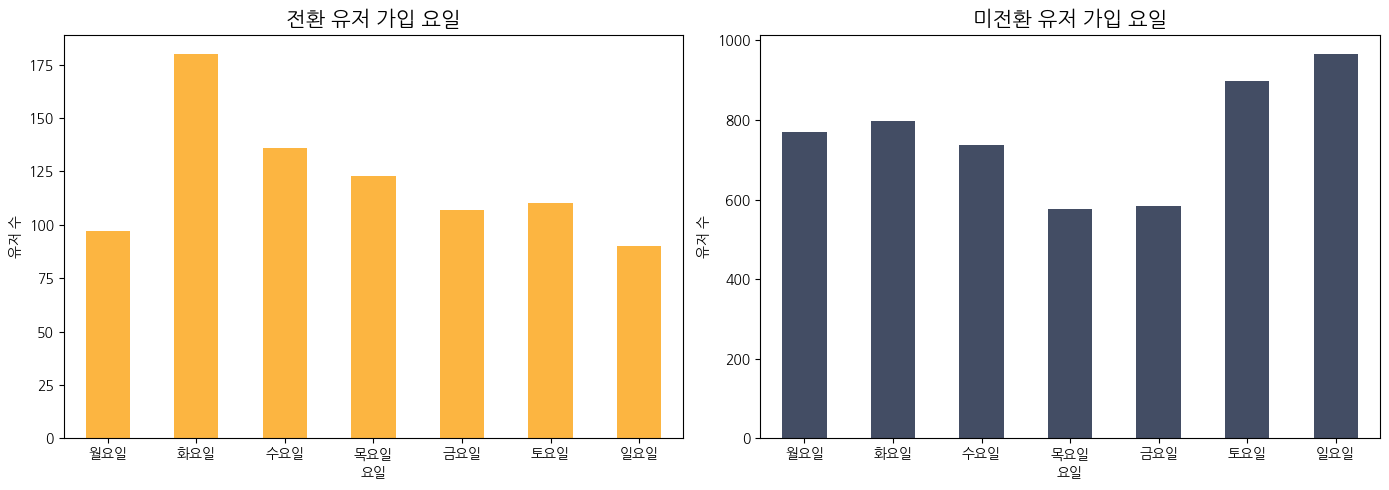

In [72]:
# ÏÑ±Î≥Ñ Î∂ÑÌè¨ (xÏ∂ï ÎùºÎ≤® 0ÎèÑ)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
converted_info['gender'].value_counts().plot(kind='bar', ax=axes[0], color='#fca311', alpha=0.8)
axes[0].set_title('Ï†ÑÌôò Ïú†Ï†Ä ÏÑ±Î≥Ñ Î∂ÑÌè¨', fontsize=15)
axes[0].set_xlabel('ÏÑ±Î≥Ñ')
axes[0].set_ylabel('Ïú†Ï†Ä Ïàò')
axes[0].tick_params(axis='x', labelrotation=0)
not_converted_info['gender'].value_counts().plot(kind='bar', ax=axes[1], color='#14213d', alpha=0.8)
axes[1].set_title('ÎØ∏Ï†ÑÌôò Ïú†Ï†Ä ÏÑ±Î≥Ñ Î∂ÑÌè¨', fontsize=15)
axes[1].set_xlabel('ÏÑ±Î≥Ñ')
axes[1].set_ylabel('Ïú†Ï†Ä Ïàò')
axes[1].tick_params(axis='x', labelrotation=0)
plt.tight_layout()
plt.show()

# Í∞ÄÏûÖ ÏöîÏùº Î∂ÑÌè¨ (xÏ∂ï ÎùºÎ≤® 0ÎèÑ)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
converted_info['signup_dayofweek_kor'].value_counts().reindex(order_kor).plot(kind='bar', ax=axes[0], color='#fca311', alpha=0.8)
axes[0].set_title('Ï†ÑÌôò Ïú†Ï†Ä Í∞ÄÏûÖ ÏöîÏùº', fontsize=15)
axes[0].set_xlabel('ÏöîÏùº')
axes[0].set_ylabel('Ïú†Ï†Ä Ïàò')
axes[0].tick_params(axis='x', labelrotation=0)
not_converted_info['signup_dayofweek_kor'].value_counts().reindex(order_kor).plot(kind='bar', ax=axes[1], color='#14213d', alpha=0.8)
axes[1].set_title('ÎØ∏Ï†ÑÌôò Ïú†Ï†Ä Í∞ÄÏûÖ ÏöîÏùº', fontsize=15)
axes[1].set_xlabel('ÏöîÏùº')
axes[1].set_ylabel('Ïú†Ï†Ä Ïàò')
axes[1].tick_params(axis='x', labelrotation=0)
plt.tight_layout()
plt.show()

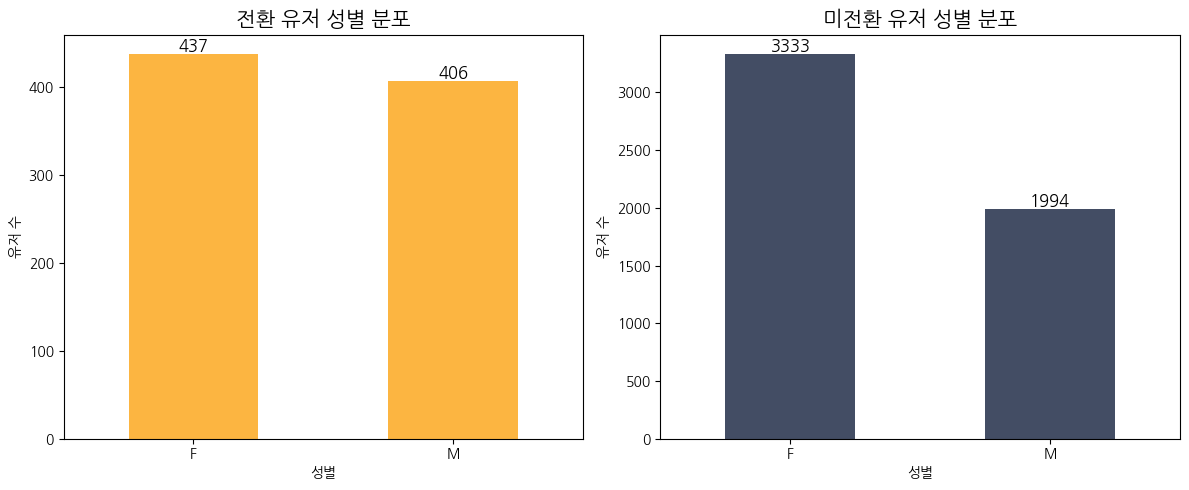

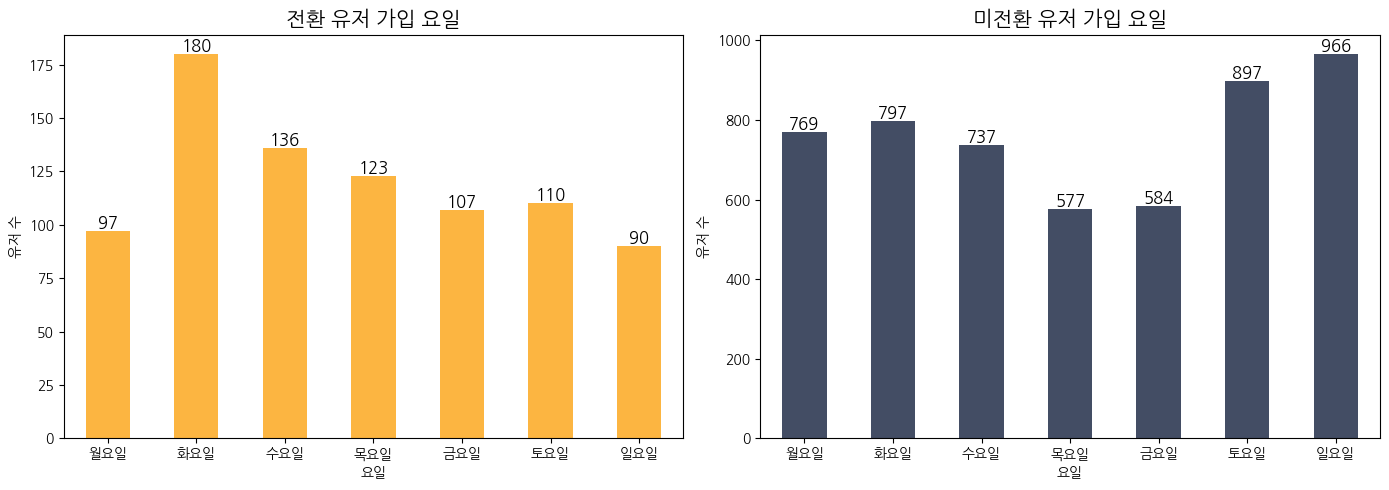

In [103]:
# ÏÑ±Î≥Ñ Î∂ÑÌè¨ (xÏ∂ï ÎùºÎ≤® 0ÎèÑ, Î∞î ÏúÑÏóê ÏàòÏπò ÌëúÏãú)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
converted_gender_counts = converted_info['gender'].value_counts()
not_converted_gender_counts = not_converted_info['gender'].value_counts()

converted_gender_counts.plot(kind='bar', ax=axes[0], color='#fca311', alpha=0.8)
axes[0].set_title('Ï†ÑÌôò Ïú†Ï†Ä ÏÑ±Î≥Ñ Î∂ÑÌè¨', fontsize=15)
axes[0].set_xlabel('ÏÑ±Î≥Ñ')
axes[0].set_ylabel('Ïú†Ï†Ä Ïàò')
axes[0].tick_params(axis='x', labelrotation=0)
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=12)

not_converted_gender_counts.plot(kind='bar', ax=axes[1], color='#14213d', alpha=0.8)
axes[1].set_title('ÎØ∏Ï†ÑÌôò Ïú†Ï†Ä ÏÑ±Î≥Ñ Î∂ÑÌè¨', fontsize=15)
axes[1].set_xlabel('ÏÑ±Î≥Ñ')
axes[1].set_ylabel('Ïú†Ï†Ä Ïàò')
axes[1].tick_params(axis='x', labelrotation=0)
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Í∞ÄÏûÖ ÏöîÏùº Î∂ÑÌè¨ (xÏ∂ï ÎùºÎ≤® 0ÎèÑ, Î∞î ÏúÑÏóê ÏàòÏπò ÌëúÏãú)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
converted_weekday_counts = converted_info['signup_dayofweek_kor'].value_counts().reindex(order_kor)
not_converted_weekday_counts = not_converted_info['signup_dayofweek_kor'].value_counts().reindex(order_kor)

converted_weekday_counts.plot(kind='bar', ax=axes[0], color='#fca311', alpha=0.8)
axes[0].set_title('Ï†ÑÌôò Ïú†Ï†Ä Í∞ÄÏûÖ ÏöîÏùº', fontsize=15)
axes[0].set_xlabel('ÏöîÏùº')
axes[0].set_ylabel('Ïú†Ï†Ä Ïàò')
axes[0].tick_params(axis='x', labelrotation=0)
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=12)

not_converted_weekday_counts.plot(kind='bar', ax=axes[1], color='#14213d', alpha=0.8)
axes[1].set_title('ÎØ∏Ï†ÑÌôò Ïú†Ï†Ä Í∞ÄÏûÖ ÏöîÏùº', fontsize=15)
axes[1].set_xlabel('ÏöîÏùº')
axes[1].set_ylabel('Ïú†Ï†Ä Ïàò')
axes[1].tick_params(axis='x', labelrotation=0)
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

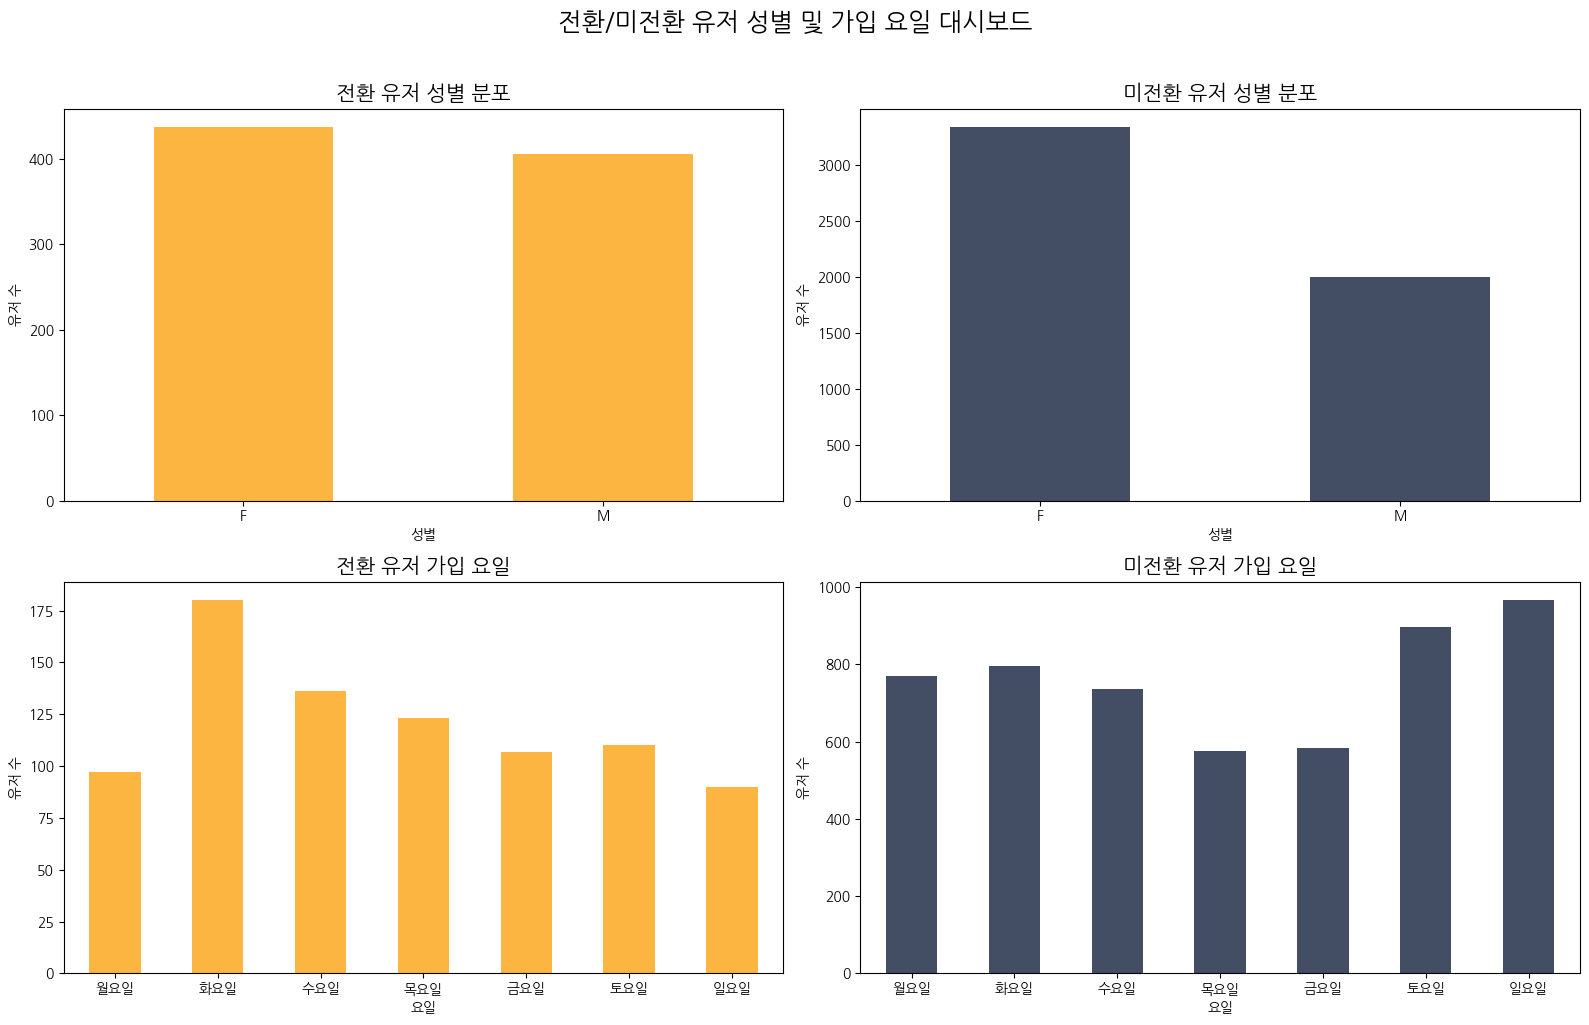

In [73]:
import matplotlib.gridspec as gridspec

# ÎåÄÏãúÎ≥¥Îìú Ïä§ÌÉÄÏùºÎ°ú 2x2 Í∑∏Î¶¨ÎìúÏóê Í∑∏ÎûòÌîÑ Î∞∞Ïπò
fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

# 1. Ï†ÑÌôò Ïú†Ï†Ä ÏÑ±Î≥Ñ Î∂ÑÌè¨
ax1 = fig.add_subplot(gs[0, 0])
converted_info['gender'].value_counts().plot(kind='bar', ax=ax1, color='#fca311', alpha=0.8)
ax1.set_title('Ï†ÑÌôò Ïú†Ï†Ä ÏÑ±Î≥Ñ Î∂ÑÌè¨', fontsize=15)
ax1.set_xlabel('ÏÑ±Î≥Ñ')
ax1.set_ylabel('Ïú†Ï†Ä Ïàò')
ax1.tick_params(axis='x', labelrotation=0)

# 2. ÎØ∏Ï†ÑÌôò Ïú†Ï†Ä ÏÑ±Î≥Ñ Î∂ÑÌè¨
ax2 = fig.add_subplot(gs[0, 1])
not_converted_info['gender'].value_counts().plot(kind='bar', ax=ax2, color='#14213d', alpha=0.8)
ax2.set_title('ÎØ∏Ï†ÑÌôò Ïú†Ï†Ä ÏÑ±Î≥Ñ Î∂ÑÌè¨', fontsize=15)
ax2.set_xlabel('ÏÑ±Î≥Ñ')
ax2.set_ylabel('Ïú†Ï†Ä Ïàò')
ax2.tick_params(axis='x', labelrotation=0)

# 3. Ï†ÑÌôò Ïú†Ï†Ä Í∞ÄÏûÖ ÏöîÏùº Î∂ÑÌè¨
ax3 = fig.add_subplot(gs[1, 0])
converted_info['signup_dayofweek_kor'].value_counts().reindex(order_kor).plot(kind='bar', ax=ax3, color='#fca311', alpha=0.8)
ax3.set_title('Ï†ÑÌôò Ïú†Ï†Ä Í∞ÄÏûÖ ÏöîÏùº', fontsize=15)
ax3.set_xlabel('ÏöîÏùº')
ax3.set_ylabel('Ïú†Ï†Ä Ïàò')
ax3.tick_params(axis='x', labelrotation=0)

# 4. ÎØ∏Ï†ÑÌôò Ïú†Ï†Ä Í∞ÄÏûÖ ÏöîÏùº Î∂ÑÌè¨
ax4 = fig.add_subplot(gs[1, 1])
not_converted_info['signup_dayofweek_kor'].value_counts().reindex(order_kor).plot(kind='bar', ax=ax4, color='#14213d', alpha=0.8)
ax4.set_title('ÎØ∏Ï†ÑÌôò Ïú†Ï†Ä Í∞ÄÏûÖ ÏöîÏùº', fontsize=15)
ax4.set_xlabel('ÏöîÏùº')
ax4.set_ylabel('Ïú†Ï†Ä Ïàò')
ax4.tick_params(axis='x', labelrotation=0)

plt.suptitle('Ï†ÑÌôò/ÎØ∏Ï†ÑÌôò Ïú†Ï†Ä ÏÑ±Î≥Ñ Î∞è Í∞ÄÏûÖ ÏöîÏùº ÎåÄÏãúÎ≥¥Îìú', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

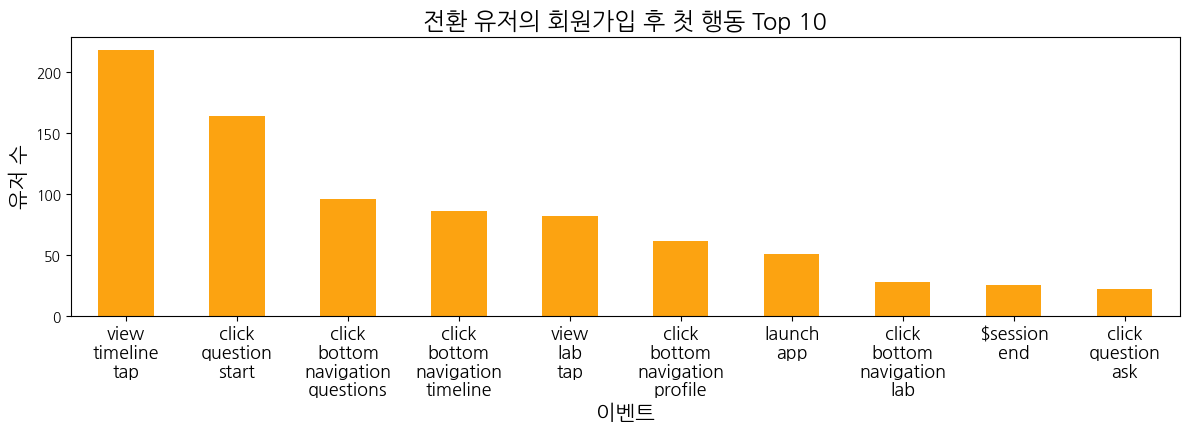

In [74]:
# xÏ∂ï ÎùºÎ≤®ÏùÑ Îçî ÏùΩÍ∏∞ ÏâΩÍ≤å Ï§ÑÎ∞îÍøà Ï≤òÎ¶¨ Î∞è Ìè∞Ìä∏ ÌÅ¨Í∏∞/Í∞ÑÍ≤© Ï°∞Ï†ï
plt.figure(figsize=(12, 6))
ax = first_actions.head(10).plot(kind='bar', color='#fca311')
plt.title('Ï†ÑÌôò Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Ï≤´ ÌñâÎèô Top 10', fontsize=17)
plt.xlabel('Ïù¥Î≤§Ìä∏', fontsize=15)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=15)
plt.tight_layout()
ax.set_xticklabels([label.replace('_', '\n') for label in first_actions.head(10).index], rotation=0, fontsize=13)
plt.show()

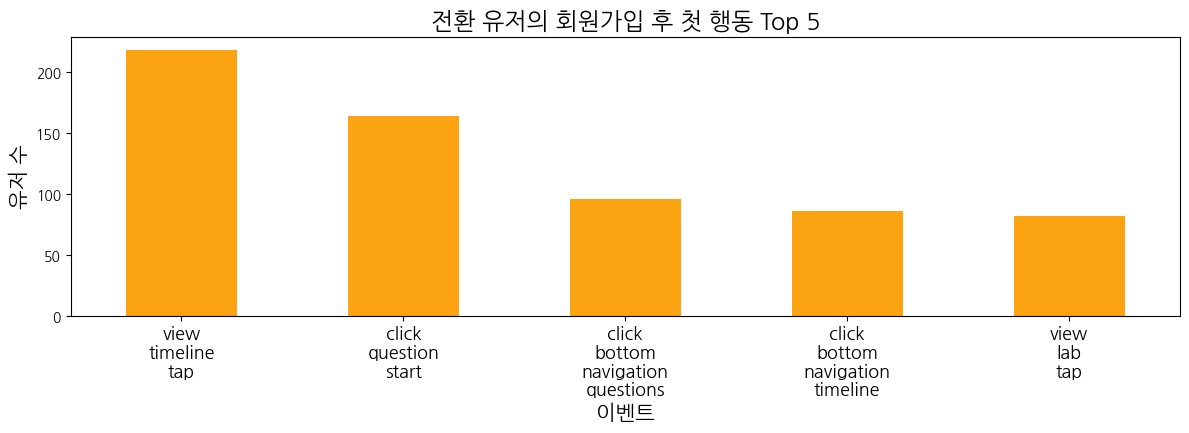

In [75]:
# xÏ∂ï ÎùºÎ≤®ÏùÑ Îçî ÏùΩÍ∏∞ ÏâΩÍ≤å Ï§ÑÎ∞îÍøà Ï≤òÎ¶¨ Î∞è Ìè∞Ìä∏ ÌÅ¨Í∏∞/Í∞ÑÍ≤© Ï°∞Ï†ï (Top 5Îßå)
plt.figure(figsize=(12, 6))
ax = first_actions.head(5).plot(kind='bar', color='#fca311')
plt.title('Ï†ÑÌôò Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Ï≤´ ÌñâÎèô Top 5', fontsize=17)
plt.xlabel('Ïù¥Î≤§Ìä∏', fontsize=15)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=15)
plt.tight_layout()
ax.set_xticklabels([label.replace('_', '\n') for label in first_actions.head(5).index], rotation=0, fontsize=13)
plt.show()

In [102]:
# 1. Ï†ÑÏ≤¥ view_signup Ïú†Ï†Ä Î™©Î°ùÏóêÏÑú complete_signupÏùÑ ÌïòÏßÄ ÏïäÏùÄ Ïú†Ï†Ä Ï∂îÏ∂ú (user_idÎäî Î¨∏ÏûêÏó¥Î°ú ÌÜµÏùº)
all_view_signup_user_ids = set(view_signup_users.astype(str))
converted_user_ids = set(view_to_complete_users.astype(str))
not_converted_user_ids = list(all_view_signup_user_ids - converted_user_ids)

# 2. Ï†ÑÏ≤¥ Ïù¥Î≤§Ìä∏ Î°úÍ∑∏ÏóêÏÑú ÌöåÏõêÍ∞ÄÏûÖÌïòÏßÄ ÏïäÏùÄ Ïú†Ï†ÄÏùò Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú
not_converted_events = final_hackle_df[
    final_hackle_df['user_id'].astype(str).isin(not_converted_user_ids)
].copy()

# 3. view_signup Ïù¥ÌõÑ Ï≤´ ÌñâÎèô Ï∂îÏ∂ú Ìï®Ïàò Ï†ïÏùò
def get_first_action_after_view_signup(df):
    if (df['event_key'] == 'view_signup').any():
        view_signup_time = df[df['event_key'] == 'view_signup']['event_datetime'].min()
        after_view_signup = df[df['event_datetime'] > view_signup_time]['event_key']
        if not after_view_signup.empty:
            return after_view_signup.iloc[0]
        else:
            return None
    else:
        return None

# 4. Ïú†Ï†ÄÎ≥ÑÎ°ú Ï†ïÎ†¨ ÌõÑ Ï†ÅÏö©
first_actions_not_converted = (
    not_converted_events.sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')
    .apply(get_first_action_after_view_signup)
    .value_counts()
)

# 5. Í≤∞Í≥º Ï∂úÎ†•
print("\n‚ùå ÎπÑÏ†ÑÌôò Ïú†Ï†ÄÏùò view_signup Ïù¥ÌõÑ Ï≤´ ÌñâÎèô Top 10:")
print(first_actions_not_converted.head(10))


‚ùå ÎπÑÏ†ÑÌôò Ïú†Ï†ÄÏùò view_signup Ïù¥ÌõÑ Ï≤´ ÌñâÎèô Top 10:
view_signup          5626
launch_app             18
$session_end           11
$session_start         10
view_login              2
view_timeline_tap       1
Name: count, dtype: int64


### ÏïÑÎûòÎäî Î∞úÌëúÏóêÏÑú Ï†úÏô∏Îêú ÎÇ¥Ïö©Îì§
---

In [76]:
# ÌôúÏÑ±ÌôîÏú® Í≥ÑÏÇ∞ Î∞©Ïãù ÏÑ§Î™Ö
# summary['activation_rate'] = summary['activated'] / summary['signups']
# Ï¶â, Í∞Å Í∑∏Î£π(ÌèâÏùº/Ï£ºÎßê, ÏãúÍ∞ÑÎåÄ)Î≥ÑÎ°ú ÌöåÏõêÍ∞ÄÏûÖÏûê Ï§ë 'ÌôúÏÑ±Ìôî Ïù¥Î≤§Ìä∏'Î•º Ìïú Ïú†Ï†Ä ÎπÑÏú®ÏûÖÎãàÎã§.

# ÌöåÏõêÍ∞ÄÏûÖ Ïù¥ÌõÑ ÏµúÏ¥à 5Í∞ú Ïù¥Î≤§Ìä∏ ÏßëÍ≥Ñ (Í∞ÄÏûÖÏûêÎ≥Ñ)
# 1. accounts_userÏùò idÏôÄ user_idÍ∞Ä ÎèôÏùºÌïòÎØÄÎ°ú, Í∞ÄÏûÖ ÏãúÍ∞Å Ïù¥ÌõÑÏùò Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú
# 2. Í∞Å Í∞ÄÏûÖÏûêÎ≥ÑÎ°ú Í∞ÄÏûÖ Ïù¥ÌõÑ Î∞úÏÉùÌïú Ïù¥Î≤§Ìä∏ Ï§ë ÏÉÅÏúÑ 5Í∞úÎ•º ÏßëÍ≥Ñ

In [77]:
# Î¨∏Ï†ú ÏõêÏù∏: signup_users_events_after_signupÏù¥ Îπà Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù∏ Ïù¥Ïú†Îäî
# accounts_user['id']ÏôÄ signup_users_all_events['user_id']Ïùò ÌÉÄÏûÖ ÎòêÎäî Í∞íÏù¥ Ï†ïÌôïÌûà ÏùºÏπòÌïòÏßÄ ÏïäÍ±∞ÎÇò,
# signup_time.get(row['user_id'], pd.NaT)ÏóêÏÑú user_idÍ∞Ä ÏóÜÏñ¥ÏÑú Î™®Îëê NaTÍ∞Ä Î∞òÌôòÎê† Ïàò ÏûàÏäµÎãàÎã§.

# 1. user_idÏôÄ idÏùò ÌÉÄÏûÖÏùÑ Î™®Îëê strÎ°ú ÎßûÏ∂îÍ∏∞
accounts_user['id'] = accounts_user['id'].astype(str)
signup_users_all_events['user_id'] = signup_users_all_events['user_id'].astype(str)

# 2. Í∞ÄÏûÖ ÏãúÍ∞Å Ï†ïÎ≥¥ Ï§ÄÎπÑ (idÎ•º strÎ°ú)
signup_time = accounts_user.set_index('id')['created_at_plus_9'].astype('datetime64[ns]')

# 3. Í∞ÄÏûÖÏûêÎ≥Ñ Í∞ÄÏûÖ Ïù¥ÌõÑ Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú
signup_users_events_after_signup = signup_users_all_events[
    signup_users_all_events.apply(
        lambda row: pd.to_datetime(row['event_datetime']) >= signup_time.get(str(row['user_id']), pd.NaT), axis=1
    )
]

# 4. Í∞ÄÏûÖÏûêÎ≥Ñ Í∞ÄÏûÖ Ïù¥ÌõÑ ÏµúÏ¥à 5Í∞ú Ïù¥Î≤§Ìä∏ Ï∂îÏ∂ú
first5_events = (
    signup_users_events_after_signup
    .sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')
    .head(5)
)

# 5. Ïù¥Î≤§Ìä∏Î≥Ñ ÎπàÎèÑ ÏßëÍ≥Ñ
event_counts = first5_events['event_key'].value_counts()
print("ÌöåÏõêÍ∞ÄÏûÖ Ïù¥ÌõÑ ÏµúÏ¥à 5Í∞ú Ïù¥Î≤§Ìä∏Î≥Ñ ÎπàÎèÑ:")
print(event_counts.head(20))

/tmp/ipykernel_203008/2109964041.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signup_users_all_events['user_id'] = signup_users_all_events['user_id'].astype(str)


ÌöåÏõêÍ∞ÄÏûÖ Ïù¥ÌõÑ ÏµúÏ¥à 5Í∞ú Ïù¥Î≤§Ìä∏Î≥Ñ ÎπàÎèÑ:
event_key
$session_start                       570
complete_signup                      553
view_timeline_tap                    507
view_lab_tap                         478
click_bottom_navigation_timeline     270
click_bottom_navigation_profile      244
click_bottom_navigation_questions    235
click_question_start                 226
skip_question                        183
click_bottom_navigation_lab          144
view_profile_tap                     111
launch_app                           105
click_question_ask                    84
complete_question                     68
view_questions_tap                    64
$session_end                          60
click_appbar_chat_rooms               31
click_attendance                      27
click_appbar_friend_plus              17
view_signup                           14
Name: count, dtype: int64


In [78]:
# user_idÎ≥ÑÎ°ú complete_signupÏù¥ Ïó¨Îü¨ Î≤à ÏûàÎäî Í≤ΩÏö∞, ÎßàÏßÄÎßâ complete_signup Ïù¥ÌõÑ 5Í∞ú Ïù¥Î≤§Ìä∏Îßå ÏßëÍ≥Ñ

# 1. user_idÏôÄ idÏùò ÌÉÄÏûÖÏùÑ Î™®Îëê strÎ°ú ÎßûÏ∂îÍ∏∞ (Ïù¥ÎØ∏ ÎßûÏ∂∞Ï†∏ ÏûàÏúºÎ©¥ ÏÉùÎûµ Í∞ÄÎä•)
accounts_user['id'] = accounts_user['id'].astype(str)
signup_users_all_events['user_id'] = signup_users_all_events['user_id'].astype(str)

# 2. Í∞ÄÏûÖ ÏãúÍ∞Å Ï†ïÎ≥¥ Ï§ÄÎπÑ (idÎ•º strÎ°ú)
signup_time = accounts_user.set_index('id')['created_at_plus_9'].astype('datetime64[ns]')

# 3. user_idÎ≥ÑÎ°ú ÎßàÏßÄÎßâ complete_signup ÏãúÍ∞Å Ï∂îÏ∂ú
last_signup_time = (
    signup_users_all_events[signup_users_all_events['event_key'] == 'complete_signup']
    .sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')['event_datetime']
    .max()
)

# 4. ÎßàÏßÄÎßâ complete_signup Ïù¥ÌõÑ Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú
def after_last_signup(df):
    uid = df['user_id'].iloc[0]
    last_time = last_signup_time.get(uid, pd.NaT)
    if pd.isna(last_time):
        return pd.DataFrame()
    return df[df['event_datetime'] > last_time]

signup_users_events_sorted = signup_users_all_events.sort_values(['user_id', 'event_datetime'])
events_after_last_signup = (
    signup_users_events_sorted.groupby('user_id', group_keys=False)
    .apply(after_last_signup)
)

# 5. user_idÎ≥ÑÎ°ú ÎßàÏßÄÎßâ complete_signup Ïù¥ÌõÑ ÏµúÏ¥à 5Í∞ú Ïù¥Î≤§Ìä∏ Ï∂îÏ∂ú
first5_events_after_last_signup = (
    events_after_last_signup
    .sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')
    .head(5)
)

# 6. Ïù¥Î≤§Ìä∏Î≥Ñ ÎπàÎèÑ ÏßëÍ≥Ñ
event_counts = first5_events_after_last_signup['event_key'].value_counts()
print("ÎßàÏßÄÎßâ complete_signup Ïù¥ÌõÑ ÏµúÏ¥à 5Í∞ú Ïù¥Î≤§Ìä∏Î≥Ñ ÎπàÎèÑ:")
print(event_counts.head(20))

/tmp/ipykernel_203008/245444692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signup_users_all_events['user_id'] = signup_users_all_events['user_id'].astype(str)


ÎßàÏßÄÎßâ complete_signup Ïù¥ÌõÑ ÏµúÏ¥à 5Í∞ú Ïù¥Î≤§Ìä∏Î≥Ñ ÎπàÎèÑ:
event_key
view_lab_tap                         781
view_timeline_tap                    754
click_bottom_navigation_profile      408
click_bottom_navigation_timeline     387
click_bottom_navigation_questions    382
click_bottom_navigation_lab          287
skip_question                        282
click_question_start                 264
view_profile_tap                     220
click_question_ask                   125
launch_app                           125
view_questions_tap                   112
complete_question                     97
$session_end                          71
$session_start                        64
click_appbar_chat_rooms               42
click_appbar_setting                  37
click_attendance                      32
click_appbar_friend_plus              31
view_signup                           21
Name: count, dtype: int64


ÏúÑ Í≤ΩÏö∞Î•º Î≥¥Î©¥ ÏÉùÍ∞ÅÎ≥¥Îã§ Ïã§ÌóòÏã§ ÌÉ≠Ïóê Îì§Ïñ¥Í∞ÄÎäî Í≤ΩÏö∞Í∞Ä ÎßéÏùÄÎç∞ Í∑∏Î†áÎã§Î©¥ Ïã§ÌóòÏã§Ïóê Îã§ÏñëÌïú Í∏∞Îä•Ïù¥ ÏûàÎäîÏßÄ ÌôïÏù∏ Î∞è Ìï¥Î≥¥Í≥† Ïã∂ÏùÄ ÌñâÎèôÎì§Ïù¥ ÏûàÏùÑ Ïàò ÏûáÏùå     
-> Ïã§ÌóòÏã§Ïóê ÎåÄÌï¥ÏÑú ÎßåÏ°±ÎèÑ == Ïã§ÌóòÏã§Ïóê Î®∏Î¨¥Îäî ÏãúÍ∞ÑÏù¥ Í∏¥Í∞Ä?
- Ïã§ÌóòÏã§ ÌÉ≠Ïóê Îì§Ïñ¥Í∞ÄÏÑú Î®∏Î¨¥Îäî ÏãúÍ∞ÑÏù¥ Í∏¥ Ïú†Ï†ÄÏôÄ ÏßßÏùÄ Ïú†Ï†ÄÏùò Ï∞®Ïù¥?

   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        102            0.189
1       False     Night   178965        232            0.130
2       False     Other   211760        275            0.130
3        True     Lunch    37907         32            0.084
4        True     Night    99098         80            0.081
5        True     Other    95425         77            0.081


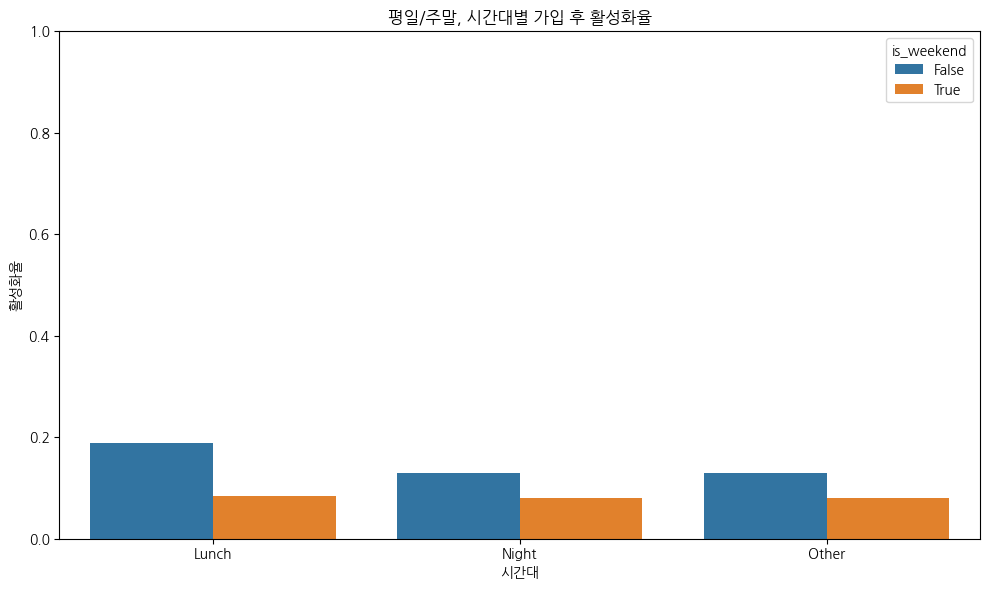

In [79]:
# ÌèâÏùº/Ï£ºÎßê, ÏãúÍ∞ÑÎåÄÎ≥Ñ Í∞ÄÏûÖÏûê Ïàò Î∞è Ïù¥ÌõÑ ÌôúÏÑ±ÌôîÏú®(Ïòà: Ï≤´ ÌôúÏÑ±Ìôî Ïù¥Î≤§Ìä∏ Î∞úÏÉù ÎπÑÏú®) ÎπÑÍµê

# 1. Í∞ÄÏûÖÏûê Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏöîÏùº/ÏãúÍ∞ÑÎåÄ Ïª¨Îüº ÏÉùÏÑ±
accounts_user['weekday'] = accounts_user['created_at_plus_9'].dt.day_name()
accounts_user['hour'] = accounts_user['created_at_plus_9'].dt.hour

# ÌèâÏùº/Ï£ºÎßê Íµ¨Î∂Ñ
accounts_user['is_weekend'] = accounts_user['weekday'].isin(['Saturday', 'Sunday'])

# ÏãúÍ∞ÑÎåÄ Íµ¨Î∂Ñ (Ïòà: Î∞§(21~6), Ï†êÏã¨(11~14), Í∏∞ÌÉÄ)
def time_slot(hour):
    if 21 <= hour or hour < 6:
        return 'Night'
    elif 11 <= hour < 15:
        return 'Lunch'
    else:
        return 'Other'
accounts_user['time_slot'] = accounts_user['hour'].apply(time_slot)

# 2. Í∞ÄÏûÖÏûêÎ≥Ñ Ï≤´ ÌôúÏÑ±Ìôî(Activation) Ïù¥Î≤§Ìä∏ Î∞úÏÉù Ïó¨Î∂Ä ÏßëÍ≥Ñ
activation_keys = ['view_lab_tap', 'click_bottom_navigation_questions', 'click_bottom_navigation_timeline'
                   ,'view_timeline_tap', 'click_bottom_navigation_profile', 'click_bottom_navigation_lab'
                   , 'skip_question', 'click_question_start', 'view_profile_tap','click_question_ask']

# Í∞ÄÏûÖÏûê user_idÎ≥ÑÎ°ú Ï≤´ ÌôúÏÑ±Ìôî Ïù¥Î≤§Ìä∏ Î∞úÏÉù Ïó¨Î∂Ä
activation_df = signup_users_all_events[signup_users_all_events['event_key'].isin(activation_keys)]
activated_users = activation_df['user_id'].unique()
accounts_user['activated'] = accounts_user['id'].astype(str).isin(activated_users)

# 3. ÌèâÏùº/Ï£ºÎßê, ÏãúÍ∞ÑÎåÄÎ≥Ñ Í∞ÄÏûÖÏûê Ïàò Î∞è ÌôúÏÑ±ÌôîÏú® ÏßëÍ≥Ñ
summary = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated', 'sum'))
    .reset_index()
)
summary['activation_rate'] = round(summary['activated'] / summary['signups'] * 100,3)

print(summary)

# 4. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(
    data=summary,
    x='time_slot',
    y='activation_rate',
    hue='is_weekend'
)
plt.title('ÌèâÏùº/Ï£ºÎßê, ÏãúÍ∞ÑÎåÄÎ≥Ñ Í∞ÄÏûÖ ÌõÑ ÌôúÏÑ±ÌôîÏú®')
plt.ylabel('ÌôúÏÑ±ÌôîÏú®')
plt.xlabel('ÏãúÍ∞ÑÎåÄ')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

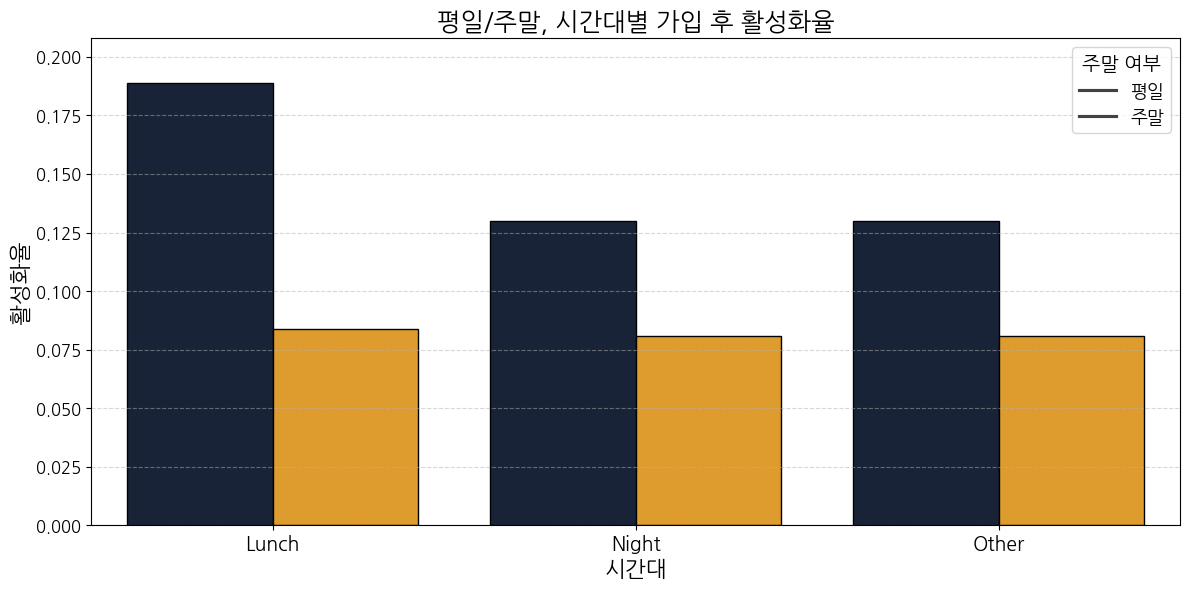

In [80]:
# ÌèâÏùº/Ï£ºÎßê, ÏãúÍ∞ÑÎåÄÎ≥Ñ Í∞ÄÏûÖ ÌõÑ ÌôúÏÑ±ÌôîÏú® ÏãúÍ∞ÅÌôî (ÎîîÏûêÏù∏/Ìè∞Ìä∏/Ïª¨Îü¨ Í∑úÍ≤© Ï†ÅÏö©)

plt.figure(figsize=(12, 6))
bar_colors = ['#14213d', '#fca311']  # ÌèâÏùº/Ï£ºÎßê Ïª¨Îü¨
sns.barplot(
    data=summary,
    x='time_slot',
    y='activation_rate',
    hue='is_weekend',
    palette=bar_colors,
    edgecolor='black'
)
plt.title('ÌèâÏùº/Ï£ºÎßê, ÏãúÍ∞ÑÎåÄÎ≥Ñ Í∞ÄÏûÖ ÌõÑ ÌôúÏÑ±ÌôîÏú®', fontsize=18)
plt.ylabel('ÌôúÏÑ±ÌôîÏú®', fontsize=16)
plt.xlabel('ÏãúÍ∞ÑÎåÄ', fontsize=16)
plt.ylim(0, summary['activation_rate'].max() * 1.1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.legend(title='Ï£ºÎßê Ïó¨Î∂Ä', labels=['ÌèâÏùº', 'Ï£ºÎßê'], fontsize=13, title_fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5, axis='y')
plt.tight_layout()
plt.show()

ÌôúÏÑ±Ìôî Ïù¥Î≤§Ìä∏(activation_keys)Ïóê Ìè¨Ìï®Îêú Ïù¥Î≤§Ìä∏Í∞Ä ÎÑàÎ¨¥ Ï†úÌïúÏ†ÅÏù¥Í±∞ÎÇò, Ïã§Ï†úÎ°ú Í∞ÄÏûÖ ÏßÅÌõÑ Î∞úÏÉùÌïòÎäî Ïù¥Î≤§Ìä∏ÏôÄ ÎßûÏßÄ ÏïäÏùÑ Ïàò ÏûàÏäµÎãàÎã§. ÎòêÎäî 'activated' Ï°∞Í±¥Ïù¥ ÎÑàÎ¨¥ ÏóÑÍ≤©Ìï† Ïàò ÏûàÏäµÎãàÎã§.

### ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ ÌôúÏÑ±ÌôîÏú®Ïóê ÎåÄÌïú ÎÇ¥Ïö©(ÏãúÍ∞ÑÏóê Îî∞Î•∏ ÌïúÎ≤àÏù¥ÎùºÎèÑ Ïù¥Î≤§Ìä∏ Î∞úÏÉùÌñàÎäîÏßÄ Ïó¨Î∂Ä)
---

In [81]:
# 1. Í∞ÄÏûÖ ÏãúÍ∞Å Ï∂îÏ∂ú
signup_time = accounts_user[['id', 'created_at_plus_9']].copy()
signup_time['created_at_plus_9'] = pd.to_datetime(signup_time['created_at_plus_9'])
signup_time = signup_time.rename(columns={'id': 'user_id', 'created_at_plus_9': 'signup_time'})

# 2. Ïù¥Î≤§Ìä∏ ÌÖåÏù¥Î∏îÍ≥º Í∞ÄÏûÖ ÏãúÍ∞Å Ï°∞Ïù∏
events = signup_users_all_events.copy()
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events = events.merge(signup_time, on='user_id', how='left')

# 3. Í∞ÄÏûÖ ÌõÑ 5Î∂Ñ Ïù¥ÎÇ¥ Ïù¥Î≤§Ìä∏ ÌïÑÌÑ∞ÎßÅ
events['within_5min'] = (
    (events['event_datetime'] > events['signup_time']) &
    (events['event_datetime'] <= events['signup_time'] + pd.Timedelta(minutes=5))
)

# 4. 5Î∂Ñ Ïù¥ÎÇ¥ Ïù¥Î≤§Ìä∏Í∞Ä ÏûàÎäî user_id Ï∂îÏ∂ú
activated_users = events.loc[events['within_5min'], 'user_id'].drop_duplicates()

# 5. ÌôúÏÑ±Ìôî Ïó¨Î∂Ä Ïª¨Îüº ÏÉùÏÑ±
accounts_user['activated_5min'] = accounts_user['id'].astype(str).isin(activated_users)

# 6. Í∑∏Î£πÎ≥Ñ ÌôúÏÑ±ÌôîÏú® ÏßëÍ≥Ñ
summary_5min = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated_5min', 'sum'))
    .reset_index()
)
summary_5min['activation_rate'] = round(summary_5min['activated'] / summary_5min['signups'] * 100,3)

print(summary_5min)


   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        104            0.193
1       False     Night   178965        239            0.134
2       False     Other   211760        276            0.130
3        True     Lunch    37907         30            0.079
4        True     Night    99098         76            0.077
5        True     Other    95425         83            0.087


In [82]:
# 1. Í∞ÄÏûÖ ÏãúÍ∞Å Ï∂îÏ∂ú
signup_time = accounts_user[['id', 'created_at_plus_9']].copy()
signup_time['created_at_plus_9'] = pd.to_datetime(signup_time['created_at_plus_9'])
signup_time = signup_time.rename(columns={'id': 'user_id', 'created_at_plus_9': 'signup_time'})

# 2. Ïù¥Î≤§Ìä∏ ÌÖåÏù¥Î∏îÍ≥º Í∞ÄÏûÖ ÏãúÍ∞Å Ï°∞Ïù∏
events = signup_users_all_events.copy()
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events = events.merge(signup_time, on='user_id', how='left')

# 3. Í∞ÄÏûÖ ÌõÑ 10Î∂Ñ Ïù¥ÎÇ¥ Ïù¥Î≤§Ìä∏ ÌïÑÌÑ∞ÎßÅ
events['within_10min'] = (
    (events['event_datetime'] > events['signup_time']) &
    (events['event_datetime'] <= events['signup_time'] + pd.Timedelta(minutes=10))
)

# 4. 10Î∂Ñ Ïù¥ÎÇ¥ Ïù¥Î≤§Ìä∏Í∞Ä ÏûàÎäî user_id Ï∂îÏ∂ú
activated_users = events.loc[events['within_10min'], 'user_id'].drop_duplicates()

# 5. ÌôúÏÑ±Ìôî Ïó¨Î∂Ä Ïª¨Îüº ÏÉùÏÑ±
accounts_user['activated_10min'] = accounts_user['id'].astype(str).isin(activated_users)

# 6. Í∑∏Î£πÎ≥Ñ ÌôúÏÑ±ÌôîÏú® ÏßëÍ≥Ñ
summary_10min = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated_10min', 'sum'))
    .reset_index()
)
summary_10min['activation_rate'] = round(summary_10min['activated'] / summary_10min['signups'],3)

print(summary_10min)


   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        105            0.002
1       False     Night   178965        240            0.001
2       False     Other   211760        278            0.001
3        True     Lunch    37907         30            0.001
4        True     Night    99098         76            0.001
5        True     Other    95425         83            0.001


In [83]:
# 1. Í∞ÄÏûÖ ÏãúÍ∞Å Ï∂îÏ∂ú
signup_time = accounts_user[['id', 'created_at_plus_9']].copy()
signup_time['created_at_plus_9'] = pd.to_datetime(signup_time['created_at_plus_9'])
signup_time = signup_time.rename(columns={'id': 'user_id', 'created_at_plus_9': 'signup_time'})

# 2. Ïù¥Î≤§Ìä∏ ÌÖåÏù¥Î∏îÍ≥º Í∞ÄÏûÖ ÏãúÍ∞Å Ï°∞Ïù∏
events = signup_users_all_events.copy()
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events = events.merge(signup_time, on='user_id', how='left')

# 3. Í∞ÄÏûÖ ÌõÑ 30Î∂Ñ Ïù¥ÎÇ¥ Ïù¥Î≤§Ìä∏ ÌïÑÌÑ∞ÎßÅ
events['within_30min'] = (
    (events['event_datetime'] > events['signup_time']) &
    (events['event_datetime'] <= events['signup_time'] + pd.Timedelta(minutes=30))
)

# 4. 30Î∂Ñ Ïù¥ÎÇ¥ Ïù¥Î≤§Ìä∏Í∞Ä ÏûàÎäî user_id Ï∂îÏ∂ú
activated_users = events.loc[events['within_30min'], 'user_id'].drop_duplicates()

# 5. ÌôúÏÑ±Ìôî Ïó¨Î∂Ä Ïª¨Îüº ÏÉùÏÑ±
accounts_user['activated_30min'] = accounts_user['id'].astype(str).isin(activated_users)

# 6. Í∑∏Î£πÎ≥Ñ ÌôúÏÑ±ÌôîÏú® ÏßëÍ≥Ñ
summary_30min = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated_30min', 'sum'))
    .reset_index()
)
summary_30min['activation_rate'] = round(summary_30min['activated'] / summary_30min['signups'] * 100,3)

print(summary_30min)


   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        105            0.195
1       False     Night   178965        241            0.135
2       False     Other   211760        278            0.131
3        True     Lunch    37907         30            0.079
4        True     Night    99098         76            0.077
5        True     Other    95425         83            0.087


In [84]:
# 1. Í∞ÄÏûÖ ÏãúÍ∞Å Ï∂îÏ∂ú
signup_time = accounts_user[['id', 'created_at_plus_9']].copy()
signup_time['created_at_plus_9'] = pd.to_datetime(signup_time['created_at_plus_9'])
signup_time = signup_time.rename(columns={'id': 'user_id', 'created_at_plus_9': 'signup_time'})

# 2. Ïù¥Î≤§Ìä∏ ÌÖåÏù¥Î∏îÍ≥º Í∞ÄÏûÖ ÏãúÍ∞Å Ï°∞Ïù∏
events = signup_users_all_events.copy()
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events = events.merge(signup_time, on='user_id', how='left')

# 3. Í∞ÄÏûÖ ÌõÑ 1ÏãúÍ∞Ñ Ïù¥ÎÇ¥ Ïù¥Î≤§Ìä∏ ÌïÑÌÑ∞ÎßÅ
events['within_1hour'] = (
    (events['event_datetime'] > events['signup_time']) &
    (events['event_datetime'] <= events['signup_time'] + pd.Timedelta(hours=1))
)

# 4. 1ÏãúÍ∞Ñ Ïù¥ÎÇ¥ Ïù¥Î≤§Ìä∏Í∞Ä ÏûàÎäî user_id Ï∂îÏ∂ú
activated_users = events.loc[events['within_1hour'], 'user_id'].drop_duplicates()

# 5. ÌôúÏÑ±Ìôî Ïó¨Î∂Ä Ïª¨Îüº ÏÉùÏÑ±
accounts_user['activated_1hour'] = accounts_user['id'].astype(str).isin(activated_users)

# 6. Í∑∏Î£πÎ≥Ñ ÌôúÏÑ±ÌôîÏú® ÏßëÍ≥Ñ
summary_1hour = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated_1hour', 'sum'))
    .reset_index()
)
summary_1hour['activation_rate'] = round(summary_1hour['activated'] / summary_1hour['signups'] *100,3)

print(summary_1hour)


   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        105            0.195
1       False     Night   178965        241            0.135
2       False     Other   211760        278            0.131
3        True     Lunch    37907         30            0.079
4        True     Night    99098         77            0.078
5        True     Other    95425         83            0.087


In [85]:
events_copy = events.copy()
accounts_copy = accounts_user.copy()

In [86]:
def time_event_activation_summary(time_unit: str, amount: int):
    # time_unit: 'minutes' ÎòêÎäî 'hours'
    delta = pd.Timedelta(**{time_unit: amount})  # ÎèôÏ†ÅÏúºÎ°ú Ï≤òÎ¶¨
    

    # 3. Í∞ÄÏûÖ ÌõÑ ÏßÄÏ†ï ÏãúÍ∞Ñ Ïù¥ÎÇ¥ Ïù¥Î≤§Ìä∏ ÌïÑÌÑ∞ÎßÅ
    events_copy['within_time'] = (
        (events_copy['event_datetime'] > events_copy['signup_time']) &
        (events_copy['event_datetime'] <= events_copy['signup_time'] + delta)
    )
    
    # 4. Ìï¥Îãπ ÏãúÍ∞Ñ ÎÇ¥ Ïù¥Î≤§Ìä∏Í∞Ä ÏûàÎäî user_id Ï∂îÏ∂ú
    activated_users = events_copy.loc[events_copy['within_time'], 'user_id'].drop_duplicates()

    # 5. ÌôúÏÑ±Ìôî Ïó¨Î∂Ä Ïª¨Îüº ÏÉùÏÑ±
    accounts_copy['activated_time'] = accounts_copy['id'].astype(str).isin(activated_users)

    # 6. Í∑∏Î£πÎ≥Ñ ÌôúÏÑ±ÌôîÏú® ÏßëÍ≥Ñ
    summary_time = (
        accounts_copy
        .groupby(['is_weekend', 'time_slot'])
        .agg(signups=('id', 'count'), activated=('activated_time', 'sum'))
        .reset_index()
    )
    summary_time['activation_rate'] = round(summary_time['activated'] / summary_time['signups']* 100,3)
    
    print(f"== Í∞ÄÏûÖ ÌõÑ {amount} {time_unit} ÎÇ¥ ÌôúÏÑ±Ìôî ==")
    print(summary_time)
    print("="*60)

In [87]:
time_event_activation_summary('minutes', 5)
time_event_activation_summary('minutes', 10)
time_event_activation_summary('minutes', 30)
time_event_activation_summary('hours', 1)

== Í∞ÄÏûÖ ÌõÑ 5 minutes ÎÇ¥ ÌôúÏÑ±Ìôî ==
   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        104            0.193
1       False     Night   178965        239            0.134
2       False     Other   211760        276            0.130
3        True     Lunch    37907         30            0.079
4        True     Night    99098         76            0.077
5        True     Other    95425         83            0.087
== Í∞ÄÏûÖ ÌõÑ 10 minutes ÎÇ¥ ÌôúÏÑ±Ìôî ==
   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        105            0.195
1       False     Night   178965        240            0.134
2       False     Other   211760        278            0.131
3        True     Lunch    37907         30            0.079
4        True     Night    99098         76            0.077
5        True     Other    95425         83            0.087
== Í∞ÄÏûÖ ÌõÑ 30 minutes ÎÇ¥ ÌôúÏÑ±Ìôî ==
   is_weekend time_sl

/tmp/ipykernel_203008/1081828344.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


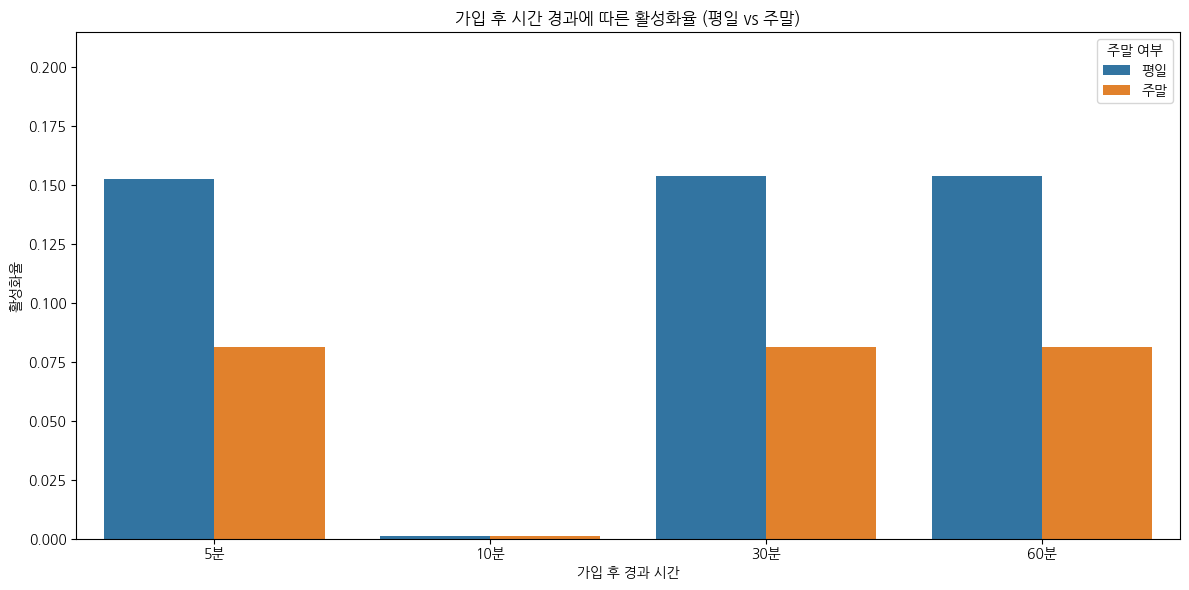

In [88]:
# Í∞ÄÏûÖ ÌõÑ 5, 10, 30, 60Î∂Ñ ÎÇ¥ ÌôúÏÑ±ÌôîÏú® summary Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÌïòÎÇòÎ°ú Ìï©Ï≥êÏÑú ÏãúÍ∞ÅÌôî

# Í∞Å summary Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÏãúÍ∞Ñ Íµ¨Î∂Ñ Ïª¨Îüº Ï∂îÍ∞Ä
summary_5min['time'] = '5Î∂Ñ'
summary_10min['time'] = '10Î∂Ñ'
summary_30min['time'] = '30Î∂Ñ'
summary_1hour['time'] = '60Î∂Ñ'

# ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ìï©ÏπòÍ∏∞
activation_summary_all = pd.concat([
    summary_5min,
    summary_10min,
    summary_30min,
    summary_1hour
], ignore_index=True)

# ÏãúÍ∞ÅÌôî: ÏãúÍ∞ÑÎ≥Ñ, ÌèâÏùº/Ï£ºÎßêÎ≥Ñ, ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌôúÏÑ±ÌôîÏú® Î≥ÄÌôî
plt.figure(figsize=(12, 6))
sns.barplot(
    data=activation_summary_all,
    x='time',
    y='activation_rate',
    hue='is_weekend',
    ci=None
)
plt.title('Í∞ÄÏûÖ ÌõÑ ÏãúÍ∞Ñ Í≤ΩÍ≥ºÏóê Îî∞Î•∏ ÌôúÏÑ±ÌôîÏú® (ÌèâÏùº vs Ï£ºÎßê)')
plt.ylabel('ÌôúÏÑ±ÌôîÏú®')
plt.xlabel('Í∞ÄÏûÖ ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ')
plt.ylim(0, activation_summary_all['activation_rate'].max() * 1.1)
plt.legend(title='Ï£ºÎßê Ïó¨Î∂Ä', labels=['ÌèâÏùº', 'Ï£ºÎßê'])
plt.tight_layout()
plt.show()

/tmp/ipykernel_203008/4221451942.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


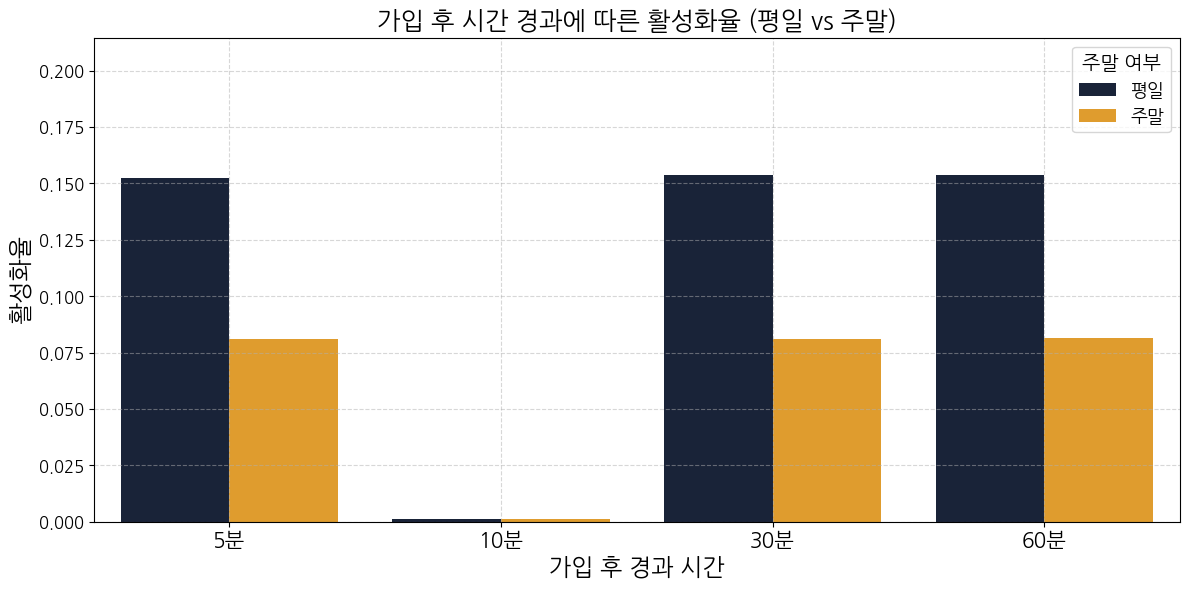

In [89]:
# Í∞ÄÏûÖ ÌõÑ 5, 10, 30, 60Î∂Ñ ÎÇ¥ ÌôúÏÑ±ÌôîÏú® summary Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÌïòÎÇòÎ°ú Ìï©Ï≥êÏÑú ÏãúÍ∞ÅÌôî (ÎîîÏûêÏù∏/Ìè∞Ìä∏/Ïª¨Îü¨ Í∑úÍ≤© Ï†ÅÏö©)

# Í∞Å summary Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÏãúÍ∞Ñ Íµ¨Î∂Ñ Ïª¨Îüº Ï∂îÍ∞Ä
summary_5min['time'] = '5Î∂Ñ'
summary_10min['time'] = '10Î∂Ñ'
summary_30min['time'] = '30Î∂Ñ'
summary_1hour['time'] = '60Î∂Ñ'

# ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ìï©ÏπòÍ∏∞
activation_summary_all = pd.concat([
    summary_5min,
    summary_10min,
    summary_30min,
    summary_1hour
], ignore_index=True)

# ÏãúÍ∞ÅÌôî: ÏãúÍ∞ÑÎ≥Ñ, ÌèâÏùº/Ï£ºÎßêÎ≥Ñ, ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌôúÏÑ±ÌôîÏú® Î≥ÄÌôî (ÎîîÏûêÏù∏ Ï†ÅÏö©)
plt.figure(figsize=(12, 6))
bar_colors = ['#14213d', '#fca311']  # ÌèâÏùº/Ï£ºÎßê Ïª¨Îü¨
sns.barplot(
    data=activation_summary_all,
    x='time',
    y='activation_rate',
    hue='is_weekend',
    palette=bar_colors,
    ci=None
)
plt.title('Í∞ÄÏûÖ ÌõÑ ÏãúÍ∞Ñ Í≤ΩÍ≥ºÏóê Îî∞Î•∏ ÌôúÏÑ±ÌôîÏú® (ÌèâÏùº vs Ï£ºÎßê)', fontsize=18)
plt.ylabel('ÌôúÏÑ±ÌôîÏú®', fontsize=17)
plt.xlabel('Í∞ÄÏûÖ ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ', fontsize=17)
plt.ylim(0, activation_summary_all['activation_rate'].max() * 1.1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.legend(title='Ï£ºÎßê Ïó¨Î∂Ä', labels=['ÌèâÏùº', 'Ï£ºÎßê'], fontsize=13, title_fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Í∞ÄÏûÖ ÌõÑ 5~60Î∂ÑÍπåÏßÄÏùò Î∞òÏùëÏùÑ Î∂ÑÏÑùÌïú Í≤∞Í≥º, ÎåÄÎ∂ÄÎ∂ÑÏùò Ïú†Ï†ÄÎäî Í∞ÄÏûÖ Ïù¥ÌõÑ ÏïÑÎ¨¥ Ïù¥Î≤§Ìä∏ÎèÑ Î∞úÏÉùÏãúÌÇ§ÏßÄ ÏïäÎäî Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.       
ÏãúÍ∞Ñ Í∏∞Ï§ÄÏùÑ 5Î∂Ñ ‚Üí 1ÏãúÍ∞ÑÏúºÎ°ú ÎÑìÌòÄÎèÑ ÌôúÏÑ±ÌôîÏú® Ï¶ùÍ∞ÄÎäî 0.001%p ÏàòÏ§ÄÏóê Î∂àÍ≥ºÌñàÏäµÎãàÎã§.

ÌäπÌûà, ÌèâÏùºÏóê ÎπÑÌï¥ Ï£ºÎßê Ïú†Ï†ÄÏùò ÌôúÏÑ±ÌôîÏú®Ïù¥ Îçî ÎÇÆÏïÑ, Ïú†ÏûÖ ÌíàÏßà ÎòêÎäî Ï¥àÍ∏∞ Ïò®Î≥¥Îî© Íµ¨Ï°∞ Í∞úÏÑ†Ïù¥ ÌïÑÏöîÌï¥ Î≥¥ÏûÖÎãàÎã§.       
Ïù¥Îäî Îã®ÏàúÌïú ÎåÄÍ∏∞ ÏãúÍ∞ÑÏùò Î¨∏Ï†úÎùºÍ∏∞Î≥¥Îã§Îäî, Í∑ºÎ≥∏Ï†ÅÏúºÎ°ú 'Í∞ÄÏûÖÎßå ÌïòÍ≥† Ïù¥ÌÉàÌïòÎäî Ïú†Ï†Ä' ÎπÑÏ§ëÏù¥ ÎÜíÏùÄ Í≤ÉÏúºÎ°ú Ìï¥ÏÑùÎê©ÎãàÎã§.

In [90]:
# 1. Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïù¥Î≤§Ìä∏Î•º Ï†ïÏùò (Ïòà: 'view_lab_tap' ÎòêÎäî 'click_bottom_navigation_lab' Îì±)
lab_tab_events = ['view_lab_tap', 'click_bottom_navigation_lab']

# 2. ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£åÌïú Ïú†Ï†Ä(user_id) Ï§ë Ïã§ÌóòÏã§ ÌÉ≠Ïóê ÌïúÎ≤àÏù¥ÎùºÎèÑ Îì§Ïñ¥Í∞Ñ Ïú†Ï†Ä Ï∂îÏ∂ú
lab_users = signup_users_all_events[signup_users_all_events['event_key'].isin(lab_tab_events)]['user_id'].unique()

# 3. Ï†ÑÏ≤¥ ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å Ïú†Ï†Ä Ïàò
total_signup_users = accounts_user['id'].astype(str).nunique()

# 4. Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†Ä Ïàò
lab_users_count = len(lab_users)

# 5. ÎπÑÏú® Í≥ÑÏÇ∞
lab_user_ratio = lab_users_count / total_signup_users * 100
print(f"ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å Ïú†Ï†Ä Ï§ë Ïã§ÌóòÏã§ ÌÉ≠Ïóê ÌïúÎ≤àÏù¥ÎùºÎèÑ Îì§Ïñ¥Í∞Ñ Ïú†Ï†Ä ÎπÑÏú®: {lab_user_ratio:.2f}% ({lab_users_count}/{total_signup_users})")

# 6. Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÏùºÏûê Ï∂îÏ∂ú
lab_users_signup_dates = accounts_user[accounts_user['id'].astype(str).isin(lab_users)][['id', 'created_at_plus_9']]
print("Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÏùºÏûê(ÏÉÅÏúÑ 10Í∞ú):")
print(lab_users_signup_dates.head(10))

ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å Ïú†Ï†Ä Ï§ë Ïã§ÌóòÏã§ ÌÉ≠Ïóê ÌïúÎ≤àÏù¥ÎùºÎèÑ Îì§Ïñ¥Í∞Ñ Ïú†Ï†Ä ÎπÑÏú®: 0.13% (903/677085)
Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÏùºÏûê(ÏÉÅÏúÑ 10Í∞ú):
             id          created_at_plus_9
72498    923658 2023-05-06 23:58:56.451591
113297   967617 2023-05-07 21:59:18.841842
149013  1006061 2023-05-08 20:39:06.627464
326836  1199005 2023-05-13 14:34:29.760474
342954  1216565 2023-05-13 21:00:16.936982
387777  1265729 2023-05-14 22:43:19.358770
400739  1279934 2023-05-15 15:16:11.978139
441807  1324867 2023-05-16 21:27:32.600137
502317  1391728 2023-05-20 00:51:35.212829
631289  1534869 2023-05-28 16:56:12.336732


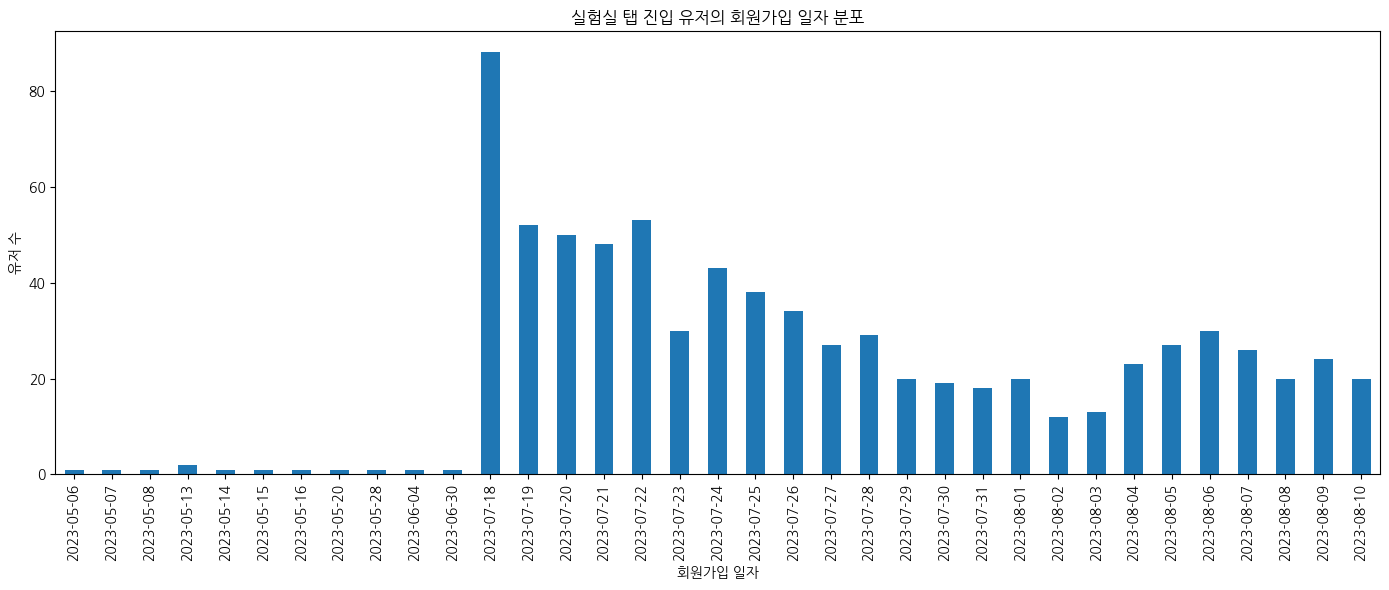

Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöî ÏãúÍ∞Ñ: 1528.93Î∂Ñ
Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖÍπåÏßÄ Ï§ëÏïôÍ∞í ÏÜåÏöî ÏãúÍ∞Ñ: 1.34Î∂Ñ


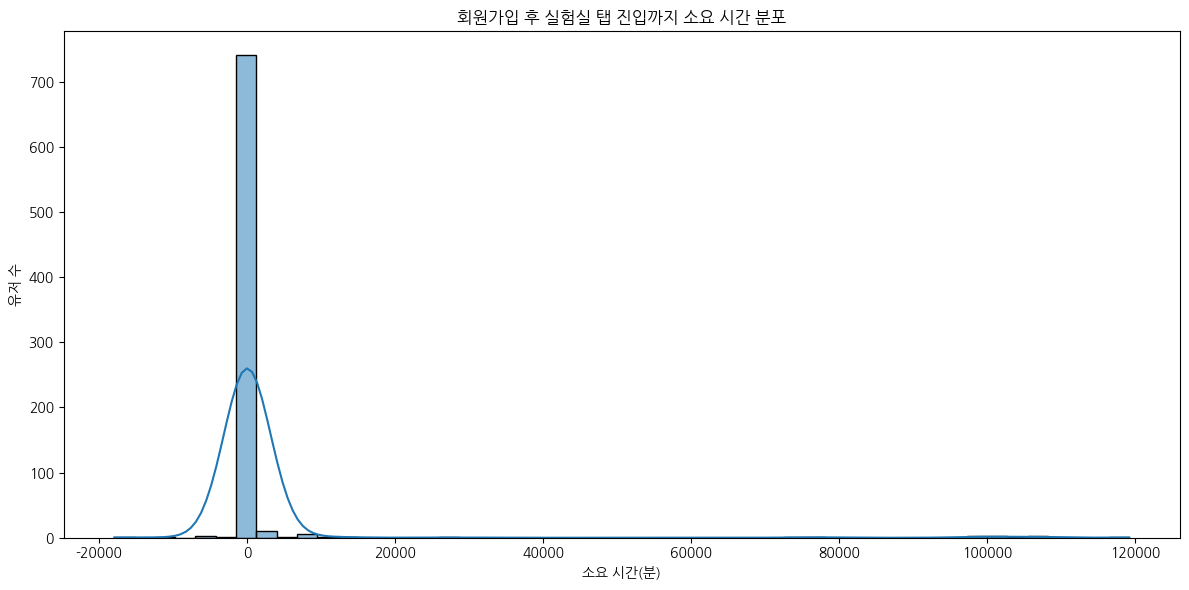

In [91]:
# Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÏùºÏûê ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
lab_users_signup_dates['created_at_plus_9'].dt.date.value_counts().sort_index().plot(kind='bar')
plt.title('Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÏùºÏûê Î∂ÑÌè¨')
plt.xlabel('ÌöåÏõêÍ∞ÄÏûÖ ÏùºÏûê')
plt.ylabel('Ïú†Ï†Ä Ïàò')
plt.tight_layout()
plt.show()

# Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖÍπåÏßÄ Í±∏Î¶∞ ÏãúÍ∞Ñ(Î∂Ñ) Í≥ÑÏÇ∞
# 1. Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú
lab_events = signup_users_all_events[signup_users_all_events['user_id'].isin(lab_users) &
                                    signup_users_all_events['event_key'].isin(lab_tab_events)].copy()

# 2. ÌöåÏõêÍ∞ÄÏûÖ ÏùºÏûê Ï†ïÎ≥¥ merge
lab_events = lab_events.merge(
    lab_users_signup_dates.rename(columns={'id': 'user_id'}),
    on='user_id',
    how='left'
)

# 3. ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖÍπåÏßÄ Í±∏Î¶∞ ÏãúÍ∞Ñ(Î∂Ñ) Í≥ÑÏÇ∞ (ÏµúÏ¥à ÏßÑÏûÖÎßå)
lab_events['signup_to_lab_min'] = (lab_events['event_datetime'] - lab_events['created_at_plus_9']).dt.total_seconds() / 60
first_lab_events = lab_events.sort_values(['user_id', 'event_datetime']).groupby('user_id').first()

# 4. ÌèâÍ∑†, Ï§ëÏïôÍ∞í Ï∂úÎ†•
mean_time = first_lab_events['signup_to_lab_min'].mean()
median_time = first_lab_events['signup_to_lab_min'].median()
print(f"Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖÍπåÏßÄ ÌèâÍ∑† ÏÜåÏöî ÏãúÍ∞Ñ: {mean_time:.2f}Î∂Ñ")
print(f"Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖ Ïú†Ï†ÄÏùò ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖÍπåÏßÄ Ï§ëÏïôÍ∞í ÏÜåÏöî ÏãúÍ∞Ñ: {median_time:.2f}Î∂Ñ")

# 5. Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.histplot(first_lab_events['signup_to_lab_min'], bins=50, kde=True)
plt.title('ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ Ïã§ÌóòÏã§ ÌÉ≠ ÏßÑÏûÖÍπåÏßÄ ÏÜåÏöî ÏãúÍ∞Ñ Î∂ÑÌè¨')
plt.xlabel('ÏÜåÏöî ÏãúÍ∞Ñ(Î∂Ñ)')
plt.ylabel('Ïú†Ï†Ä Ïàò')
plt.tight_layout()
plt.show()

In [92]:
# 1. Ïã§ÌóòÏã§ Í¥ÄÎ†® Ïù¥Î≤§Ìä∏Í∞Ä 7Ïõî 18Ïùº Ïù¥Ï†ÑÏóê ÏûàÏóàÎäîÏßÄ ÌôïÏù∏
lab_tab_events = ['view_lab_tap', 'click_bottom_navigation_lab']
lab_events_before_july18 = signup_users_events[ 
    (signup_users_events['event_key'].isin(lab_tab_events)) &
    (signup_users_events['event_datetime'] < pd.Timestamp('2023-07-18'))
]
print(f"7Ïõî 18Ïùº Ïù¥Ï†Ñ Ïã§ÌóòÏã§ Í¥ÄÎ†® Ïù¥Î≤§Ìä∏ Ïàò: {len(lab_events_before_july18)}")
if not lab_events_before_july18.empty:
    display(lab_events_before_july18[['event_datetime', 'event_key', 'user_id']].head())

7Ïõî 18Ïùº Ïù¥Ï†Ñ Ïã§ÌóòÏã§ Í¥ÄÎ†® Ïù¥Î≤§Ìä∏ Ïàò: 0


In [93]:
# signup_users_events Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ Î∞úÏÉùÌïú Ïù¥Î≤§Ìä∏ ÌôïÏù∏
event_counts = signup_users_events['event_key'].value_counts()
print("Í∞ÄÏû• ÎßéÏù¥ Î∞úÏÉùÌïú Ïù¥Î≤§Ìä∏ Top 10:")
print(event_counts.head(10))

Í∞ÄÏû• ÎßéÏù¥ Î∞úÏÉùÌïú Ïù¥Î≤§Ìä∏ Top 10:
event_key
view_lab_tap                         21946
view_timeline_tap                    21016
click_question_open                  19641
launch_app                           14839
$session_start                       13603
click_bottom_navigation_questions    13243
skip_question                        13161
$session_end                         12075
click_bottom_navigation_profile      11866
click_bottom_navigation_timeline      8273
Name: count, dtype: int64


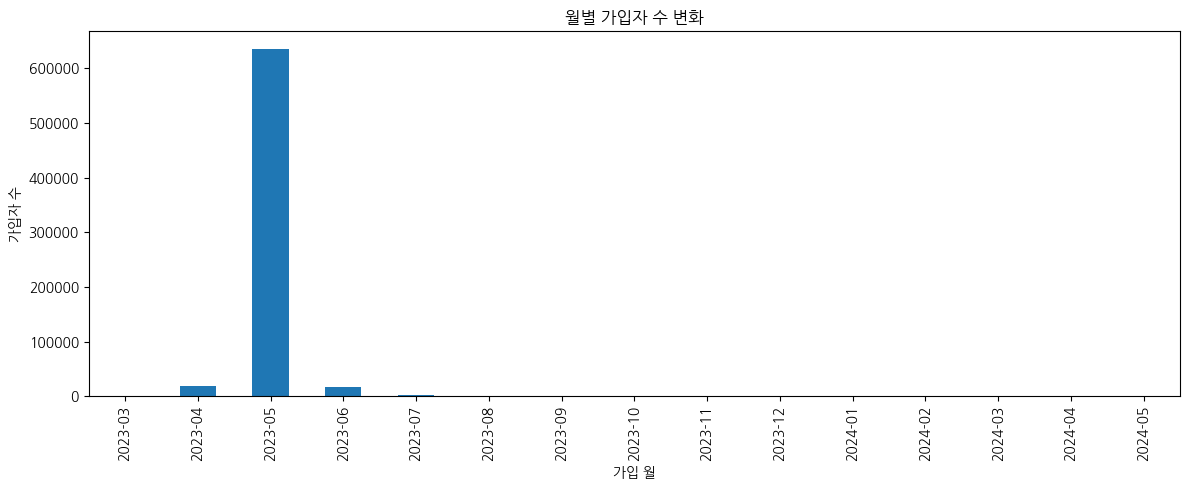

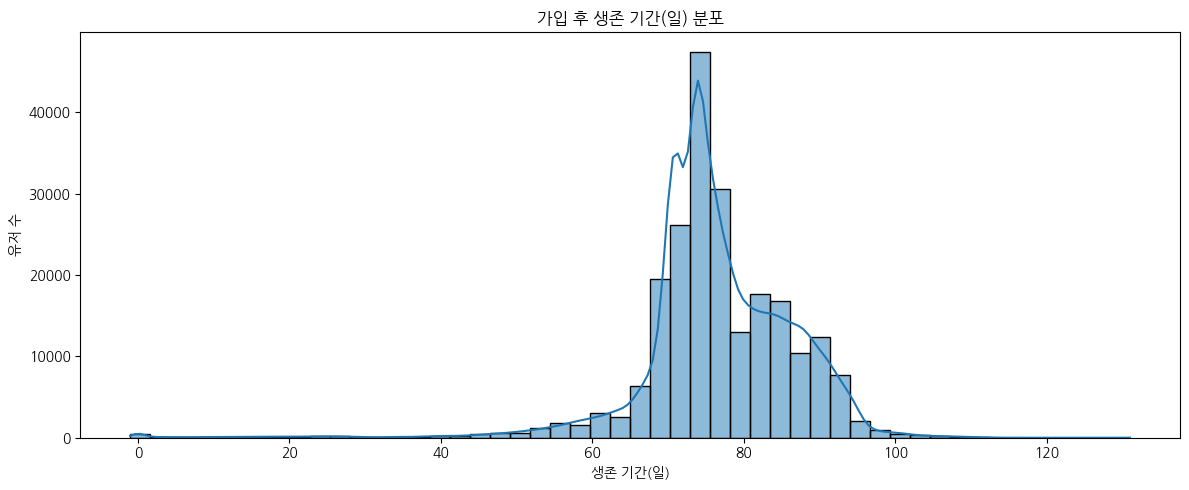

ÏÉùÏ°¥ Í∏∞Í∞Ñ ÌèâÍ∑†: 76.40Ïùº
ÏÉùÏ°¥ Í∏∞Í∞Ñ Ï§ëÍ∞ÑÍ∞í: 75.00Ïùº
30Ïùº Ïù¥ÏÉÅ ÏûîÏ°¥ Ïú†Ï†Ä Ïàò: 125175


In [94]:
# Í∞ÄÏûÖÏûê Ïàò Î≥ÄÌôî(5~6Ïõî Í∏âÏ¶ù) Î∞è Í∞ÄÏûÖ ÌõÑ ÏÉùÏ°¥ Í∏∞Í∞Ñ, Ïû•Í∏∞ ÏûîÏ°¥ Ïú†Ï†Ä ÏΩîÌò∏Ìä∏ Ï†ïÏùò

# accounts_user: vote Îç∞Ïù¥ÌÑ∞(Í∞ÄÏûÖÏûê Ï†ïÎ≥¥)
# final_hackle_df: ÌñâÎèô Î°úÍ∑∏ Îç∞Ïù¥ÌÑ∞

# 1. Í∞ÄÏûÖÏûê Ïàò Î≥ÄÌôî (ÏõîÎ≥Ñ)
accounts_user['signup_month'] = accounts_user['created_at_plus_9'].dt.to_period('M')
monthly_signup_counts = accounts_user.groupby('signup_month').size()
plt.figure(figsize=(12, 5))
monthly_signup_counts.plot(kind='bar')
plt.title('ÏõîÎ≥Ñ Í∞ÄÏûÖÏûê Ïàò Î≥ÄÌôî')
plt.xlabel('Í∞ÄÏûÖ Ïõî')
plt.ylabel('Í∞ÄÏûÖÏûê Ïàò')
plt.tight_layout()
plt.show()

# 2. Í∞ÄÏûÖ ÌõÑ ÏÉùÏ°¥ Í∏∞Í∞Ñ Í≥ÑÏÇ∞ (ÏµúÏ¢Ö Ïù¥Î≤§Ìä∏ ÏãúÍ∞Å - Í∞ÄÏûÖ ÏãúÍ∞Å)
user_last_event = final_hackle_df.groupby('user_id')['event_datetime'].max()
accounts_user['user_id'] = accounts_user['id'].astype(str)
accounts_user['last_event_time'] = accounts_user['user_id'].map(user_last_event)
accounts_user['survival_days'] = (accounts_user['last_event_time'] - accounts_user['created_at_plus_9']).dt.days

# 3. ÏÉùÏ°¥ Í∏∞Í∞ÑÎ≥Ñ Ïú†Ï†ÄÏùò Ïàò ÏãúÍ∞ÅÌôî Î∞è ÌÜµÍ≥ÑÏπò Ï∂úÎ†•
plt.figure(figsize=(12, 5))
sns.histplot(accounts_user['survival_days'].dropna(), bins=50, kde=True)
plt.title('Í∞ÄÏûÖ ÌõÑ ÏÉùÏ°¥ Í∏∞Í∞Ñ(Ïùº) Î∂ÑÌè¨')
plt.xlabel('ÏÉùÏ°¥ Í∏∞Í∞Ñ(Ïùº)')
plt.ylabel('Ïú†Ï†Ä Ïàò')
plt.tight_layout()
plt.show()

# ÏÉùÏ°¥ Í∏∞Í∞ÑÏùò ÌèâÍ∑†, Ï§ëÍ∞ÑÍ∞í Í≥ÑÏÇ∞
mean_survival = accounts_user['survival_days'].mean()
median_survival = accounts_user['survival_days'].median()
print(f"ÏÉùÏ°¥ Í∏∞Í∞Ñ ÌèâÍ∑†: {mean_survival:.2f}Ïùº")
print(f"ÏÉùÏ°¥ Í∏∞Í∞Ñ Ï§ëÍ∞ÑÍ∞í: {median_survival:.2f}Ïùº")

# 4. Ïû•Í∏∞ ÏûîÏ°¥ Ïú†Ï†Ä(Ïòà: Í∞ÄÏûÖ ÌõÑ 30Ïùº Ïù¥ÏÉÅ ÌôúÎèô) Ï†ïÏùò
accounts_user['is_retained_median_day'] = accounts_user['survival_days'] >= median_survival
retained_users = accounts_user.loc[accounts_user['is_retained_median_day'], 'user_id'].tolist()
print(f"30Ïùº Ïù¥ÏÉÅ ÏûîÏ°¥ Ïú†Ï†Ä Ïàò: {len(retained_users)}")

In [95]:
# ÏûîÏ°¥ Ïú†Ï†ÄÏùò ÌñâÎèô Ìå®ÌÑ¥ Î∂ÑÏÑù (final_hackle Îç∞Ïù¥ÌÑ∞)
retained_events = final_hackle_df[final_hackle_df['user_id'].isin(retained_users)].copy()

# ÏûîÏ°¥ Ïú†Ï†ÄÏùò Ï£ºÏöî Ïù¥Î≤§Ìä∏ ÎπàÎèÑ
top_events = retained_events['event_key'].value_counts().head(10)
print("ÏûîÏ°¥ Ïú†Ï†Ä Ï£ºÏöî Ïù¥Î≤§Ìä∏ Top 10:")
print(top_events)

# # ÏûîÏ°¥ Ïú†Ï†ÄÎ≥Ñ Ï≤´ 10Í∞ú Ïù¥Î≤§Ìä∏ ÏãúÌÄÄÏä§
# retained_event_sequences = (
#     retained_events.sort_values(['user_id', 'event_datetime'])
#     .groupby('user_id')['event_key']
#     .apply(lambda x: list(x.head(10)))
# )
# print("ÏûîÏ°¥ Ïú†Ï†Ä Ï≤´ 10Í∞ú Ïù¥Î≤§Ìä∏ ÏãúÌÄÄÏä§ ÏòàÏãú:")
# print(retained_event_sequences.head())

ÏûîÏ°¥ Ïú†Ï†Ä Ï£ºÏöî Ïù¥Î≤§Ìä∏ Top 10:
event_key
view_lab_tap                         847889
view_timeline_tap                    829738
$session_start                       658433
launch_app                           650380
click_question_open                  527482
click_bottom_navigation_questions    487966
click_bottom_navigation_profile      431673
$session_end                         425621
click_bottom_navigation_timeline     357669
skip_question                        316179
Name: count, dtype: int64
